## Arima/Sarima : Le processus stationnaire

1) Rappel modele de decomposition d'une Time series stationnaire

exemple : Modele prophet

    Un modèle de décomposition consiste à appliquer des transformations pour simplifier sa série temporelle. C’est une méthode très efficace et très générale, son application est omniprésente en analyse des séries temporelles, avec différentes variations.

    ==> Composantes tendancielles et périodiques




2) Indicateur pour 

    -qualifier la times series : Instationnaire / stationnaire

    La stationnarité veut dire que les statistiques de la série temporelle n’évoluent pas sur une periode
    
    -identifier la predictabilité de la series 
    
    Indicateur: variance, covariance, Autocorelation

    La corrélation statistique résume la force de la relation entre deux variables.

        Le coefficient de corrélation de Pearson est un nombre compris entre -1 et 1 qui décrit respectivement une corrélation négative ou positive. Une valeur de zéro indique qu'il n'y a pas de corrélation.

        Les diagrammes d'autocorrélation et d'autocorrélation partielle sont largement utilisés dans l'analyse et la prévision de séries chronologiques.

nb: Ce sont des tracés qui résument graphiquement la force d'une relation avec une observation dans une série chronologique avec des observations à des pas de temps antérieurs. La différence entre l'autocorrélation et l'autocorrélation partielle peut être difficile et déroutante en prévision de séries chronologiques.

        Les tracés de la fonction d'autocorrélation et de la fonction d'autocorrélation partielle pour une série chronologique racontent une histoire très différente.


3) Procedures TIME SERIES :




Veille
--------------------------------------------------------------------------------------------

PROCEDURE TIME SERIES :


La démarche adoptée est la suivante :
    
   1) stationnarisation (éventuellement) ; Décomposition saisonnière,Différenciation,Méthode empirique,

    Notons que :
    Quelle(s) que soi(en)t la(les) méthode(s) retenue(s), on procède de manière itérative : on effectue une première différenciation, si celle-ci d'avère insuffisante, on en effectue une seconde, etc.
    En pratique on considère rarement d>2  et D>2

   2) identification a priori de modèles potentiels,

    Une fois la stationnarisation effectuée, on peut se consacrer aux choix potentiels des polynômes AR et MA
    En pratique (surtout pour les modèles SARIMA), on essaye d'identifier les autocorrélations simples et partielles "significatives" pour caler ensuite des polynômes AR et MA qui reflètent ces liens temporels.

    Afin d'obtenir des modèles potentiels, l'idéal est de regarder l'autocorrélogramme partiel afin d'émettre une hypothèse sur la partie autorégressive (simple et saisonnière), la tester puis regarder l'autocorrélogramme simple (et partiel) du résidu afin d'identifier complètement un modèle. Cette démarche itérative permet en général d'obtenir plusieurs modèles potentiels.

   3) estimation des modèles potentiels,

    On estime les modèles potentiels à l'aide des méthodes classiques : maximum de vraisemblance (basée sur l'hypothèse gaussienne du résidu) ou moindres carrés.
    
   4) vérification des modèles potentiels,

    Afin de vérifier la validité des modèles estimés, on peut verifier la significativité des paramètres et la blancheur du résidu.
    
   5) choix définitif d'un modèle,

Ce choix s'opère entre les modèles potentiels retenus via :

    Des critères d'information basés sur l'information de Kullback, par exemple, les critères d'Akaike (AIC) et de Schwartz (BIC) 
    Des critères basés sur le pouvoir prédictif.
    Une fois ce choix effectué, le modèle retenu est utilisé à des fins de prévision.
    
   6) prévision à l'aide du modèle choisi,

    La fonction de prévision s'obtient assez facilement à partir des écritures dites autorégressive ou moyenne mobile.

   7) analyse a posteriori de la prévision.

    L'analyse a posteriori permet de quantifier les écarts entre les prévisions et les réalisations, en tronquant la série d'un certain nombre de points (notons que le modèle doit être correctement estimé sur la série tronquée.

    On utilise des critères d'erreur comme l'erreur quadratique moyenne (Root Mean Square Error : RMSE ou l'erreur relative absolue moyenne (Mean Average Percentage Error : MAPE)


Notons que :
Les modèles SARIMA permettent de modéliser des séries qui présentent une saisonnalité.
Estimer un modèle SARIMA se ramène en pratique à l'estimation d'un modèle ARMA sur la série différenciée.


In [ ]:
import math                         
import numpy as np                  
import time
import pandas as pd
import matplotlib.pyplot as plt     
import seaborn as sns             
plt.rcParams["figure.figsize"]=(6, 6)

On considère le jeu de données air pekin, concernant la qualité de l'air

"pollution.csv"

#### Charger le fichier avec Time index

In [15]:
polution_ts = pd.read_csv("pollution.csv")

In [16]:
# TBD

polution_ts.head()

,year_month_day_hour,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


Proposer une visualisation de la pollution sur la période d'étude.

<AxesSubplot:xlabel='year_month_day_hour'>

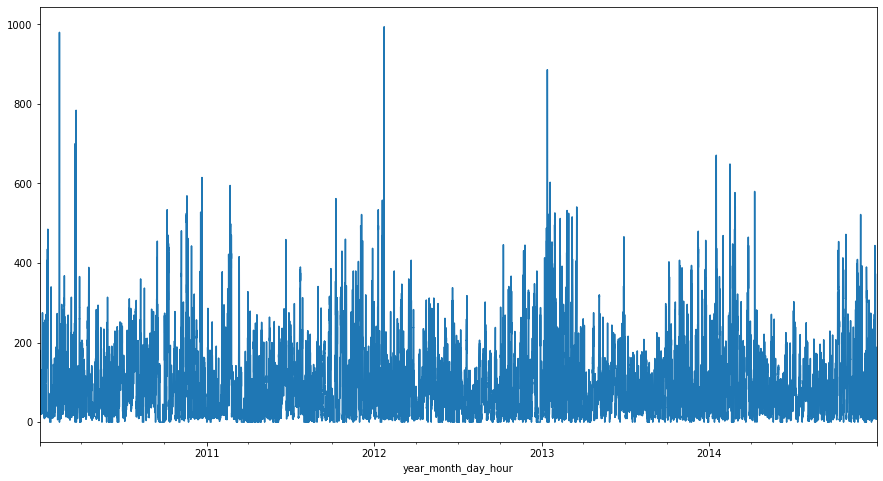

In [ ]:
#TBD

Donner une représentation par mois de la pollution. Quel est le mois le plus pollué ?

<AxesSubplot:xlabel='year_month_day_hour'>

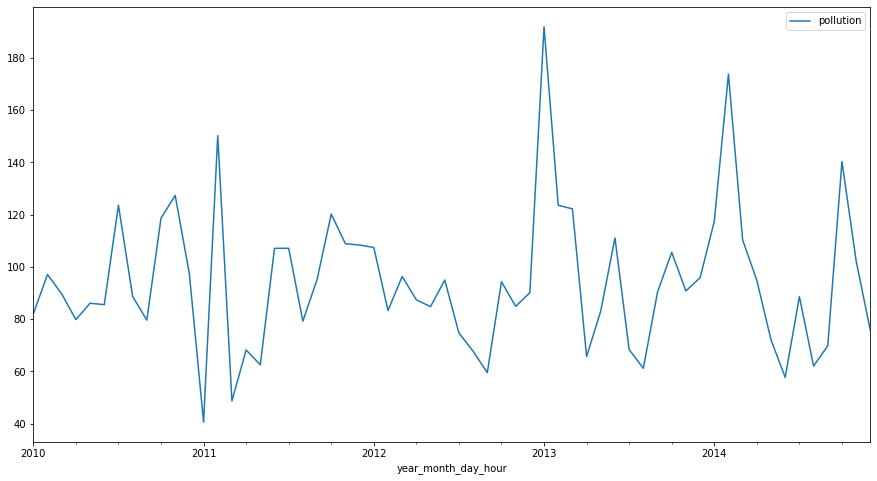

In [ ]:
#TBD

### Etude de stationnarité

#### Decomposition de la serie

En utilisant seasonal_decompose, decomposer votre serie temporelle sous plusieurs échantillonage:

- Par mois
- Par semaines


Un modèle de décomposition consiste à appliquer des transformations pour simplifier sa série temporelle. C’est une méthode très efficace et très générale, son application est omniprésente en analyse des séries temporelles, avec différentes variations.

[Rappel decompostion serie temporelle](https://slideplayer.fr/slide/5546777/17/images/4/MODELES+DE+DECOMPOSITION.jpg
)


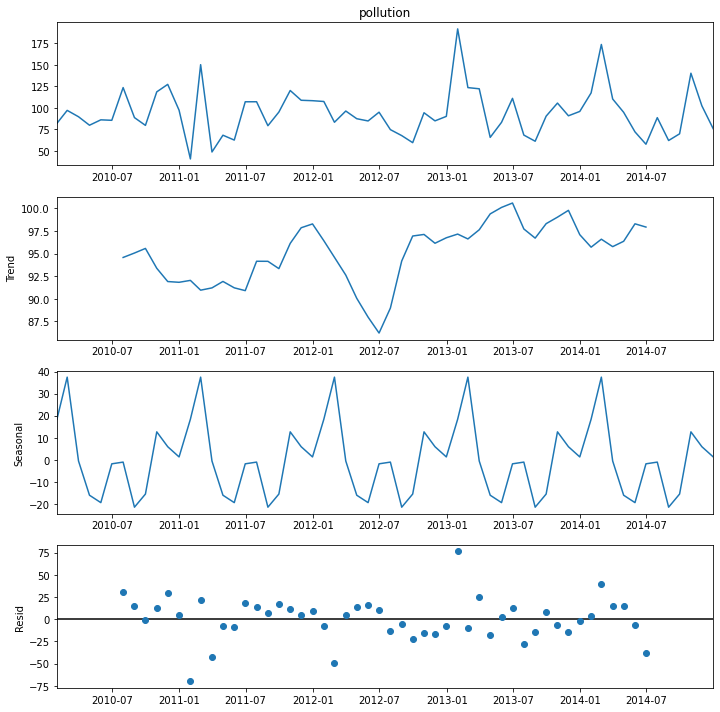

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(10, 10)

x=polution_ts["pollution"].resample('M').mean()

decomp_x = seasonal_decompose(x.fillna(method='ffill'),  model='additive')
decomp_x.plot()

plt.show()

Réaliser cette decompostion en changeant de frequence d'echantillonage (la semaine par exemple)


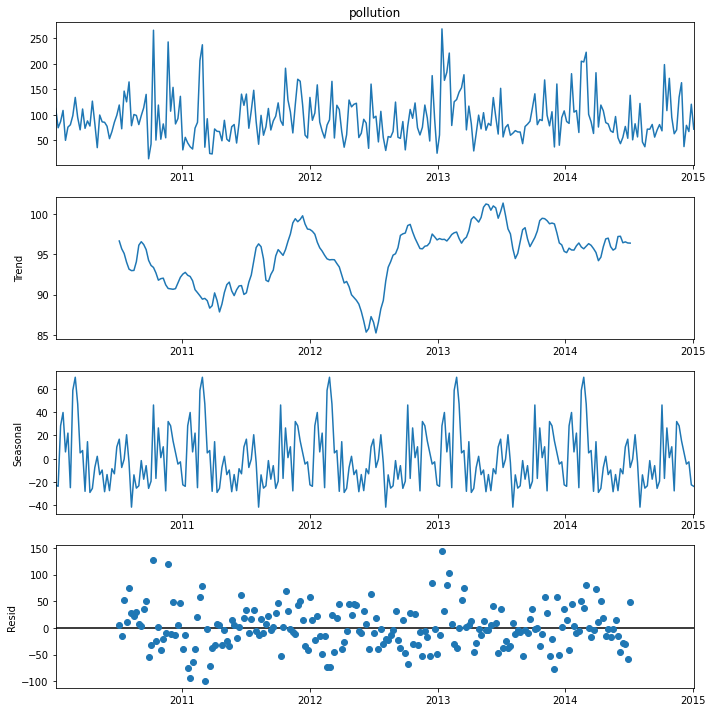

In [ ]:
# TBD

#### Utiliser le score de Dickey-Fuller 

==> extraire une avec p_value = sm.tsa.stattools.adfuller(y)[1] inferieure à 0.05 pour verifier la stationnarité de votre serie 

Rappel p value

https://pro.arcgis.com/fr/pro-app/latest/tool-reference/spatial-statistics/what-is-a-z-score-what-is-a-p-value.htm#:~:text=Si%20votre%20score%20z%20est,r%C3%A9sultat%20de%20processus%20spatiaux%20al%C3%A9atoires.

Table de Dickey-Fuller

https://www.real-statistics.com/statistics-tables/augmented-dickey-fuller-table/

In [ ]:

p_value

9.985107390865025e-26

In [ ]:
#TBD 

p_value

/home/david/anaconda3/envs/dev/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/david/anaconda3/envs/dev/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


0.00021864176653199787

Si la valeur p du test de Dickey-Fuller n'est pas suffisamment significative (< 5 %), le risque de rejeter l'hypothese nulle H0 alors qu'elle est vraie augmente. 

#### Pause sur la différenciation :

- Differenciation
- Ecriture via operateur de retard L


Il est donc possible de rendre stationnaire une série non-stationnaire en la différenciant d fois, c’est à dire de considérer la série {st−st−d}. On parle d’opérateur retard, noté L, appliqué d fois.


Si c'est le cas utiliser x.diff(1) pour differencier votre serie d'un ordre

In [ ]:
adfuller(x.diff(1).dropna())[1]

1.2604401991885896e-06

In [ ]:
x.diff(1)

year_month_day_hour
2010-01-03           NaN
2010-01-10    -37.943452
2010-01-17     12.255952
2010-01-24     21.744048
2010-01-31    -58.636905
                 ...    
2014-12-07   -125.351190
2014-12-14     41.678571
2014-12-21    -12.154762
2014-12-28     53.589286
2015-01-04    -48.940476
Freq: W-SUN, Name: pollution, Length: 262, dtype: float64

#### Rappel 

L’un des concepts essentiels dans l’étude des séries temporelles est la “stationnarité”. Il s’agit de savoir si les observations d’une série temporelle sont générées par une structure* qui change, ou non, avec le temps.

Une autre façon pratique de vérifier si une série temporelle est stationnaire ou pas est d’étudier l’évolution dans le temps de la structure de sa moyenne, de sa variance et de ses corrélations croisées avec elle-même.

En effet, dans ce cas, la moyenne, la variance et la dépendance entre les valeurs de la série ont une structure finie et indépendante du temps

In [ ]:
from statsmodels.tsa.stattools import acf
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

#### Coder une fonction d'autocorellation

- #### Commencer par creer une fonction d' auto-covariance empirique

- #### Généraliser en creant une fonction d' auto-correlation empiriques.


formules p14 http://math.univ-lille1.fr/~viano/economcours.pdf


- #### Calculer l'autocorelation sur la serie et celle avec un decalage d'un pas de temps

In [ ]:
# TBD

auto_correlation(results,0),auto_correlation(results,1),auto_correlation(results,2)

(1.0, 0.12659374127535075, -0.028086412181241457)

#### Verifier vos calculs avec la fonction acf()  importées precedemment

In [ ]:
#TBS

/home/david/anaconda3/envs/dev/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/home/david/anaconda3/envs/dev/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


(1.0, 0.12659374127535075, -0.028086412181241457)

#### Analyse des autocorrelogrammes

Nous pouvons calculer la corrélation des observations de séries chronologiques avec des observations avec des pas de temps précédents, appelés décalages. Étant donné que la corrélation des observations de la série chronologique est calculée avec les valeurs de la même série à des moments précédents, cela s'appelle une corrélation en série ou une autocorrélation.

Un tracé de l'autocorrélation d'une série chronologique par décalage est appelé la fonction de corrélation automatique , ou l'acronyme ACF . Ce graphique est parfois appelé un corrélogramme ou un graphique d'autocorrélation.

Vous pouvez egalement comparer les resultats de votre fonction avec ceux du plot_acf() ci dessous

Les intervalles de confiance sont dessinés sous forme de cône. Par défaut, il est défini sur un intervalle de confiance de 95 %, ce qui suggère que les valeurs de corrélation en dehors de ce code sont très probablement une corrélation et non un hasard statistique.


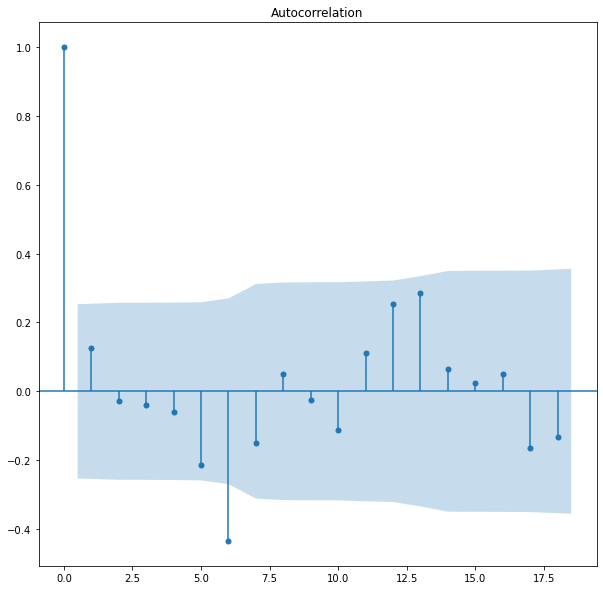

In [ ]:
a=plot_acf(x.dropna())


La sortie ACF ne présente pas de décroissance explicite vers 0, ce qui traduit un problème de non-stationnarité. On effectue donc une différenciation. Nous esperons ainsi se rapprocher d'un fonction stationnaire

Il existe de nombreux tests statistiques***  pour déterminer si une série est stationnaire ou pas. Il se peut que la moyenne, la variance et les autocorrélations de la série originale ne sont pas constantes dans le temps mais que les statistiques relatives aux changements de la série entre d périodes sont constantes. 

#### Nous differencions chaque terme avec son precedent et nous esperons obtenir une courbe d'ACF qui tend plus rapidement vers 0 

Tracer cette nouvelle representation

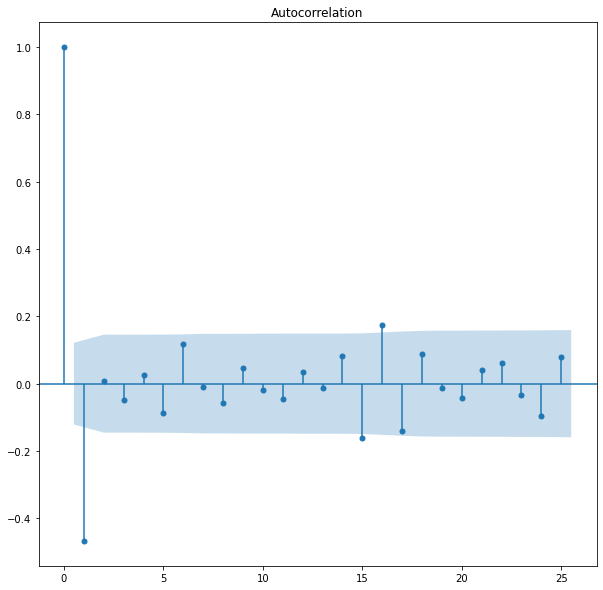

In [ ]:
#TBD

#### PACF (Auto correlation partielle)

Le PACF exprime la corrélation entre les observations faites à deux moments dans le temps tout en tenant compte de l’influence éventuelle d’autres points de données. 

Une autocorrélation partielle est un résumé de la relation entre une observation dans une série chronologique et des observations à des pas de temps antérieurs, les relations des observations intermédiaires étant supprimées.

Ce sont ces corrélations intermédiaires que la fonction d'autocorrélation partielle cherche à éliminer. Sans entrer dans les calculs, c'est l'intuition de l'autocorrélation partielle.

Nous pouvons utiliser le PACF pour déterminer le nombre optimal de termes à utiliser dans le modèle AR.

[Explication autocorrelation partielle](https://slideplayer.fr/slide/520920/2/images/26/5.+Autocorr%C3%A9lation+partielle.jpg)

[Vulgarisation autocorrelation partielle](https://slideplayer.fr/slide/1847935/7/images/3/D%C3%A9finition+intuitive+des+autocorr%C3%A9lations+partielles.jpg)


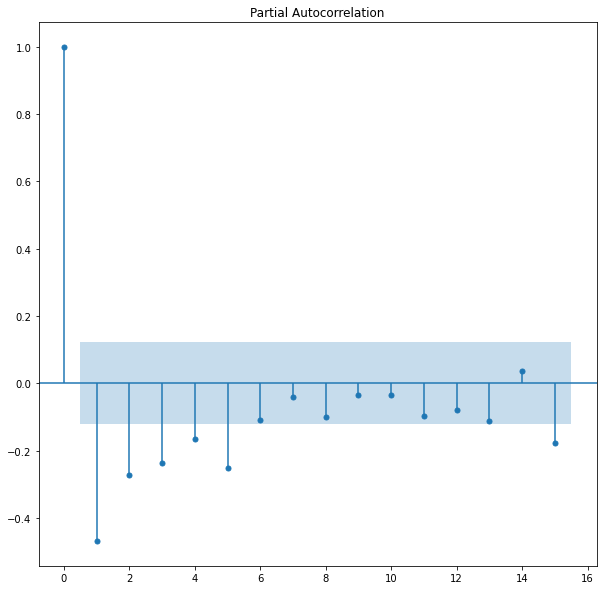

In [ ]:
_ =plot_pacf(x.diff(1).dropna(),lags=15)

#### Intuition d'autorégression

Considérons une série chronologique qui a été générée par un processus d'autorégression (AR) avec un décalage de k .

Nous savons que le PACF ne décrit que la relation directe entre une observation et son décalage. Cela suggérerait qu'il n'y aurait pas de corrélation pour les valeurs de décalage au-delà de k .

C'est exactement l'attente des tracés PACF pour un processus AR(k).

#### Intuition moyenne mobile

Considérons une série chronologique qui a été générée par un processus de moyenne mobile (MA) avec un décalage de k .

N'oubliez pas que le processus de moyenne mobile est un modèle d'autorégression de la série chronologique des erreurs résiduelles des prédictions précédentes. Une autre façon de penser au modèle de moyenne mobile est qu'il corrige les prévisions futures en fonction des erreurs commises sur les prévisions récentes.

Nous nous attendrions à ce que l'ACF pour le processus MA(k) montre une forte corrélation avec les valeurs récentes jusqu'au décalage de k, puis une forte baisse jusqu'à une corrélation faible ou nulle. Par définition, c'est ainsi que le processus a été généré.


Encore une fois, c'est exactement l'attente des tracés ACF pour un processus MA(k).



#### Modèle ARIMA

Le modèle ARIMA, appelé aussi modèle de Box-Jenkis, est la combinaison de trois termes : le terme autorégressif (AR), le terme de différenciation (I) et le terme de moyennes mobiles (MA).

 
- Le terme autorégressif suppose que la valeur à l’instant t est une combinaison linéaire des valeurs des instants précédents plus un terme d’erreur.

- La partie moyennes mobiles suppose que la série est une combinaison linéaire de bruits blancs****

- Enfin, le terme de différenciation est une application de l’opérateur retard L une ou plusieurs fois.




Trois entiers (p, d, q) sont généralement utilisés pour paramétrer les modèles ARIMA :

- p : nombre de termes autorégressifs (ordre AR)

- d : nombre de différences non saisonnières (ordre de différenciation)

- q : nombre de termes moyens mobiles (ordre MA)


#### Identification et estimation de modèles ARMA :


En pratique, lorsque l’on doit ajuster un modèle AR, MA ou ARMA à des données réelles la première question qui se pose est celle du choix des ordres p et q du modèle ARMA (on considère que les AR et MA sont un cas particulier d’ARMA avec respectivement q=0 et p=0). 
Pour choisir ces ordres, nous pouvons exploiter les résultats suivants:


![Times_series.png](attachment:Times_series.png)

Ainsi, on estime un modèle ARIMA(5,1,1) au vu des autocorrélogrammes empiriques simples et partiels et de la differenciation de rang 1 réalisée.

Le processus ARMA :
Comme vous vous en doutez, le modèle ARMA est tout simplement une combinaison d’un processus AR et d’un processus MA. Cela permet de modéliser des séries temporelles plus complexes.

Un modèle ARMA d’ordre (p,q) s’écrit donc sous la forme :


![ARMA](Data/ARIMA.png.webp)

Avec ε l’erreur, (𝛼1, …,𝛼p)   et (𝛽1, …,𝛽q) des réels.

In [ ]:
import statsmodels.api as sm
x=polution_ts["pollution"].resample('W').mean().diff(1).dropna()
x=x[:"2014"]

mod = sm.tsa.arima.ARIMA(x.dropna(),
                                order=(5, 1, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[0])
print(results.summary().tables[1])
print(results.summary().tables[2])

                               SARIMAX Results                                
Dep. Variable:              pollution   No. Observations:                  260
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -1337.135
Date:                Sat, 30 Apr 2022   AIC                           2688.270
Time:                        10:57:36   BIC                           2713.031
Sample:                    01-10-2010   HQIC                          2698.231
                         - 12-28-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7347      0.056    -13.067      0.000      -0.845      -0.624
ar.L2         -0.5587      0.062     -9.080      0.000      -0.679      -0.438
ar.L3         -0.4623      0.065     -7.074      0.0

Tableau récapitulatif : 

    Dans le tableau récapitulatif, il y a 3 sections distinctes. 
    
    La deuxième colonne de la section I contient des mesures utiles qui sont utilisées pour comparer différents modèles ARIMA. 
    
    En règle générale, le modèle avec une probabilité logarithmique plus élevée ou un IC inférieur (AIC, BIC ou HQIC) est meilleur, et vice versa. 
    
##########################################    
**Les critères de choix de modèles les plus courants sont :**

- le critère AIC (Akaïke Information Criterion), qui sera généralement préféré si l’objectif de l’étude est de faire de la prévision
 
AIC = −2 logL(θ) + 2ν, où L(.) est la vraisemblance du modèle, θ représente les paramètres du modèle et ν le nombre de ces paramètres

où, loi normale de paramètre m et sera notée : N (µ,σ2).
<img src="Data/like3.png" alt="Drawing" style="width: 400px;"/>

    
- le critère BIC (Bayesian Information Criterion) sera quant à lui généralement préféré si l’objectif de l’étude est de s’ajuster à la série observée, et est défini par :

BIC = −2 logL(θ) + nν

où n est le nombre d’observations de la série.

    Les modèles ayant la plus petite valeur du critère devront être choisis.
    Ces deux critères conduisent donc à séléctionner des modèles dont la vraisemblance est grande, en la pénalisant par la complexité du modèle.
    
        
##########################################   

    La section II du tableau récapitulatif donne des informations sur les différents coefficients des composantes AR et MA, et les constantes utilisées dans le modèle. 
    
    La colonne coef contient la valeur réelle des coefficients et la colonne P>|Z|colonne contient les niveaux de confiance. Cette colonne indique si les coefficients sont significatifs. 
    
    Si le niveau de confiance est fixé à 5 % et les coefficients significatifs ont une valeur < 0,05 dans cette colonne ==> dans ce cas, tous les coefficients sont clairement significatifs.


Si ce modèle n a que des paramètres significatifs, c'est mieux :)


D'autre part, nous pouvons qualifier notre modele en analysant son residu.

Le residu, c'est ce qu'il reste de la serie apres avoir enlever le volet tendance et saisonnier.

Si celui ci passe le test de blancheur (nous voulons un residu tel un bruit blanc), alors notre model devrait etre pas mal

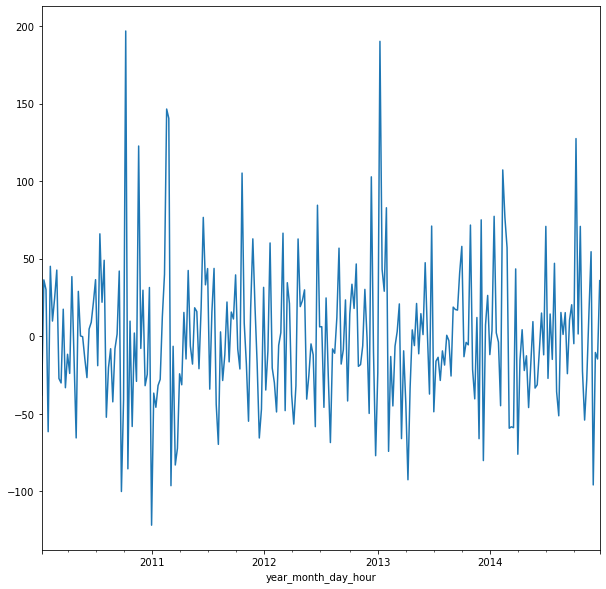

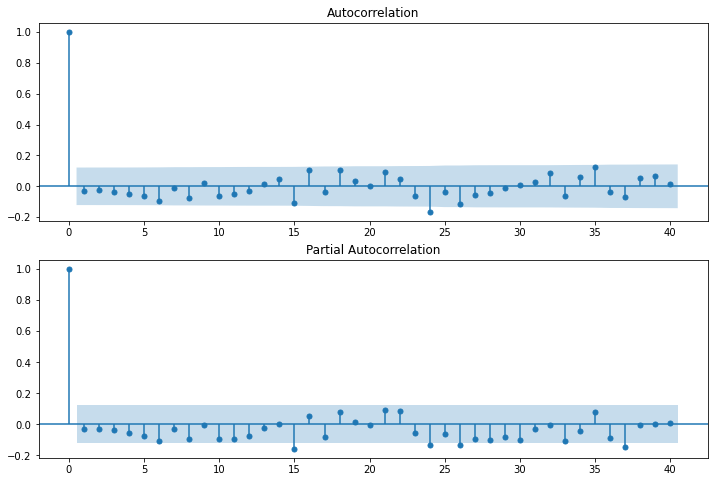

In [ ]:
results.resid.plot()

plt.show()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, lags=40, ax=ax2)
plt.show()

#### Résidus : 

Si un modèle fonctionne bien, les résidus ou les erreurs commises par le modèle ne doivent pas contenir de modèle sous-jacent. 

Si tel est le cas, le modèle ne parvient pas à capturer toutes les informations contenues dans les données.

Ainsi, un modèle réussi devrait aboutir à des résidus qui n'ont pas de motifs, ou les résidus générés dans un tel cas devraient ressembler à du bruit blanc. 

Ceci peut être vérifié en s'assurant qu'il n'y a pas de retards significatifs dans les tracés ACF et PACF des résidus. 

Les tracés ACF et PACF des résidus de ce modèle, comme on le voit dans l'image ci-dessus, n'ont presque pas de décalages significatifs. Par conséquent, ce modèle capture assez bien toutes les informations.

#### Prediction sur l'echantillon test

Je valide mon resultat en realisant une prediction sur une periode sur laquelle j'ai les resultats (mais n'ayant pas servi au parametrage des modeles)

/home/david/anaconda3/envs/dev/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


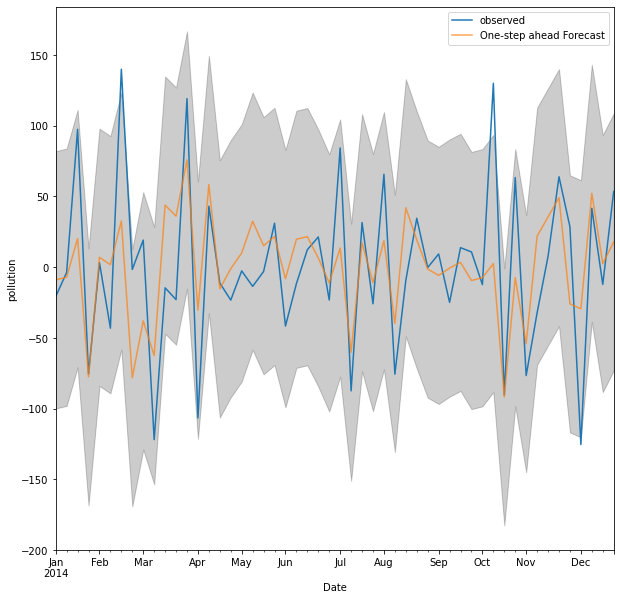

In [ ]:
pred = results.get_prediction(start="2014-01",end="2014-12", dynamic=False)
pred_ci = pred.conf_int()

ax = x['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('pollution')
plt.legend()

plt.show()

#### Quantification via RMSE

Calculer le RMSE de cette prédiction

In [ ]:
#TBD

45.2000605175691


#### Modifier les parametres (p,d,q), cette fois ci en ne differenciant  pas pas la serie (d=0).

En revenant sur les autocorelogrammes, determiner des nouvelles valeurs de p et q 


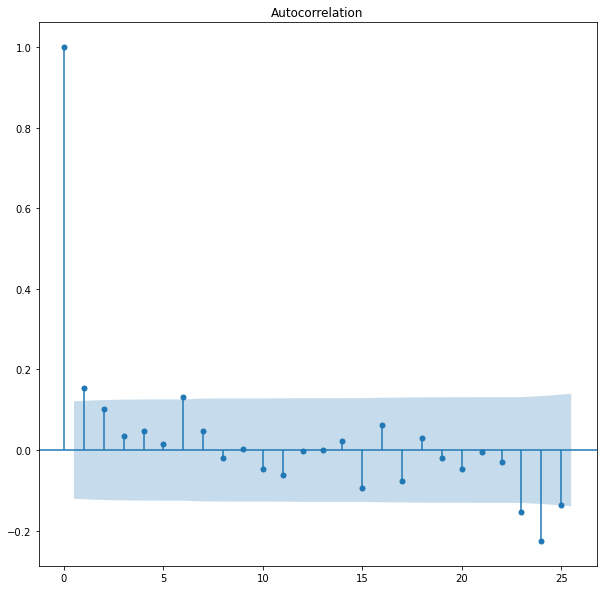

In [ ]:
# TBD

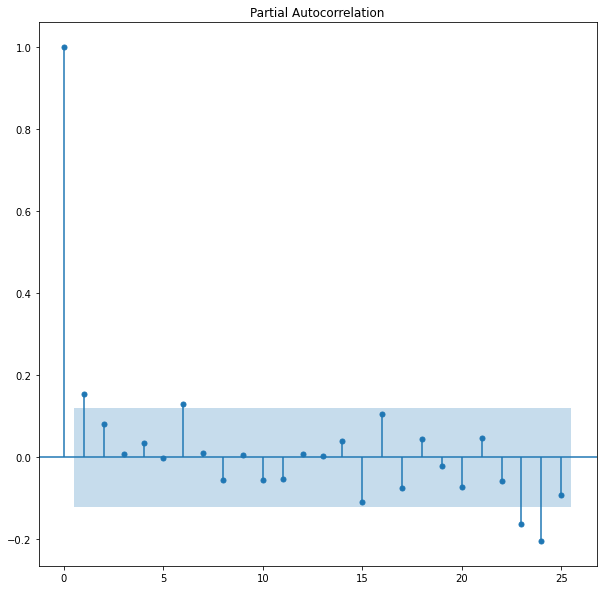

In [ ]:
# TBD

#### Caler votre modele ARMA 

In [ ]:
#TBD

                               SARIMAX Results                                
Dep. Variable:              pollution   No. Observations:                  262
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1352.815
Date:                Sat, 30 Apr 2022   AIC                           2713.630
Time:                        11:01:33   BIC                           2727.873
Sample:                    01-03-2010   HQIC                          2719.356
                         - 01-04-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.0405      4.833     19.456      0.000      84.567     103.514
ar.L1          0.6294      0.238      2.645      0.008       0.163       1.096
ma.L1         -0.4895      0.255     -1.918      0.0

Evaluer qualitativement votre résidu

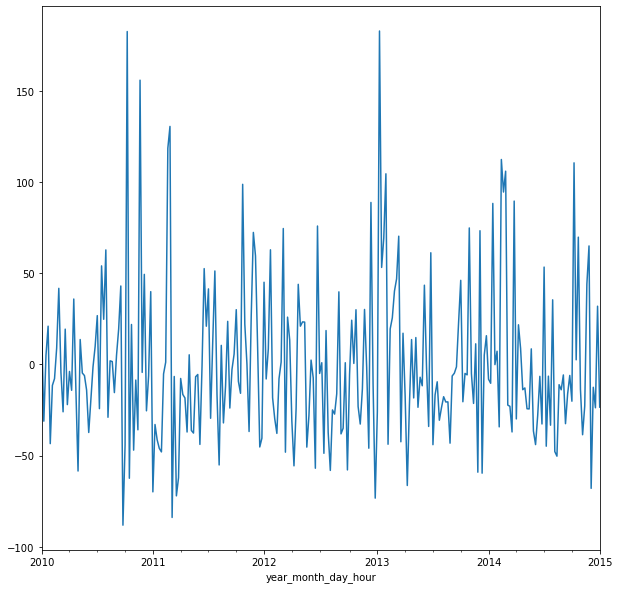

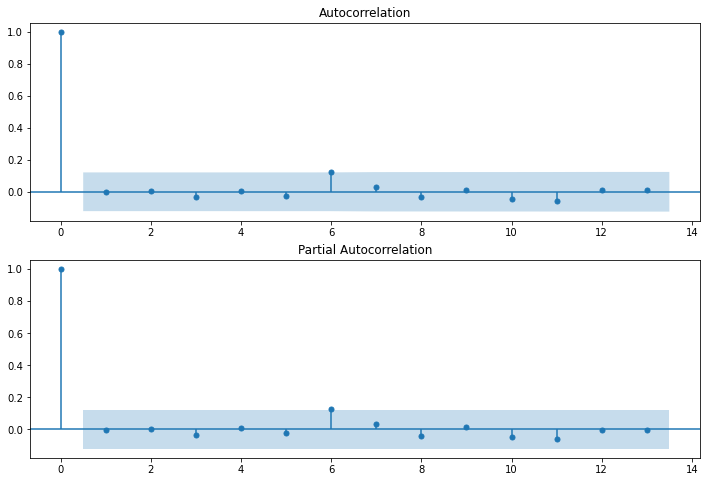

In [ ]:
#TBD

#### Prediction associée

Representez cette la prediction de ce nouveau modele

/home/david/anaconda3/envs/dev/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


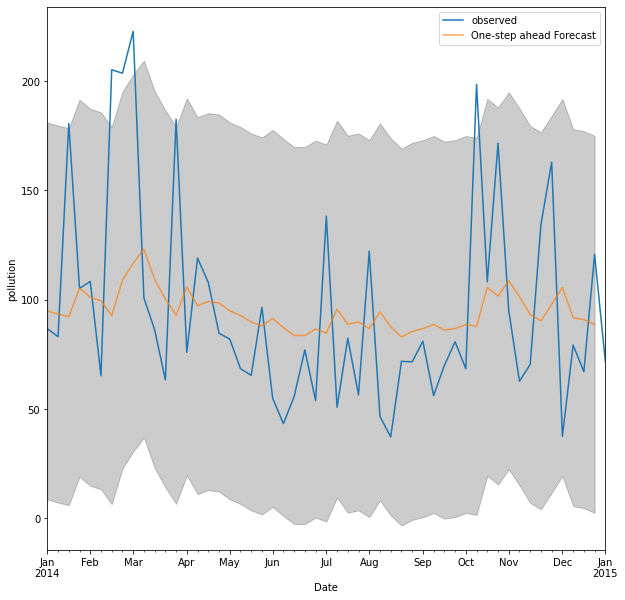

In [ ]:
#TBD

#### Calculer ce nouveau RMSE

In [ ]:

#TBD

45.983227038327115

#### Nous avons une erreur quasiment equivalente mais en comparant les tracés de prediction (avec et sans differenciation) 
nous voyons l'impact du choix de parametres sur la serie predictive construite ...


#### Pour retrouver une des meilleurs combinaisons de parametre nous pouvons simuler nombre d'entre elles et trouver celle qui minimise la metric AIC

Mais ça peut etre tres long ....

In [ ]:
import itertools
import warnings
from tqdm import tqdm

x=polution_ts["pollution"].resample('M').mean()

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))



warnings.filterwarnings("ignore") # specify to ignore warning messages
maxi=1000
for param in tqdm(pdq):
    for param_seasonal in tqdm(seasonal_pdq):
        try:
            mod = sm.tsa.statespace.SARIMAX(x,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('########################################')
            print('ARIMA{}x{}6 - AIC:{}'.format(param, param_seasonal, results.aic))
            print('########################################')
            if results.aic < maxi:
                combi='ARIMA{}x{}6 - AIC:{}'.format(param, param_seasonal, results.aic)
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 6)
SARIMAX: (0, 0, 1) x (0, 0, 2, 6)
SARIMAX: (0, 0, 2) x (0, 1, 0, 6)
SARIMAX: (0, 0, 2) x (0, 1, 1, 6)


  0%|                                                    | 0/27 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 11%|████▉                                       | 3/27 [00:00<00:00, 27.65it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.90750D+00    |proj g|=  5.11398D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   5.240D-09   5.907D+00
  F =   5.9074929048114253     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 0, 0)x(0, 0, 0, 6)6 - AIC:710.8991485773711
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  3.32391D+00    |proj g|=  2.18842D-02



 22%|█████████▊                                  | 6/27 [00:00<00:00, 22.82it/s] This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  3.30238D+00    |proj g|=  2.27199D-03

At iterate   30    f=  3.30141D+00    |proj g|=  1.11018D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     40      1     0     0   9.971D-06   3.301D+00
  F =   3.3013602200141694     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 0, 0)x(0, 1, 2, 6)6 - AIC:402.16322640170034
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 33%|██████████████▋                             | 9/27 [00:00<00:01, 16.37it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 44%|███████████████████                        | 12/27 [00:00<00:00, 18.03it/s] This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     76      2     2     0   4.529D+03   1.392D+01
  F =   13.917947405738301     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 0, 0)x(0, 2, 2, 6)6 - AIC:1676.1536886885963
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.73806D+00    |proj g|=  1.99915D-05

           * * *

Tit   = total number of iterations
Tnf 

 This problem is unconstrained.

 56%|███████████████████████▉                   | 15/27 [00:00<00:00, 18.37it/s] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


########################################
ARIMA(0, 0, 0)x(1, 1, 1, 6)6 - AIC:454.0268671813713
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.38728D+00    |proj g|=  1.38442D-01

At iterate    5    f=  3.30157D+00    |proj g|=  1.60291D-02

At iterate   10    f=  3.30028D+00    |proj g|=  1.81472D-02

At iterate   15    f=  3.27770D+00    |proj g|=  2.27395D-01

At iterate   20    f=  3.24912D+00    |proj g|=  1.67574D-02

At iterate   25    f=  3.24697D+00    |proj g|=  1.30310D-02

At iterate   30    f=  3.24685D+00    |proj g|=  4.00404D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy p

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 67%|████████████████████████████▋              | 18/27 [00:01<00:00, 13.43it/s]


At iterate    5    f=  1.17582D+01    |proj g|=  2.82496D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     81      2     0     0   2.825D+04   1.176D+01
  F =   11.758177365713205     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 0, 0)x(1, 2, 2, 6)6 - AIC:1418.9812838855846
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.89054D+00    |proj g|=  4.07637D

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 74%|███████████████████████████████▊           | 20/27 [00:01<00:00, 14.56it/s] This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 85%|████████████████████████████████████▋      | 23/27 [00:01<00:00, 15.88it/s]


At iterate   20    f=  3.83415D+00    |proj g|=  2.35559D-01

At iterate   25    f=  3.83271D+00    |proj g|=  2.86226D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     32      1     0     0   1.182D-03   3.833D+00
  F =   3.8327091366935870     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 0, 0)x(2, 0, 1, 6)6 - AIC:467.92509640323044
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.29979D+00    |proj g|=  7.98884D-02

At iterate   10    f=  3.29179D+00    |proj g|=  2.64442D-03

At iterate   15    f=  3.29167D+00    |proj g|=  2.65616D-03

At iterate   20    f=  3.29116D+00    |proj g|=  4.48409D-02

At iterate   25    f=  3.28237D+00    |proj g|=  1.43636D-01

At iterate   30    f=  3.26785D+00    |proj g|=  3.31386D-02

At iterate   35    f=  3.26400D+00    |proj g|=  3.31072D-03

At iterate   40    f=  3.26326D+00    |proj g|=  5.33966D-03

At iterate   45    f=  3.26272D+00    |proj g|=  8.30650D-03

At iterate   50    f=  3.26249D+00    |proj g|=  1.66450D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 93%|███████████████████████████████████████▊   | 25/27 [00:01<00:00, 12.98it/s] This problem is unconstrained.
 This problem is unconstrained.


########################################
ARIMA(0, 0, 0)x(2, 2, 0, 6)6 - AIC:371.9861491216939
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.10939D+00    |proj g|=  3.03949D-01

At iterate    5    f=  2.99271D+00    |proj g|=  1.26435D-02

At iterate   10    f=  2.99245D+00    |proj g|=  1.79978D-02

At iterate   15    f=  2.98466D+00    |proj g|=  7.93890D-02

At iterate   20    f=  2.98232D+00    |proj g|=  8.14432D-03

At iterate   25    f=  2.98218D+00    |proj g|=  3.89799D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = fina


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

  4%|█▋                                          | 1/27 [00:02<00:52,  2.02s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     77      4     2     0   2.771D+04   1.003D+01
  F =   10.034201701819272     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 0, 0)x(2, 2, 2, 6)6 - AIC:1214.1042042183126
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 11%|████▉                                       | 3/27 [00:00<00:01, 22.17it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56164D+00    |proj g|=  1.95721D-01

At iterate    5    f=  5.53861D+00    |proj g|=  3.01704D-02

At iterate   10    f=  5.44499D+00    |proj g|=  3.90844D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     17      1     0     0   2.783D-06   5.422D+00
  F =   5.4221988021457674     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 0, 1)x(0, 0, 0, 6)6 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.70446D+00    |proj g|=  8.35055D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     23      1     0     0   7.909D-07   3.704D+00
  F =   3.7043986190813878     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 0, 1)x(0, 1, 1, 6)6 - AIC:450.52783428976653
########################################


 This problem is unconstrained.

 22%|█████████▊                                  | 6/27 [00:00<00:01, 19.35it/s] This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.54859D+00    |proj g|=  2.68864D-01

At iterate    5    f=  3.33491D+00    |proj g|=  1.68141D-02

At iterate   10    f=  3.32974D+00    |proj g|=  2.66980D-02

At iterate   15    f=  3.26652D+00    |proj g|=  5.82518D-02

At iterate   20    f=  3.24063D+00    |proj g|=  1.93410D-02

At iterate   25    f=  3.22168D+00    |proj g|=  2.37335D-03

At iterate   30    f=  3.22153D+00    |proj g|=  3.51078D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


########################################
ARIMA(0, 0, 1)x(0, 2, 1, 6)6 - AIC:433.11910126468854
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11085D+01    |proj g|=  6.47189D-03
  ys=-1.825E+01  -gs= 5.501E-01 BFGS update SKIPPED
  ys=-3.884E+01  -gs= 5.586E-01 BFGS update SKIPPED
  ys=-5.479E+01  -gs= 5.609E-01 BFGS update SKIPPED
  ys=-1.151E+01  -gs= 5.645E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4  


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 33%|██████████████▋                             | 9/27 [00:00<00:01, 12.41it/s] This problem is unconstrained.
 This problem is unconstrained.

 41%|█████████████████▌                         | 11/27 [00:00<00:01, 13.81it/s] This problem is unconstrained.


########################################
ARIMA(0, 0, 1)x(0, 2, 2, 6)6 - AIC:1384.304323021644
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.05491D+00    |proj g|=  8.20758D-02

At iterate    5    f=  5.04286D+00    |proj g|=  7.27124D-03

At iterate   10    f=  4.91297D+00    |proj g|=  4.07316D-01

At iterate   15    f=  4.70335D+00    |proj g|=  1.58543D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     24      1    

 This problem is unconstrained.

 48%|████████████████████▋                      | 13/27 [00:00<00:01, 12.91it/s] This problem is unconstrained.



At iterate   25    f=  3.78009D+00    |proj g|=  3.18638D-01

At iterate   30    f=  3.76670D+00    |proj g|=  2.78818D-02

At iterate   35    f=  3.76565D+00    |proj g|=  7.26169D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     52      1     0     0   1.739D-05   3.766D+00
  F =   3.7656416048932488     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 0, 1)x(1, 0, 2, 6)6 - AIC:461.8769925871899
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =  

 This problem is unconstrained.

 56%|███████████████████████▉                   | 15/27 [00:01<00:00, 12.86it/s] This problem is unconstrained.
 This problem is unconstrained.

 63%|███████████████████████████                | 17/27 [00:01<00:00, 13.84it/s]


At iterate   20    f=  3.18531D+00    |proj g|=  4.23068D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     29      1     0     0   8.160D-06   3.185D+00
  F =   3.1853047312945089     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 0, 1)x(1, 1, 2, 6)6 - AIC:392.23656775534107
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.90949D+00    |proj g|=  1.38036D

 This problem is unconstrained.


  ys=-3.884E+01  -gs= 5.586E-01 BFGS update SKIPPED
  ys=-5.480E+01  -gs= 5.609E-01 BFGS update SKIPPED
  ys=-8.940E+00  -gs= 5.650E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     69      5     4     0   2.590D+04   1.143D+01
  F =   11.431711910597169     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 0, 1)x(1, 2, 2, 6)6 - AIC:1381.8054292716604
########################################



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 70%|██████████████████████████████▎            | 19/27 [00:01<00:00, 10.04it/s] This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.46376D+00    |proj g|=  1.03520D-01

At iterate    5    f=  4.43782D+00    |proj g|=  1.61824D-02

At iterate   10    f=  4.42357D+00    |proj g|=  5.35853D-02

At iterate   15    f=  4.06442D+00    |proj g|=  1.10403D+00

At iterate   20    f=  3.88148D+00    |proj g|=  1.06456D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     36      1     0     0   1.805D-06   3.881D+00
  F =   3.8813844357414542     

CONVERG


 78%|█████████████████████████████████▍         | 21/27 [00:01<00:00,  9.40it/s]


At iterate   15    f=  4.13226D+00    |proj g|=  1.67901D-01

At iterate   20    f=  3.78515D+00    |proj g|=  6.22340D-01

At iterate   25    f=  3.68149D+00    |proj g|=  4.43333D-01

At iterate   30    f=  3.65692D+00    |proj g|=  2.53172D-02

At iterate   35    f=  3.65670D+00    |proj g|=  4.80214D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     50      1     0     0   4.802D-05   3.657D+00
  F =   3.6567033177153703     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 0, 1)x(2, 0, 2, 6)6 - AIC:450.80439812584444
##################

 This problem is unconstrained.
 This problem is unconstrained.

 85%|████████████████████████████████████▋      | 23/27 [00:01<00:00, 10.30it/s] This problem is unconstrained.



At iterate   20    f=  3.31093D+00    |proj g|=  2.09829D-01

At iterate   25    f=  3.30875D+00    |proj g|=  1.63333D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     36      1     0     0   2.311D-05   3.309D+00
  F =   3.3087534911929164     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 0, 1)x(2, 1, 1, 6)6 - AIC:407.05041894314996
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 93%|███████████████████████████████████████▊   | 25/27 [00:02<00:00,  9.94it/s] This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  3.04946D+00    |proj g|=  1.06160D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     47      2     0     0   1.062D-05   3.049D+00
  F =   3.0494606276162881     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 0, 1)x(2, 2, 0, 6)6 - AIC:373.93527531395455
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.32036D+00    |proj g|=  1.35951D


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

  7%|███▎                                        | 2/27 [00:04<00:58,  2.35s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     69      5     4     0   2.587D+04   9.754D+00
  F =   9.7539468669280343     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 0, 1)x(2, 2, 2, 6)6 - AIC:1182.4736240313641
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.41656D+00    |proj g|=  1.54505D-01

At iterate    5    f=  5.37040D+00    |proj g|=  1.48715D-02

At iterate   10    f=  5.21908D+00    |proj g|=  4.42222D-01

At iterate   15    f=  5.12385D+00    |proj g|=  1.79455D-01

At iterate   20    f=  5.11298D+00    |proj g|=  4.89480D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     26      1     0     0   1.138D-06   5.113D+00
  F =   5.1129802136147839     

CONVERG


 11%|████▉                                       | 3/27 [00:00<00:01, 16.19it/s] This problem is unconstrained.


########################################
ARIMA(0, 0, 2)x(0, 0, 2, 6)6 - AIC:474.1042937970064
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49211D+00    |proj g|=  8.97683D-03

At iterate    5    f=  4.49205D+00    |proj g|=  3.02009D-03

At iterate   10    f=  4.49158D+00    |proj g|=  4.71994D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   1.402D-05   4.492D+00
  F =   4.4915671767867291   

 This problem is unconstrained.
 This problem is unconstrained.

 22%|█████████▊                                  | 6/27 [00:00<00:01, 14.96it/s]

########################################
ARIMA(0, 0, 2)x(0, 1, 2, 6)6 - AIC:386.516976641388
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.41801D+00    |proj g|=  2.22120D-02


 This problem is unconstrained.
 This problem is unconstrained.

 30%|█████████████                               | 8/27 [00:00<00:01, 16.14it/s]


At iterate    5    f=  4.41767D+00    |proj g|=  2.89237D-03

At iterate   10    f=  4.41636D+00    |proj g|=  1.42715D-02

At iterate   15    f=  4.41595D+00    |proj g|=  5.59738D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     19      1     0     0   3.112D-06   4.416D+00
  F =   4.4159480795801622     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 0, 2)x(0, 2, 0, 6)6 - AIC:535.9137695496195
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =  

 This problem is unconstrained.


  ys=-6.761E+01  -gs= 5.456E-01 BFGS update SKIPPED
  ys=-3.323E-02  -gs= 5.447E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 37%|███████████████▉                           | 10/27 [00:00<00:01,  8.62it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     86      2     2     0   1.348D+04   1.124D+01
  F =   11.243024364496312     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 0, 2)x(0, 2, 2, 6)6 - AIC:1359.1629237395575
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.05810D+00    |proj g|=  7.89475D-02

At iterate    5    f=  5.04401D+00    |proj g|=  1.41131D

 This problem is unconstrained.



At iterate   25    f=  4.17478D+00    |proj g|=  1.03463D-02

At iterate   30    f=  4.17477D+00    |proj g|=  4.55325D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     45      1     0     0   4.553D-06   4.175D+00
  F =   4.1747727732024043     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 0, 2)x(1, 0, 1, 6)6 - AIC:510.97273278428855
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bou


 44%|███████████████████                        | 12/27 [00:01<00:01,  7.65it/s] This problem is unconstrained.
 This problem is unconstrained.

 52%|██████████████████████▎                    | 14/27 [00:01<00:01,  9.46it/s]


At iterate   45    f=  3.69021D+00    |proj g|=  2.23550D-02

At iterate   50    f=  3.68963D+00    |proj g|=  2.47948D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     68      1     0     0   2.479D-02   3.690D+00
  F =   3.6896272388406999     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(0, 0, 2)x(1, 0, 2, 6)6 - AIC:454.755268660884
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bound

 This problem is unconstrained.
 This problem is unconstrained.

 59%|█████████████████████████▍                 | 16/27 [00:01<00:01,  9.62it/s] This problem is unconstrained.



At iterate   20    f=  3.12068D+00    |proj g|=  2.09832D-02

At iterate   25    f=  3.11885D+00    |proj g|=  3.78286D-03

At iterate   30    f=  3.11881D+00    |proj g|=  3.14702D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     37      1     0     0   7.961D-06   3.119D+00
  F =   3.1188056169823759     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 0, 2)x(1, 1, 2, 6)6 - AIC:386.2566740378851
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =  

 This problem is unconstrained.


  ys=-6.852E+01  -gs= 5.456E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 67%|████████████████████████████▋              | 18/27 [00:02<00:01,  5.91it/s] This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     87      2     1     0   7.098D+03   1.120D+01
  F =   11.198790443496989     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 0, 2)x(1, 2, 2, 6)6 - AIC:1355.8548532196387
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.45608D+00    |proj g|=  4.29714D-02

At iterate    5    f=  4.43892D+00    |proj g|=  1.55199D


 74%|███████████████████████████████▊           | 20/27 [00:02<00:01,  6.84it/s] This problem is unconstrained.


########################################
ARIMA(0, 0, 2)x(2, 0, 1, 6)6 - AIC:471.12900392050904
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.40685D+00    |proj g|=  3.39407D-01

At iterate    5    f=  4.15850D+00    |proj g|=  7.92579D-03

At iterate   10    f=  4.14808D+00    |proj g|=  1.12797D-01

At iterate   15    f=  3.98373D+00    |proj g|=  1.83138D-01

At iterate   20    f=  3.59703D+00    |proj g|=  8.93139D-01

At iterate   25    f=  3.58440D+00    |proj g|=  1.08988D-01

At iterate   30    f=  3.58266D+00    |proj g|=  6.21351D-02

At iterate   35    f=  3.58176D+00    |proj g|=  1.82101D-02



 78%|█████████████████████████████████▍         | 21/27 [00:02<00:00,  6.29it/s] This problem is unconstrained.
 This problem is unconstrained.

 85%|████████████████████████████████████▋      | 23/27 [00:02<00:00,  7.50it/s]


At iterate   40    f=  3.58162D+00    |proj g|=  2.13659D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     62      1     0     0   2.137D-04   3.582D+00
  F =   3.5816193730761978     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 0, 2)x(2, 0, 2, 6)6 - AIC:443.7943247691437
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46879D+00    |proj g|=  6.58310D-

 This problem is unconstrained.

 89%|██████████████████████████████████████▏    | 24/27 [00:02<00:00,  7.16it/s] This problem is unconstrained.



At iterate    5    f=  3.22387D+00    |proj g|=  3.56620D-02

At iterate   10    f=  3.21627D+00    |proj g|=  1.95951D-02

At iterate   15    f=  3.15305D+00    |proj g|=  1.46574D-01

At iterate   20    f=  3.12231D+00    |proj g|=  4.93724D-02

At iterate   25    f=  3.11470D+00    |proj g|=  4.08785D-03

At iterate   30    f=  3.11453D+00    |proj g|=  3.30702D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     34      1     0     0   4.075D-06   3.115D+00
  F =   3.1145272592828364     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 0

 This problem is unconstrained.

 96%|█████████████████████████████████████████▍ | 26/27 [00:03<00:00,  7.48it/s]

########################################
ARIMA(0, 0, 2)x(2, 2, 0, 6)6 - AIC:375.87527514256834
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.29678D+00    |proj g|=  1.40514D-01

At iterate    5    f=  3.26430D+00    |proj g|=  5.84348D-03

At iterate   10    f=  3.24210D+00    |proj g|=  2.91604D-02

At iterate   15    f=  3.05134D+00    |proj g|=  2.70995D-01

At iterate   20    f=  2.98283D+00    |proj g|=  6.32621D-03

At iterate   25    f=  2.98233D+00    |proj g|=  1.20388D-02

At iterate   30    f=  2.98188D+00    |proj g|=  1.45631D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy 

 This problem is unconstrained.


  ys=-6.852E+01  -gs= 5.456E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 11%|████▉                                       | 3/27 [00:08<01:10,  2.94s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     87      2     1     0   7.284D+03   9.569D+00
  F =   9.5692078745890718     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 0, 2)x(2, 2, 2, 6)6 - AIC:1162.3049449506887
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 19%|████████▏                                   | 5/27 [00:00<00:00, 44.79it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.85452D+00    |proj g|=  8.42330D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      4      1     0     0   7.172D-07   4.854D+00
  F =   4.8542866908857540     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 1, 0)x(0, 0, 0, 6)6 - AIC:584.5144029062905
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.68620D+00    |proj g|=  1.70943D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   2.163D-06   4.678D+00
  F =   4.6782054072558505     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 1, 0)x(0, 2, 0, 6)6 - AIC:563.3846488707021
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   10    f=  3.72988D+00    |proj g|=  2.69641D-01

At iterate   15    f=  3.69944D+00    |proj g|=  1.11955D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     18      1     0     0   1.120D-06   3.699D+00
  F =   3.6994433820457031     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 1, 0)x(0, 2, 1, 6)6 - AIC:447.9332058454844
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the boun


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 37%|███████████████▉                           | 10/27 [00:00<00:00, 22.68it/s]

########################################
ARIMA(0, 1, 0)x(0, 2, 2, 6)6 - AIC:1461.4418697725955
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.42039D+00    |proj g|=  4.45208D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.452D-06   4.420D+00
  F =   4.4203867915565604     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 1, 0)x(1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.35738D+00    |proj g|=  4.75303D-02

At iterate    5    f=  4.35275D+00    |proj g|=  1.00405D-02

At iterate   10    f=  4.33888D+00    |proj g|=  8.88665D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   7.308D-05   4.339D+00
  F =   4.3388031363700836     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 1, 0)x(1, 0, 1, 6)6 

 48%|████████████████████▋                      | 13/27 [00:00<00:00, 19.87it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95937D+00    |proj g|=  1.94217D-01


 This problem is unconstrained.
 This problem is unconstrained.

 59%|█████████████████████████▍                 | 16/27 [00:00<00:00, 19.96it/s] This problem is unconstrained.



At iterate    5    f=  3.91545D+00    |proj g|=  4.10442D-03

At iterate   10    f=  3.91024D+00    |proj g|=  6.79665D-02

At iterate   15    f=  3.90024D+00    |proj g|=  8.94104D-04

At iterate   20    f=  3.90021D+00    |proj g|=  6.22989D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     24      1     0     0   1.501D-06   3.900D+00
  F =   3.9002125430923504     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 1, 0)x(1, 1, 1, 6)6 - AIC:474.02550517108205
########################################
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 70%|██████████████████████████████▎            | 19/27 [00:00<00:00, 16.38it/s] This problem is unconstrained.



At iterate    5    f=  1.20408D+01    |proj g|=  4.77326D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     61      1     0     0   4.773D+04   1.204D+01
  F =   12.040842553290057     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 1, 0)x(1, 2, 2, 6)6 - AIC:1452.901106394807
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.93457D+00    |proj g|=  4.17355D-

 This problem is unconstrained.

 78%|█████████████████████████████████▍         | 21/27 [00:01<00:00, 13.94it/s]


At iterate   20    f=  3.81952D+00    |proj g|=  1.15491D-02

At iterate   25    f=  3.79004D+00    |proj g|=  6.63469D-02

At iterate   30    f=  3.78518D+00    |proj g|=  8.32814D-03

At iterate   35    f=  3.78194D+00    |proj g|=  7.68377D-03

At iterate   40    f=  3.77993D+00    |proj g|=  5.09395D-03

At iterate   45    f=  3.77897D+00    |proj g|=  4.22825D-03

At iterate   50    f=  3.77825D+00    |proj g|=  5.80320D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     63      1     0     0   5.803D-03   3.778D+00
  F =   3.7782500734568054     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.


########################################
ARIMA(0, 1, 0)x(2, 1, 0, 6)6 - AIC:421.5886283841718
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.47818D+00    |proj g|=  1.62611D-01

At iterate    5    f=  3.46318D+00    |proj g|=  7.28445D-03

At iterate   10    f=  3.46310D+00    |proj g|=  6.54169D-03

At iterate   15    f=  3.46236D+00    |proj g|=  1.09681D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1    

 This problem is unconstrained.

 89%|██████████████████████████████████████▏    | 24/27 [00:01<00:00, 14.55it/s] This problem is unconstrained.



At iterate   10    f=  3.38167D+00    |proj g|=  3.73490D-02

At iterate   15    f=  3.37636D+00    |proj g|=  7.76321D-03

At iterate   20    f=  3.37628D+00    |proj g|=  6.83640D-03

At iterate   25    f=  3.37561D+00    |proj g|=  4.58579D-03

At iterate   30    f=  3.37560D+00    |proj g|=  3.51035D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     33      1     0     0   3.510D-06   3.376D+00
  F =   3.3756037127064302     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 1, 0)x(2, 1, 2, 6)6 - AIC:415.07244552477164
##################


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     15      1     0     0   1.423D-05   3.119D+00
  F =   3.1187915427196726     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 1, 0)x(2, 2, 0, 6)6 - AIC:380.25498512636074
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.17972D+00    |proj g|=  3.35603D-01

At iterate    5    f=  3.07461D+00    |proj g|=  2.85988D


 96%|█████████████████████████████████████████▍ | 26/27 [00:01<00:00, 14.28it/s] This problem is unconstrained.


########################################
ARIMA(0, 1, 0)x(2, 2, 1, 6)6 - AIC:375.81663319767387
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.99301D+01    |proj g|=  1.24089D-02
  ys=-3.665E+01  -gs= 5.582E-01 BFGS update SKIPPED
  ys=-4.604E+01  -gs= 5.599E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     82      3     2     0   9.718D+04   1.018D+01
  F =   10.175126849987278     

ABNORMAL_TERMIN


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 15%|██████▌                                     | 4/27 [00:10<00:57,  2.52s/it]

########################################
ARIMA(0, 1, 0)x(2, 2, 2, 6)6 - AIC:1231.0152219984734
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 11%|████▉                                       | 3/27 [00:00<00:01, 23.52it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.62141D+00    |proj g|=  1.48403D-01

At iterate    5    f=  4.55978D+00    |proj g|=  7.23778D-03

At iterate   10    f=  4.55564D+00    |proj g|=  2.06346D-01

At iterate   15    f=  4.54457D+00    |proj g|=  3.56839D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     24      1     0     0   3.031D-06   4.545D+00
  F =   4.5445676887893418     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  3.66951D+00    |proj g|=  9.60876D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     24      1     0     0   9.609D-07   3.670D+00
  F =   3.6695137361837551     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.

 22%|█████████▊                                  | 6/27 [00:00<00:01, 19.71it/s] This problem is unconstrained.


########################################
ARIMA(0, 1, 1)x(0, 1, 1, 6)6 - AIC:446.34164834205063
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.93603D+00    |proj g|=  6.92612D-01

At iterate    5    f=  3.32363D+00    |proj g|=  2.13932D-02

At iterate   10    f=  3.31630D+00    |proj g|=  2.51130D-02

At iterate   15    f=  3.25617D+00    |proj g|=  1.39916D-01

At iterate   20    f=  3.17583D+00    |proj g|=  1.22360D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnin

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-4.822E+01  -gs= 5.439E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 33%|██████████████▋                             | 9/27 [00:00<00:01, 11.33it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     87      2     1     0   2.312D+02   1.195D+01
  F =   11.945259301850619     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 1, 1)x(0, 2, 2, 6)6 - AIC:1441.4311162220743
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.25664D+00    |proj g|=  1.73318D-01

At iterate    5    f=  4.19163D+00    |proj g|=  9.44301D


 44%|███████████████████                        | 12/27 [00:00<00:01, 12.85it/s] This problem is unconstrained.
 This problem is unconstrained.

 52%|██████████████████████▎                    | 14/27 [00:01<00:00, 13.69it/s]

########################################
ARIMA(0, 1, 1)x(1, 0, 2, 6)6 - AIC:425.3138680998245
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.04254D+00    |proj g|=  1.00247D-01

At iterate    5    f=  4.00780D+00    |proj g|=  9.19489D-03

At iterate   10    f=  3.91891D+00    |proj g|=  3.09267D-01

At iterate   15    f=  3.85810D+00    |proj g|=  8.84462D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     28      1    

 This problem is unconstrained.
 This problem is unconstrained.

 59%|█████████████████████████▍                 | 16/27 [00:01<00:00, 11.97it/s]


At iterate   20    f=  3.12901D+00    |proj g|=  4.14677D-02

At iterate   25    f=  3.12644D+00    |proj g|=  3.91809D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     36      1     0     0   1.308D-05   3.126D+00
  F =   3.1264351175254177     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 1, 1)x(1, 1, 2, 6)6 - AIC:385.1722141030501
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  3.30996D+00    |proj g|=  1.03658D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     31      1     0     0   9.061D-06   3.310D+00
  F =   3.3099006025149111     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 1, 1)x(1, 2, 1, 6)6 - AIC:405.18807230178936
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.12132D+01    |proj g|=  5.48749D


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 67%|████████████████████████████▋              | 18/27 [00:01<00:01,  8.07it/s] This problem is unconstrained.
 This problem is unconstrained.

 74%|███████████████████████████████▊           | 20/27 [00:01<00:00,  8.99it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     87      2     1     0   2.136D+02   1.196D+01
  F =   11.964677870362467     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 1, 1)x(1, 2, 2, 6)6 - AIC:1445.761344443496
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.78815D+00    |proj g|=  2.48197D-01

At iterate    5    f=  3.73042D+00    |proj g|=  2.10106D-

 This problem is unconstrained.
 This problem is unconstrained.




At iterate    5    f=  3.54093D+00    |proj g|=  8.36887D-02

At iterate   10    f=  3.51424D+00    |proj g|=  1.06356D-02

At iterate   15    f=  3.48058D+00    |proj g|=  6.69793D-02

At iterate   20    f=  3.45133D+00    |proj g|=  5.52706D-02

At iterate   25    f=  3.44514D+00    |proj g|=  1.71947D-02

At iterate   30    f=  3.44450D+00    |proj g|=  1.77321D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     43      1     0     0   2.419D-05   3.444D+00
  F =   3.4444992467419371     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 1

 81%|███████████████████████████████████        | 22/27 [00:02<00:00,  8.82it/s] This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51150D+00    |proj g|=  1.69404D-01

At iterate    5    f=  3.47396D+00    |proj g|=  2.33188D-02

At iterate   10    f=  3.45983D+00    |proj g|=  7.98107D-02

At iterate   15    f=  3.44947D+00    |proj g|=  1.93914D-02

At iterate   20    f=  3.32817D+00    |proj g|=  5.54712D-01

At iterate   25    f=  3.27737D+00    |proj g|=  2.88442D-02

At iterate   30    f=  3.27716D+00    |proj g|=  1.11434D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


 89%|██████████████████████████████████████▏    | 24/27 [00:02<00:00,  7.50it/s]


At iterate   20    f=  3.17547D+00    |proj g|=  1.24443D-02

At iterate   25    f=  3.17274D+00    |proj g|=  7.01432D-02

At iterate   30    f=  3.14875D+00    |proj g|=  4.16626D-02

At iterate   35    f=  3.14341D+00    |proj g|=  3.48091D-02

At iterate   40    f=  3.14014D+00    |proj g|=  1.35929D-02

At iterate   45    f=  3.13977D+00    |proj g|=  1.77956D-03

At iterate   50    f=  3.13924D+00    |proj g|=  7.26612D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     63      1     0     0   7.266D-03   3.139D+00
  F =   3.1392408027597809     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.00668D+00    |proj g|=  1.17418D-01

At iterate   20    f=  3.00240D+00    |proj g|=  1.77559D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     29      1     0     0   1.776D-05   3.002D+00
  F =   3.0024013857985707     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 1, 1)x(2, 2, 0, 6)6 - AIC:368.2881662958285
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the boun


 96%|█████████████████████████████████████████▍ | 26/27 [00:02<00:00,  7.33it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     52      1     0     0   2.627D-06   2.951D+00
  F =   2.9511587254837517     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 1, 1)x(2, 2, 1, 6)6 - AIC:364.1390470580502
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97763D+01    |proj g|=  5.48749D-03
  ys=-4.822E+01  -gs= 5.439E-01 BFGS update SKIPPED


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 19%|████████▏                                   | 5/27 [00:13<00:59,  2.70s/it]


At iterate    5    f=  1.05270D+01    |proj g|=  3.60398D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     63      1     1     0   3.604D+02   1.053D+01
  F =   10.527028380097962     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 1, 1)x(2, 2, 2, 6)6 - AIC:1275.2434056117554
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 11%|████▉                                       | 3/27 [00:00<00:01, 22.56it/s] This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.53517D+00    |proj g|=  1.72484D-01

At iterate    5    f=  4.48491D+00    |proj g|=  5.97511D-02

At iterate   10    f=  4.48120D+00    |proj g|=  2.64117D-02

At iterate   15    f=  4.46385D+00    |proj g|=  8.36792D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     22      1     0     0   1.292D-06   4.464D+00
  F =   4.4638419651454191     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########

 This problem is unconstrained.



At iterate   15    f=  3.62350D+00    |proj g|=  4.35878D-01

At iterate   20    f=  3.57372D+00    |proj g|=  1.94060D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     28      1     0     0   3.187D-06   3.574D+00
  F =   3.5737200381052294     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 1, 2)x(0, 1, 1, 6)6 - AIC:436.84640457262753
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bou


At iterate   45    f=  3.09779D+00    |proj g|=  5.77831D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     57      1     0     0   2.891D-05   3.098D+00
  F =   3.0977929952383620     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 1, 2)x(0, 1, 2, 6)6 - AIC:381.7351594286034
########################################


 22%|█████████▊                                  | 6/27 [00:00<00:01, 13.80it/s] This problem is unconstrained.
 This problem is unconstrained.

 30%|█████████████                               | 8/27 [00:00<00:01, 14.30it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.40881D+00    |proj g|=  1.48511D-01

At iterate    5    f=  4.34912D+00    |proj g|=  7.71209D-04

At iterate   10    f=  4.34822D+00    |proj g|=  1.73295D-02

At iterate   15    f=  4.34710D+00    |proj g|=  1.35319D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     20      1     0     0   2.277D-05   4.347D+00
  F =   4.3470973755622468     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########

 This problem is unconstrained.


  ys=-8.531E+01  -gs= 5.300E-01 BFGS update SKIPPED
  ys=-2.822E+01  -gs= 5.218E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     59      4     3     0   8.305D+04   1.125D+01
  F =   11.249788863451650     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 1, 2)x(0, 2, 2, 6)6 - AIC:1359.974663614198
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 37%|███████████████▉                           | 10/27 [00:00<00:01, 10.62it/s]

########################################
ARIMA(0, 1, 2)x(1, 0, 0, 6)6 - AIC:506.67605995782435
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.01848D+00    |proj g|=  1.70673D-01

At iterate    5    f=  3.95984D+00    |proj g|=  1.07127D-01

At iterate   10    f=  3.95152D+00    |proj g|=  2.21268D-02

At iterate   15    f=  3.94528D+00    |proj g|=  9.91226D-02

At iterate   20    f=  3.90751D+00    |proj g|=  1.24618D-02


 This problem is unconstrained.
 This problem is unconstrained.

 44%|███████████████████                        | 12/27 [00:01<00:01, 10.67it/s]


At iterate   25    f=  3.90703D+00    |proj g|=  6.00651D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     31      1     0     0   1.006D-05   3.907D+00
  F =   3.9070335391664153     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 1, 2)x(1, 0, 1, 6)6 - AIC:478.84402469996985
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.69534D+00    |proj g|=  5.14209D

 This problem is unconstrained.



At iterate    5    f=  3.99150D+00    |proj g|=  9.21204D-03

At iterate   10    f=  3.92936D+00    |proj g|=  2.44948D-01

At iterate   15    f=  3.85459D+00    |proj g|=  1.31843D-01

At iterate   20    f=  3.84516D+00    |proj g|=  1.47874D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     35      1     0     0   6.157D-06   3.845D+00
  F =   3.8451616806410160     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 1, 2)x(1, 1, 0, 6)6 - AIC:469.41940167692195
########################################
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.

 52%|██████████████████████▎                    | 14/27 [00:01<00:01, 11.70it/s] This problem is unconstrained.



At iterate   10    f=  3.68007D+00    |proj g|=  3.86753D-01

At iterate   15    f=  3.51639D+00    |proj g|=  1.99686D-02

At iterate   20    f=  3.51603D+00    |proj g|=  4.13469D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   5.933D-06   3.516D+00
  F =   3.5160257295345430     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 1, 2)x(1, 1, 1, 6)6 - AIC:431.9230875441452
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =  

 This problem is unconstrained.

 59%|█████████████████████████▍                 | 16/27 [00:01<00:01, 10.40it/s]


At iterate    5    f=  3.84746D+00    |proj g|=  1.14923D-02

At iterate   10    f=  3.84554D+00    |proj g|=  3.56083D-02

At iterate   15    f=  3.72437D+00    |proj g|=  4.77628D-01

At iterate   20    f=  3.66983D+00    |proj g|=  1.87382D-02

At iterate   25    f=  3.66973D+00    |proj g|=  1.22022D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     34      1     0     0   1.220D-06   3.670D+00
  F =   3.6697337285849132     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 1, 2)x(1, 2, 0, 6)6 - AIC:448.36804743018956
##################

 This problem is unconstrained.



At iterate   15    f=  3.33717D+00    |proj g|=  2.20908D-01

At iterate   20    f=  3.22655D+00    |proj g|=  1.60674D-02

At iterate   25    f=  3.22634D+00    |proj g|=  1.19700D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     36      1     0     0   2.116D-06   3.226D+00
  F =   3.2263379388699174     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 1, 2)x(1, 2, 1, 6)6 - AIC:397.1605526643901
########################################


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.05331D+01    |proj g|=  5.70676D-03
  ys=-8.690E+02  -gs= 5.330E-01 BFGS update SKIPPED
  ys=-8.532E+01  -gs= 5.300E-01 BFGS update SKIPPED
  ys=-2.872E+01  -gs= 5.219E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 67%|████████████████████████████▋              | 18/27 [00:01<00:01,  7.57it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     59      4     3     0   8.448D+04   1.125D+01
  F =   11.250509671849789     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 1, 2)x(1, 2, 2, 6)6 - AIC:1362.0611606219748
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.78136D+00    |proj g|=  2.15791D-01

At iterate    5    f=  3.73192D+00    |proj g|=  5.79643D

 This problem is unconstrained.

 70%|██████████████████████████████▎            | 19/27 [00:01<00:01,  7.89it/s] This problem is unconstrained.


########################################
ARIMA(0, 1, 2)x(2, 0, 0, 6)6 - AIC:453.6605562921583
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.78630D+00    |proj g|=  2.04331D-01

At iterate    5    f=  3.73180D+00    |proj g|=  6.96968D-02

At iterate   10    f=  3.72331D+00    |proj g|=  3.43118D-02

At iterate   15    f=  3.71989D+00    |proj g|=  4.85707D-02



 74%|███████████████████████████████▊           | 20/27 [00:02<00:00,  7.93it/s]


At iterate   20    f=  3.68708D+00    |proj g|=  1.32027D-01

At iterate   25    f=  3.68451D+00    |proj g|=  1.19769D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     30      1     0     0   1.188D-05   3.685D+00
  F =   3.6845114293170713     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 1, 2)x(2, 0, 1, 6)6 - AIC:454.1413715180486
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.

 78%|█████████████████████████████████▍         | 21/27 [00:02<00:00,  7.85it/s]


At iterate   20    f=  3.42732D+00    |proj g|=  1.09087D-01

At iterate   25    f=  3.41013D+00    |proj g|=  2.84864D-03

At iterate   30    f=  3.41011D+00    |proj g|=  1.16494D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     34      1     0     0   1.165D-04   3.410D+00
  F =   3.4101091310614837     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 1, 2)x(2, 0, 2, 6)6 - AIC:423.21309572737806
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M = 

 This problem is unconstrained.



At iterate    5    f=  3.46055D+00    |proj g|=  6.11031D-02

At iterate   10    f=  3.44874D+00    |proj g|=  2.64248D-02

At iterate   15    f=  3.31065D+00    |proj g|=  1.96922D-01

At iterate   20    f=  3.29258D+00    |proj g|=  8.58402D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     29      1     0     0   8.741D-06   3.293D+00
  F =   3.2925756029246767     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            



 81%|███████████████████████████████████        | 22/27 [00:02<00:00,  7.37it/s] This problem is unconstrained.


########################################
ARIMA(0, 1, 2)x(2, 1, 0, 6)6 - AIC:405.1090723509612
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.49792D+00    |proj g|=  1.76856D-01

At iterate    5    f=  3.46104D+00    |proj g|=  1.18690D-02

At iterate   10    f=  3.45614D+00    |proj g|=  1.30206D-02

At iterate   15    f=  3.43879D+00    |proj g|=  6.07226D-02

At iterate   20    f=  3.38133D+00    |proj g|=  1.87757D-01



 85%|████████████████████████████████████▋      | 23/27 [00:02<00:00,  5.57it/s]


At iterate   25    f=  3.30758D+00    |proj g|=  6.12222D-02

At iterate   30    f=  3.27743D+00    |proj g|=  1.19169D-02

At iterate   35    f=  3.27705D+00    |proj g|=  1.02517D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     58      1     0     0   8.730D-06   3.277D+00
  F =   3.2770454649269221     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 1, 2)x(2, 1, 1, 6)6 - AIC:405.24545579123065
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M = 

 This problem is unconstrained.



At iterate   15    f=  3.18645D+00    |proj g|=  5.62543D-02

At iterate   20    f=  3.07188D+00    |proj g|=  1.23485D-01

At iterate   25    f=  3.05862D+00    |proj g|=  8.07080D-03

At iterate   30    f=  3.05839D+00    |proj g|=  3.44417D-05




 89%|██████████████████████████████████████▏    | 24/27 [00:02<00:00,  4.83it/s]

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     34      1     0     0   1.322D-05   3.058D+00
  F =   3.0583924067543413     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 1, 2)x(2, 1, 2, 6)6 - AIC:381.00708881052094
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.25634D+00    |proj g|=  6.24533D-02


 This problem is unconstrained.

 93%|███████████████████████████████████████▊   | 25/27 [00:03<00:00,  4.95it/s]


At iterate    5    f=  3.24988D+00    |proj g|=  5.99972D-03

At iterate   10    f=  3.23743D+00    |proj g|=  2.37755D-02

At iterate   15    f=  3.10098D+00    |proj g|=  4.16610D-01

At iterate   20    f=  3.00175D+00    |proj g|=  4.18134D-02

At iterate   25    f=  3.00096D+00    |proj g|=  2.05599D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     34      1     0     0   8.163D-06   3.001D+00
  F =   3.0009587250530152     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 1, 2)x(2, 2, 0, 6)6 - AIC:370.1150470063618
###################

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.26346D+00    |proj g|=  6.34034D-02

At iterate    5    f=  3.24691D+00    |proj g|=  5.04101D-03

At iterate   10    f=  3.23646D+00    |proj g|=  3.19525D-02

At iterate   15    f=  3.17961D+00    |proj g|=  2.37598D-01

At iterate   20    f=  3.00633D+00    |proj g|=  1.36426D-01

At iterate   25    f=  2.96314D+00    |proj g|=  8.77901D-02



 96%|█████████████████████████████████████████▍ | 26/27 [00:03<00:00,  4.44it/s]


At iterate   30    f=  2.95072D+00    |proj g|=  1.61773D-03

At iterate   35    f=  2.95070D+00    |proj g|=  3.35126D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     47      1     0     0   4.672D-06   2.951D+00
  F =   2.9507035697256083     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 1, 2)x(2, 2, 1, 6)6 - AIC:366.084428367073
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bound

 This problem is unconstrained.


  ys=-3.101E+01  -gs= 5.225E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 22%|█████████▊                                  | 6/27 [00:16<01:04,  3.06s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     59      4     3     0   9.105D+04   9.776D+00
  F =   9.7756869666685464     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 1, 2)x(2, 2, 2, 6)6 - AIC:1187.0824360002255
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.26858D+00    |proj g|=  7.88991D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      4      1     0     0   2.923D-07   5.268D+00
  F =   5.2680013340613074     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 2, 0)x(0, 0, 0, 6)6 - AIC:634.1601600873569
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 11%|████▉                                       | 3/27 [00:00<00:00, 25.16it/s]


At iterate    5    f=  4.01856D+00    |proj g|=  4.17432D-03

At iterate   10    f=  4.01690D+00    |proj g|=  2.32380D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     16      1     0     0   4.351D-06   4.017D+00
  F =   4.0168895882733402     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 2, 0)x(0, 0, 2, 6)6 - AIC:488.02675059280085
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.08976D+00    |proj g|=  2.53255D-01

At iterate    5    f=  3.64487D+00    |proj g|=  5.36972D-02



 22%|█████████▊                                  | 6/27 [00:00<00:00, 23.73it/s]


At iterate   10    f=  3.64085D+00    |proj g|=  1.26217D-02

At iterate   15    f=  3.61392D+00    |proj g|=  1.05650D-01

At iterate   20    f=  3.60773D+00    |proj g|=  2.85524D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     29      1     0     0   4.548D-07   3.608D+00
  F =   3.6077293537710964     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 2, 0)x(0, 1, 2, 6)6 - AIC:438.92752245253155
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M = 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.00560D+00    |proj g|=  1.72747D-01

At iterate   15    f=  3.89857D+00    |proj g|=  1.51101D-01

At iterate   20    f=  3.88342D+00    |proj g|=  1.66145D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     21     26      1     0     0   1.239D-08   3.883D+00
  F =   3.8834155569718813     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 2, 0)x(0, 2, 1, 6)6 - AIC:470.00986683662575
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M = 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 33%|██████████████▋                             | 9/27 [00:00<00:01, 13.74it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     83      2     2     0   1.340D+04   1.267D+01
  F =   12.669013599027492     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 2, 0)x(0, 2, 2, 6)6 - AIC:1526.281631883299
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80097D+00    |proj g|=  4.32330D-06

           * * *

Tit   = total number of iterations
Tnf  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 44%|███████████████████                        | 12/27 [00:00<00:00, 16.38it/s] This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.00762D+00    |proj g|=  2.37527D-02

At iterate   10    f=  4.00674D+00    |proj g|=  1.20617D-03

At iterate   15    f=  4.00652D+00    |proj g|=  6.21234D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     27      1     0     0   4.251D-05   4.006D+00
  F =   4.0064624373822433     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 2, 0)x(1, 0, 2, 6)6 - AIC:488.7754924858692
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =  

 This problem is unconstrained.


########################################
ARIMA(0, 2, 0)x(1, 1, 1, 6)6 - AIC:504.86586013149594
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.98463D+00    |proj g|=  2.69969D-01

At iterate    5    f=  3.65594D+00    |proj g|=  8.40369D-02

At iterate   10    f=  3.62451D+00    |proj g|=  9.37002D-03

At iterate   15    f=  3.62322D+00    |proj g|=  3.85748D-03



 56%|███████████████████████▉                   | 15/27 [00:00<00:00, 16.56it/s] This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  3.60758D+00    |proj g|=  3.02679D-02

At iterate   25    f=  3.60659D+00    |proj g|=  1.03069D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     40      1     0     0   1.031D-05   3.607D+00
  F =   3.6065876915780737     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 2, 0)x(1, 1, 2, 6)6 - AIC:440.79052298936887
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.


  ys=-6.834E+01  -gs= 5.456E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.405E+02  -gs= 5.491E-01 BFGS update SKIPPED

At iterate    5    f=  1.01988D+01    |proj g|=  1.81784D+05
  ys=-3.451E+00  -gs= 4.579E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 67%|████████████████████████████▋              | 18/27 [00:01<00:00, 10.38it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6    123      3     3     0   1.818D+05   1.020D+01
  F =   10.198795843007836     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 2, 0)x(1, 2, 2, 6)6 - AIC:1231.8555011609403
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.23069D+00    |proj g|=  4.33609D-06

           * * *

Tit   = total number of iterations
Tnf 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.




At iterate   15    f=  4.19561D+00    |proj g|=  7.37607D-03

At iterate   20    f=  4.19290D+00    |proj g|=  2.13374D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     33      1     0     0   1.558D-05   4.193D+00
  F =   4.1928182022984419     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 2, 0)x(2, 0, 1, 6)6 - AIC:511.138184275813
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bound

 78%|█████████████████████████████████▍         | 21/27 [00:01<00:00, 11.77it/s] This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70815D+00    |proj g|=  9.11844D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   9.118D-06   3.708D+00
  F =   3.7081499000302256     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 2, 0)x(2, 1, 0, 6)6 - AIC:450.97798800362705
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     25      1     0     0   1.429D-06   3.704D+00
  F =   3.7037976805505894     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 2, 0)x(2, 1, 1, 6)6 - AIC:452.45572166607076
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96501D+00    |proj g|=  1.00177D+00

At iterate    5    f=  3.67048D+00    |proj g|=  1.42467D


 89%|██████████████████████████████████████▏    | 24/27 [00:01<00:00, 12.31it/s]

    5     34     40      1     0     0   1.295D-05   3.604D+00
  F =   3.6038117225997315     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 2, 0)x(2, 1, 2, 6)6 - AIC:442.4574067119678
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.28541D+00    |proj g|=  1.55897D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     13      1     0     0   1.559D-05   3.285D

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 96%|█████████████████████████████████████████▍ | 26/27 [00:01<00:00, 12.08it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.33743D+00    |proj g|=  2.13151D-01

At iterate    5    f=  3.25756D+00    |proj g|=  7.19415D-03

At iterate   10    f=  3.25753D+00    |proj g|=  4.04463D-03

At iterate   15    f=  3.25629D+00    |proj g|=  4.48373D-02

At iterate   20    f=  3.25282D+00    |proj g|=  4.60528D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     27      1     0     0   6.021D-07   3.253D+00
  F =   3.2527896068923550     

CONVERG

 This problem is unconstrained.


  ys=-3.393E+01  -gs= 5.414E-01 BFGS update SKIPPED
  ys=-9.307E+01  -gs= 5.468E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 26%|███████████▍                                | 7/27 [00:19<00:55,  2.78s/it]

  ys=-1.729E+01  -gs= 5.335E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     51      4     3     0   4.506D+03   1.340D+01
  F =   13.402090849221540     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 2, 0)x(2, 2, 2, 6)6 - AIC:1618.2509019065849
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.77912D+00    |proj g|=  4.31416D-01

At iterate    5    f=  4.73213D+00    |proj g|=  3.14006D-03

At iterate   10    f=  4.73164D+00    |proj g|=  8.18019D-02

At iterate   15    f=  4.72720D+00    |proj g|=  3.95462D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     19      1     0     0   6.433D-06   4.727D+00
  F =   4.7271900125923825     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 11%|████▉                                       | 3/27 [00:00<00:01, 22.20it/s] This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.62515D+00    |proj g|=  3.37196D-02

At iterate   15    f=  3.59476D+00    |proj g|=  1.11823D-01

At iterate   20    f=  3.58511D+00    |proj g|=  1.51239D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     26      1     0     0   7.583D-06   3.585D+00
  F =   3.5851102123233805     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 2, 1)x(0, 0, 2, 6)6 - AIC:438.21322547880567
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M = 

 This problem is unconstrained.

 22%|█████████▊                                  | 6/27 [00:00<00:01, 17.89it/s] This problem is unconstrained.



At iterate   30    f=  3.24913D+00    |proj g|=  7.13118D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     39      1     0     0   7.131D-06   3.249D+00
  F =   3.2491335823452645     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 2, 1)x(0, 1, 2, 6)6 - AIC:397.89602988143173
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.51011D+00    |proj g|=  1.69293D

 This problem is unconstrained.

 30%|█████████████                               | 8/27 [00:00<00:01, 17.89it/s]


At iterate   20    f=  3.51392D+00    |proj g|=  1.98864D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     32      1     0     0   4.961D-06   3.514D+00
  F =   3.5135458821504373     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 2, 1)x(0, 2, 1, 6)6 - AIC:427.62550585805246
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.01448D+01    |proj g|=  4.58781D

 This problem is unconstrained.


  ys=-1.715E+01  -gs= 5.177E-01 BFGS update SKIPPED
  ys=-9.022E+01  -gs= 5.285E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 37%|███████████████▉                           | 10/27 [00:00<00:01, 12.24it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     68      5     4     0   1.458D+05   1.005D+01
  F =   10.045787081755341     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 2, 1)x(0, 2, 2, 6)6 - AIC:1213.4944498106408
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.42918D+00    |proj g|=  4.00012D-01

At iterate    5    f=  4.38507D+00    |proj g|=  1.66704D

 This problem is unconstrained.
 This problem is unconstrained.

 44%|███████████████████                        | 12/27 [00:00<00:01, 13.26it/s] This problem is unconstrained.



At iterate   20    f=  4.20242D+00    |proj g|=  4.88090D-02

At iterate   25    f=  4.20115D+00    |proj g|=  4.22107D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     29      1     0     0   4.221D-06   4.201D+00
  F =   4.2011538158141200     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 2, 1)x(1, 0, 1, 6)6 - AIC:512.1384578976944
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.



At iterate   10    f=  4.12492D+00    |proj g|=  6.11104D-02

At iterate   15    f=  4.07047D+00    |proj g|=  5.64195D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     23      1     0     0   1.984D-07   4.070D+00
  F =   4.0704443795566752     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 2, 1)x(1, 1, 0, 6)6 - AIC:494.45332554680107
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bou


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 52%|██████████████████████▎                    | 14/27 [00:01<00:01, 12.13it/s] This problem is unconstrained.



At iterate   20    f=  3.73539D+00    |proj g|=  5.02395D-02

At iterate   25    f=  3.73527D+00    |proj g|=  3.94533D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     71      2     1     0   3.945D-05   3.735D+00
  F =   3.7352686187373445     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 2, 1)x(1, 1, 1, 6)6 - AIC:456.23223424848135
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.

 59%|█████████████████████████▍                 | 16/27 [00:01<00:00, 11.31it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     43      1     0     0   1.182D-05   3.224D+00
  F =   3.2243081582336175     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 2, 1)x(1, 1, 2, 6)6 - AIC:396.9169789880341
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.94239D+00    |proj g|=  3.03097D-01

At iterate    5    f=  3.93066D+00    |proj g|=  7.92119D-

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-3.548E+01  -gs= 5.255E-01 BFGS update SKIPPED
  ys=-4.115E+01  -gs= 5.266E-01 BFGS update SKIPPED
  ys=-1.715E+01  -gs= 5.177E-01 BFGS update SKIPPED
  ys=-9.105E+01  -gs= 5.285E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 67%|████████████████████████████▋              | 18/27 [00:01<00:01,  8.49it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     68      5     4     0   1.472D+05   1.023D+01
  F =   10.234980217965544     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 2, 1)x(1, 2, 2, 6)6 - AIC:1238.1976261558652
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.91350D+00    |proj g|=  3.39100D-01

At iterate    5    f=  3.83558D+00    |proj g|=  7.24290D

 This problem is unconstrained.
 This problem is unconstrained.

 74%|███████████████████████████████▊           | 20/27 [00:01<00:00,  9.71it/s]


At iterate   20    f=  3.80179D+00    |proj g|=  3.07319D-02

At iterate   25    f=  3.80172D+00    |proj g|=  2.05629D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     30      1     0     0   2.056D-05   3.802D+00
  F =   3.8017174265136391     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 2, 1)x(2, 0, 1, 6)6 - AIC:466.2060911816367
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.



At iterate   15    f=  3.60833D+00    |proj g|=  8.58477D-03

At iterate   20    f=  3.56369D+00    |proj g|=  4.87001D-02

At iterate   25    f=  3.56200D+00    |proj g|=  6.69603D-04

At iterate   30    f=  3.56200D+00    |proj g|=  1.35315D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     39      1     0     0   4.936D-06   3.562D+00
  F =   3.5620013847011820     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 2, 1)x(2, 0, 2, 6)6 - AIC:439.44016616414183
########################################
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.

 81%|███████████████████████████████████        | 22/27 [00:01<00:00,  9.88it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     28      1     0     0   3.096D-05   3.416D+00
  F =   3.4156603315156184     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 2, 1)x(2, 1, 0, 6)6 - AIC:417.8792397818742
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.58140D+00    |proj g|=  4.13656D-01

At iterate    5    f=  3.53485D+00    |proj g|=  9.69295D-

 This problem is unconstrained.



At iterate   20    f=  3.42644D+00    |proj g|=  2.53408D-02

At iterate   25    f=  3.41443D+00    |proj g|=  9.03888D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     34      1     0     0   4.413D-05   3.414D+00
  F =   3.4143865031169014     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 2, 1)x(2, 1, 1, 6)6 - AIC:419.72638037402817
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bou


 89%|██████████████████████████████████████▏    | 24/27 [00:02<00:00,  9.21it/s]


At iterate   20    f=  3.27272D+00    |proj g|=  1.55673D-01

At iterate   25    f=  3.23407D+00    |proj g|=  2.38383D-02

At iterate   30    f=  3.23359D+00    |proj g|=  4.64441D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     33      1     0     0   4.947D-06   3.234D+00
  F =   3.2335912997301381     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 2, 1)x(2, 1, 2, 6)6 - AIC:400.0309559676166
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =  

 This problem is unconstrained.



At iterate    5    f=  3.28997D+00    |proj g|=  3.77098D-03

At iterate   10    f=  3.28069D+00    |proj g|=  7.09588D-02

At iterate   15    f=  3.08009D+00    |proj g|=  1.37336D-01

At iterate   20    f=  3.06852D+00    |proj g|=  2.61684D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     28      1     0     0   2.925D-06   3.069D+00
  F =   3.0685204449415466     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 2, 1)x(2, 2, 0, 6)6 - AIC:376.2224533929856
########################################
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.


At iterate   10    f=  3.28539D+00    |proj g|=  1.73161D-02

At iterate   15    f=  3.23712D+00    |proj g|=  2.39430D-02

At iterate   20    f=  3.02949D+00    |proj g|=  1.22246D-02



 96%|█████████████████████████████████████████▍ | 26/27 [00:02<00:00,  8.56it/s] This problem is unconstrained.



At iterate   25    f=  3.02924D+00    |proj g|=  2.27812D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     36      1     0     0   5.564D-07   3.029D+00
  F =   3.0292435923282111     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 2, 1)x(2, 2, 1, 6)6 - AIC:373.5092310793853
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.03602D+01    |proj g|=  4.58781D-


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 30%|█████████████                               | 8/27 [00:21<00:52,  2.78s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     68      5     4     0   2.512D+05   9.177D+00
  F =   9.1765998338215802     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 2, 1)x(2, 2, 2, 6)6 - AIC:1113.1919800585897
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.61015D+00    |proj g|=  3.74955D-01

At iterate    5    f=  4.56405D+00    |proj g|=  1.33610D-01

At iterate   10    f=  4.54055D+00    |proj g|=  1.00335D-01

At iterate   15    f=  4.50668D+00    |proj g|=  9.50886D-01

At iterate   20    f=  4.47006D+00    |proj g|=  5.76937D-01

At iterate   25    f=  4.45848D+00    |proj g|=  6.60016D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     70      2     0     0   

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.

  7%|███▎                                        | 2/27 [00:00<00:02, 11.17it/s] This problem is unconstrained.


########################################
ARIMA(0, 2, 2)x(0, 0, 1, 6)6 - AIC:482.9650444425058
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.63897D+00    |proj g|=  2.72552D-01

At iterate    5    f=  3.54226D+00    |proj g|=  1.44365D-01

At iterate   10    f=  3.53569D+00    |proj g|=  8.25915D-02

At iterate   15    f=  3.52974D+00    |proj g|=  9.52012D-03

At iterate   20    f=  3.52730D+00    |proj g|=  1.21044D-01

At iterate   25    f=  3.45655D+00    |proj g|=  7.06574D-01

At iterate   30    f=  3.43751D+00    |proj g|=  2.86943D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy p

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     84      2     0     0   1.088D-04   4.427D+00
  F =   4.4267460811115855     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 15%|██████▌                                     | 4/27 [00:00<00:02,  9.38it/s]

########################################
ARIMA(0, 2, 2)x(0, 1, 0, 6)6 - AIC:537.2095297333902
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.87477D+00    |proj g|=  1.18681D-01

At iterate    5    f=  3.83994D+00    |proj g|=  1.22280D-02

At iterate   10    f=  3.83723D+00    |proj g|=  1.05791D-02

At iterate   15    f=  3.77762D+00    |proj g|=  2.74324D-01

At iterate   20    f=  3.65388D+00    |proj g|=  3.86604D-01

At iterate   25    f=  3.58940D+00    |proj g|=  6.08214D-02


 This problem is unconstrained.

 19%|████████▏                                   | 5/27 [00:00<00:02,  8.93it/s] This problem is unconstrained.



At iterate   30    f=  3.57338D+00    |proj g|=  2.46848D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     55      1     0     0   4.842D-06   3.573D+00
  F =   3.5732631156859429     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 2, 2)x(0, 1, 1, 6)6 - AIC:436.7915738823132
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72005D+00    |proj g|=  1.36912D-


 22%|█████████▊                                  | 6/27 [00:00<00:02,  7.94it/s]


At iterate   15    f=  3.28817D+00    |proj g|=  1.04219D-01

At iterate   20    f=  3.08042D+00    |proj g|=  1.02950D-01

At iterate   25    f=  3.07481D+00    |proj g|=  8.15505D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     40      1     0     0   2.800D-04   3.075D+00
  F =   3.0748118183739428     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 2, 2)x(0, 1, 2, 6)6 - AIC:378.9774182048731
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =  

 This problem is unconstrained.



At iterate    5    f=  4.38284D+00    |proj g|=  7.02852D-02

At iterate   10    f=  4.38246D+00    |proj g|=  4.81364D-03

At iterate   15    f=  4.38219D+00    |proj g|=  8.36228D-02

At iterate   20    f=  4.37235D+00    |proj g|=  3.58142D-01

At iterate   25    f=  4.34269D+00    |proj g|=  6.20124D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     39      1     0     0   8.547D-06   4.343D+00
  F =   4.3426842759704796     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 2, 2)x(0, 2, 0, 6)6 - AIC:527.1221131164575
###################

 This problem is unconstrained.



At iterate   15    f=  3.65124D+00    |proj g|=  8.34491D-02

At iterate   20    f=  3.50232D+00    |proj g|=  6.12498D-01

At iterate   25    f=  3.42304D+00    |proj g|=  1.43262D-02

At iterate   30    f=  3.42288D+00    |proj g|=  1.73189D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     51      1     0     0   2.475D-05   3.423D+00
  F =   3.4228795759129054     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



 30%|█████████████                               | 8/27 [00:00<00:02,  8.13it/s] This problem is unconstrained.


########################################
ARIMA(0, 2, 2)x(0, 2, 1, 6)6 - AIC:418.7455491095486
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95737D+01    |proj g|=  3.96921D-03
  ys=-4.290E+01  -gs= 5.106E-01 BFGS update SKIPPED
  ys=-4.845E+01  -gs= 5.112E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 33%|██████████████▋                             | 9/27 [00:01<00:03,  5.43it/s] This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     85      2     2     0   1.251D+05   9.815D+00
  F =   9.8146520400808122     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 2, 2)x(0, 2, 2, 6)6 - AIC:1187.7582448096975
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.33861D+00    |proj g|=  3.14145D-01

At iterate    5    f=  4.30872D+00    |proj g|=  1.61276D


 41%|█████████████████▌                         | 11/27 [00:01<00:02,  6.86it/s] This problem is unconstrained.

 44%|███████████████████                        | 12/27 [00:01<00:02,  6.41it/s]

########################################
ARIMA(0, 2, 2)x(1, 0, 1, 6)6 - AIC:476.9287915047503
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.58601D+00    |proj g|=  3.43284D-01

At iterate    5    f=  3.52644D+00    |proj g|=  7.16567D-02

At iterate   10    f=  3.51239D+00    |proj g|=  6.19722D-02

At iterate   15    f=  3.50306D+00    |proj g|=  1.77252D-02

At iterate   20    f=  3.50134D+00    |proj g|=  1.56077D-02

At iterate   25    f=  3.48960D+00    |proj g|=  4.10881D-01

At iterate   30    f=  3.40373D+00    |proj g|=  2.11031D-01

At iterate   35    f=  3.38680D+00    |proj g|=  5.90767D-02

At iterate   40    f=  3.38495D+00    |proj g|=  1.53379D-03

At iterate   45    f=  3.38495D+00    |proj g|=  5.53616D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of 

 This problem is unconstrained.

 48%|████████████████████▋                      | 13/27 [00:01<00:02,  6.82it/s] This problem is unconstrained.



At iterate    5    f=  4.12396D+00    |proj g|=  3.67688D-02

At iterate   10    f=  4.11784D+00    |proj g|=  7.79257D-03

At iterate   15    f=  4.11684D+00    |proj g|=  4.51929D-02

At iterate   20    f=  4.05920D+00    |proj g|=  2.11759D-01

At iterate   25    f=  3.86960D+00    |proj g|=  1.17176D+00

At iterate   30    f=  3.84614D+00    |proj g|=  5.31768D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     49      1     0     0   4.797D-04   3.846D+00
  F =   3.8461349130303715     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 2


 52%|██████████████████████▎                    | 14/27 [00:01<00:01,  6.81it/s] This problem is unconstrained.



At iterate   25    f=  3.49350D+00    |proj g|=  2.54909D-02

At iterate   30    f=  3.49323D+00    |proj g|=  6.58203D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     49      1     0     0   7.984D-06   3.493D+00
  F =   3.4932158328460718     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 2, 2)x(1, 1, 1, 6)6 - AIC:429.18589994152865
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bou


 56%|███████████████████████▉                   | 15/27 [00:02<00:02,  5.13it/s]


At iterate   30    f=  3.01694D+00    |proj g|=  3.79414D-01

At iterate   35    f=  3.01108D+00    |proj g|=  1.68630D-02

At iterate   40    f=  3.01093D+00    |proj g|=  1.29112D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     68      1     0     0   1.291D-04   3.011D+00
  F =   3.0109306039580583     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 2, 2)x(1, 1, 2, 6)6 - AIC:373.311672474967
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  3.65581D+00    |proj g|=  1.04201D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     41      1     0     0   5.119D-06   3.656D+00
  F =   3.6558115734591548     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(0, 2, 2)x(1, 2, 0, 6)6 - AIC:446.6973888150986
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.63867D+00    |proj g|=  5.40673D-


 63%|███████████████████████████                | 17/27 [00:02<00:01,  5.67it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     55      1     0     0   4.854D-05   3.196D+00
  F =   3.1958707168066538     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 2, 2)x(1, 2, 1, 6)6 - AIC:393.50448601679847
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97709D+01    |proj g|=  3.96921D-03
  ys=-4.287E+01  -gs= 5.106E-01 BFGS update SKIPPED


 This problem is unconstrained.


  ys=-6.024E+01  -gs= 5.108E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 67%|████████████████████████████▋              | 18/27 [00:03<00:02,  4.13it/s] This problem is unconstrained.

 70%|██████████████████████████████▎            | 19/27 [00:03<00:01,  4.82it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     85      2     2     0   1.553D+05   9.729D+00
  F =   9.7291904103955442     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 2, 2)x(1, 2, 2, 6)6 - AIC:1179.5028492474653
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.84473D+00    |proj g|=  3.57270D-01

At iterate    5    f=  3.77629D+00    |proj g|=  4.82508D

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 74%|███████████████████████████████▊           | 20/27 [00:03<00:01,  4.97it/s] This problem is unconstrained.



At iterate   25    f=  3.71517D+00    |proj g|=  3.24212D-01

At iterate   30    f=  3.63394D+00    |proj g|=  3.70892D-01

At iterate   35    f=  3.63173D+00    |proj g|=  3.02937D-02

At iterate   40    f=  3.63167D+00    |proj g|=  2.49710D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     62      1     0     0   1.328D-04   3.632D+00
  F =   3.6316738516971450     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 2, 2)x(2, 0, 1, 6)6 - AIC:447.8008622036574
########################################
RUNNING THE L-BFGS-B CODE

           * 


 78%|█████████████████████████████████▍         | 21/27 [00:03<00:01,  4.93it/s]


At iterate   25    f=  3.49394D+00    |proj g|=  1.07400D-02

At iterate   30    f=  3.49246D+00    |proj g|=  1.09057D-01

At iterate   35    f=  3.48231D+00    |proj g|=  3.51226D-01

At iterate   40    f=  3.43783D+00    |proj g|=  4.16136D-01

At iterate   45    f=  3.36226D+00    |proj g|=  2.86989D-01

At iterate   50    f=  3.35989D+00    |proj g|=  5.59914D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59      1     0     0   5.599D-01   3.360D+00
  F =   3.3598914519326235     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(0, 2

 This problem is unconstrained.

 81%|███████████████████████████████████        | 22/27 [00:03<00:01,  4.88it/s]


At iterate   20    f=  3.54680D+00    |proj g|=  1.02649D-02

At iterate   25    f=  3.54161D+00    |proj g|=  3.49393D-01

At iterate   30    f=  3.40813D+00    |proj g|=  3.86836D-01

At iterate   35    f=  3.37592D+00    |proj g|=  4.15892D-01

At iterate   40    f=  3.29797D+00    |proj g|=  1.35880D-01

At iterate   45    f=  3.29485D+00    |proj g|=  2.95594D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     70      1     0     0   2.559D-05   3.295D+00
  F =   3.2948536163001032     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 2

 This problem is unconstrained.

 85%|████████████████████████████████████▋      | 23/27 [00:03<00:00,  4.88it/s]


At iterate   20    f=  3.49443D+00    |proj g|=  2.60657D-01

At iterate   25    f=  3.30488D+00    |proj g|=  7.22883D-01

At iterate   30    f=  3.25157D+00    |proj g|=  4.68424D-01

At iterate   35    f=  3.25062D+00    |proj g|=  3.39238D-02

At iterate   40    f=  3.25015D+00    |proj g|=  1.39126D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     63      1     0     0   2.787D-04   3.250D+00
  F =   3.2501429238388426     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 2, 2)x(2, 1, 1, 6)6 - AIC:402.0171508606611
###################

 This problem is unconstrained.



At iterate   20    f=  3.28410D+00    |proj g|=  1.11066D-02

At iterate   25    f=  3.26250D+00    |proj g|=  5.16856D-02

At iterate   30    f=  3.23170D+00    |proj g|=  2.64700D-01

At iterate   35    f=  3.07365D+00    |proj g|=  4.64263D-01

At iterate   40    f=  3.01158D+00    |proj g|=  1.73594D-01

At iterate   45    f=  3.01113D+00    |proj g|=  5.55402D-02



 89%|██████████████████████████████████████▏    | 24/27 [00:04<00:00,  4.06it/s] This problem is unconstrained.

 93%|███████████████████████████████████████▊   | 25/27 [00:04<00:00,  4.40it/s]


At iterate   50    f=  3.01093D+00    |proj g|=  2.04738D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     75      1     0     0   2.047D-03   3.011D+00
  F =   3.0109341607966034     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(0, 2, 2)x(2, 1, 2, 6)6 - AIC:375.3120992955924
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.35341D+00    |proj g|=  7.83565D-

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.36239D+00    |proj g|=  9.14454D-02

At iterate    5    f=  3.32572D+00    |proj g|=  4.28108D-02

At iterate   10    f=  3.32214D+00    |proj g|=  7.11639D-03

At iterate   15    f=  3.32073D+00    |proj g|=  7.38973D-03

At iterate   20    f=  3.27518D+00    |proj g|=  1.46234D-01

At iterate   25    f=  3.13131D+00    |proj g|=  9.75825D-02

At iterate   30    f=  2.93157D+00    |proj g|=  4.54879D-01



 96%|█████████████████████████████████████████▍ | 26/27 [00:04<00:00,  4.03it/s]


At iterate   35    f=  2.89250D+00    |proj g|=  1.12427D-01

At iterate   40    f=  2.88569D+00    |proj g|=  3.60930D-03

At iterate   45    f=  2.88568D+00    |proj g|=  4.44370D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     68      1     0     0   3.422D-05   2.886D+00
  F =   2.8856778624199877     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(0, 2, 2)x(2, 2, 1, 6)6 - AIC:358.2813434903985
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =  

 This problem is unconstrained.


  ys=-4.285E+01  -gs= 5.106E-01 BFGS update SKIPPED
  ys=-8.683E+01  -gs= 5.103E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 33%|██████████████▋                             | 9/27 [00:27<01:04,  3.56s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     85      2     2     0   2.233D+05   9.078D+00
  F =   9.0784709954069100     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(0, 2, 2)x(2, 2, 2, 6)6 - AIC:1103.4165194488291
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 19%|████████▏                                   | 5/27 [00:00<00:00, 38.45it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.91342D+00    |proj g|=  3.71969D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     14      1     0     0   3.711D-05   4.913D+00
  F =   4.9134208386259264     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 0, 0)x(0, 0, 0, 6)6 - AIC:593.6105006351112
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   15    f=  3.34413D+00    |proj g|=  7.63674D-02


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  3.31590D+00    |proj g|=  6.43134D-02

At iterate   25    f=  3.29712D+00    |proj g|=  1.19864D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     33      1     0     0   7.796D-06   3.297D+00
  F =   3.2971154266054090     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 0, 0)x(0, 1, 2, 6)6 - AIC:403.6538511926491
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the boun


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 33%|██████████████▋                             | 9/27 [00:00<00:01, 15.91it/s] This problem is unconstrained.


  ys=-2.058E+01  -gs= 5.676E-01 BFGS update SKIPPED

At iterate    5    f=  1.06898D+01    |proj g|=  1.68315D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     64      3     3     0   1.683D+05   1.069D+01
  F =   10.689753908990488     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 0, 0)x(0, 2, 2, 6)6 - AIC:1290.7704690788585
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At it

 This problem is unconstrained.
 This problem is unconstrained.

 44%|███████████████████                        | 12/27 [00:00<00:00, 15.76it/s] This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.96838D+00    |proj g|=  2.34967D-01

At iterate   10    f=  3.87381D+00    |proj g|=  2.28941D-01

At iterate   15    f=  3.86098D+00    |proj g|=  1.66275D-01

At iterate   20    f=  3.86017D+00    |proj g|=  1.21868D-02

At iterate   25    f=  3.84240D+00    |proj g|=  1.79945D-01

At iterate   30    f=  3.83792D+00    |proj g|=  5.66864D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     41      1     0     0   1.602D-05   3.838D+00
  F =   3.8379141530783607     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 0

 This problem is unconstrained.

 56%|███████████████████████▉                   | 15/27 [00:00<00:00, 16.18it/s] This problem is unconstrained.
 This problem is unconstrained.

 63%|███████████████████████████                | 17/27 [00:00<00:00, 16.55it/s]


At iterate   15    f=  3.24906D+00    |proj g|=  3.30885D-02

At iterate   20    f=  3.24651D+00    |proj g|=  7.27951D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     29      1     0     0   9.681D-06   3.247D+00
  F =   3.2465123791505990     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 0, 0)x(1, 1, 2, 6)6 - AIC:399.58148549807186
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.


  ys=-1.688E+01  -gs= 5.645E-01 BFGS update SKIPPED
  ys=-2.067E+01  -gs= 5.677E-01 BFGS update SKIPPED

At iterate    5    f=  1.00004D+01    |proj g|=  2.30927D+05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 70%|██████████████████████████████▎            | 19/27 [00:01<00:00, 11.14it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     88      4     3     0   2.309D+05   1.000D+01
  F =   10.000402572977690     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(1, 0, 0)x(1, 2, 2, 6)6 - AIC:1210.0483087573227
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15844D+00    |proj g|=  6.53444D-01

At iterate    5    f=  3.83130D+00    |proj g|=  1.96254D

 This problem is unconstrained.

 78%|█████████████████████████████████▍         | 21/27 [00:01<00:00, 10.26it/s] This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.82344D+00    |proj g|=  4.76921D-01

At iterate   10    f=  3.78165D+00    |proj g|=  5.90270D-02

At iterate   15    f=  3.77669D+00    |proj g|=  8.24545D-03

At iterate   20    f=  3.76113D+00    |proj g|=  2.06962D-01

At iterate   25    f=  3.73511D+00    |proj g|=  1.49480D-02

At iterate   30    f=  3.73510D+00    |proj g|=  1.28058D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     38      1     0     0   1.270D-05   3.735D+00
  F =   3.7350963772748176     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 0


 85%|████████████████████████████████████▋      | 23/27 [00:01<00:00, 11.03it/s] This problem is unconstrained.



At iterate   20    f=  3.25333D+00    |proj g|=  2.86762D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     31      1     0     0   8.818D-06   3.253D+00
  F =   3.2533320378243262     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 0, 0)x(2, 1, 1, 6)6 - AIC:400.3998445389191
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.83106D+00    |proj g|=  1.67000D-

 This problem is unconstrained.

 93%|███████████████████████████████████████▊   | 25/27 [00:01<00:00, 10.54it/s] This problem is unconstrained.



At iterate   15    f=  2.95570D+00    |proj g|=  8.32544D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     23      1     0     0   2.338D-06   2.956D+00
  F =   2.9556735279605340     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 0, 0)x(2, 2, 0, 6)6 - AIC:362.68082335526407
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.21894D+00    |proj g|=  8.88871D

 This problem is unconstrained.


  ys=-1.688E+01  -gs= 5.645E-01 BFGS update SKIPPED
  ys=-2.067E+01  -gs= 5.677E-01 BFGS update SKIPPED

At iterate    5    f=  8.27172D+00    |proj g|=  2.31067D+05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 37%|███████████████▉                           | 10/27 [00:29<00:54,  3.21s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     88      4     3     0   2.311D+05   8.272D+00
  F =   8.2717249175848266     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(1, 0, 0)x(2, 2, 2, 6)6 - AIC:1004.6069901101793
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.

  7%|███▎                                        | 2/27 [00:00<00:01, 16.47it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.70479D+00    |proj g|=  1.76022D-01

At iterate    5    f=  4.64393D+00    |proj g|=  2.21564D+00

At iterate   10    f=  4.64138D+00    |proj g|=  3.48757D-02

At iterate   15    f=  4.64089D+00    |proj g|=  7.53885D-01

At iterate   20    f=  4.62643D+00    |proj g|=  2.66225D+00

At iterate   25    f=  4.62135D+00    |proj g|=  3.87355D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     43      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  3.66955D+00    |proj g|=  7.01622D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 15%|██████▌                                     | 4/27 [00:00<00:02, 11.27it/s]


At iterate   15    f=  3.66638D+00    |proj g|=  1.17109D-01

At iterate   20    f=  3.66306D+00    |proj g|=  3.74639D-02

At iterate   25    f=  3.66279D+00    |proj g|=  2.42053D-01

At iterate   30    f=  3.65133D+00    |proj g|=  3.42058D+00

At iterate   35    f=  3.63532D+00    |proj g|=  4.14835D-02

At iterate   40    f=  3.63355D+00    |proj g|=  3.64374D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     78      1     0     0   9.668D-04   3.634D+00
  F =   3.6335456558941526     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 0

 This problem is unconstrained.
 This problem is unconstrained.

 22%|█████████▊                                  | 6/27 [00:00<00:01, 11.10it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.54842D+00    |proj g|=  2.68718D-01

At iterate    5    f=  3.33627D+00    |proj g|=  3.09783D-02

At iterate   10    f=  3.33173D+00    |proj g|=  1.89574D-02

At iterate   15    f=  3.29987D+00    |proj g|=  2.76862D-02

At iterate   20    f=  3.24061D+00    |proj g|=  1.08534D-01

At iterate   25    f=  3.22520D+00    |proj g|=  7.05005D-05

At iterate   30    f=  3.22520D+00    |proj g|=  2.28411D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.

 30%|█████████████                               | 8/27 [00:00<00:01, 12.75it/s] This problem is unconstrained.



At iterate   20    f=  3.55494D+00    |proj g|=  3.53903D-02

At iterate   25    f=  3.55428D+00    |proj g|=  6.91351D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     31      1     0     0   6.090D-06   3.554D+00
  F =   3.5542774184876103     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 0, 1)x(0, 2, 1, 6)6 - AIC:434.51329021851325
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bou


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 37%|███████████████▉                           | 10/27 [00:00<00:01,  9.20it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     65      5     4     0   2.198D+04   1.247D+01
  F =   12.473498047614916     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(1, 0, 1)x(0, 2, 2, 6)6 - AIC:1506.8197657137898
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.93662D+00    |proj g|=  1.04340D+00

At iterate    5    f=  4.30257D+00    |proj g|=  3.45451D

 This problem is unconstrained.



At iterate   35    f=  4.08226D+00    |proj g|=  9.38311D+00

At iterate   40    f=  4.06318D+00    |proj g|=  5.35793D-02

At iterate   45    f=  4.06226D+00    |proj g|=  2.69735D-02

At iterate   50    f=  4.06224D+00    |proj g|=  4.69600D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     64      1     0     0   4.696D-03   4.062D+00
  F =   4.0622364915373428     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(1, 0, 1)x(1, 0, 1, 6)6 - AIC:497.46837898448115
########################################
RUNNING THE L-BFGS-B CODE

           *


 44%|███████████████████                        | 12/27 [00:01<00:01,  7.60it/s] This problem is unconstrained.
 This problem is unconstrained.

 52%|██████████████████████▎                    | 14/27 [00:01<00:01,  9.24it/s]


At iterate   45    f=  3.61659D+00    |proj g|=  9.89389D-02

At iterate   50    f=  3.60775D+00    |proj g|=  1.98780D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     67      1     0     0   1.988D-02   3.608D+00
  F =   3.6077480796170343     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(1, 0, 1)x(1, 0, 2, 6)6 - AIC:444.9297695540441
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.
 This problem is unconstrained.

 59%|█████████████████████████▍                 | 16/27 [00:01<00:01,  9.03it/s]


At iterate   15    f=  3.24686D+00    |proj g|=  4.85571D-02

At iterate   20    f=  3.17181D+00    |proj g|=  8.03153D-02

At iterate   25    f=  3.16297D+00    |proj g|=  4.47813D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     37      1     0     0   9.380D-06   3.163D+00
  F =   3.1629730133380018     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 0, 1)x(1, 1, 2, 6)6 - AIC:391.5567616005602
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.50260D+00    |proj g|=  1.51959D-01

At iterate   20    f=  3.35667D+00    |proj g|=  2.01019D-02

At iterate   25    f=  3.34618D+00    |proj g|=  8.67824D-02

At iterate   30    f=  3.34557D+00    |proj g|=  4.25863D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     39      1     0     0   3.893D-05   3.346D+00
  F =   3.3455648998724028     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 0, 1)x(1, 2, 1, 6)6 - AIC:411.46778798468836
########################################
RUNNING THE L-BFGS-B CODE

           *


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 67%|████████████████████████████▋              | 18/27 [00:02<00:01,  6.94it/s]

  ys=-2.942E+01  -gs= 5.562E-01 BFGS update SKIPPED
  ys=-1.399E+01  -gs= 5.452E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     65      5     4     0   2.219D+04   1.239D+01
  F =   12.385245251544669     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(1, 0, 1)x(1, 2, 2, 6)6 - AIC:1498.2294301853603
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.

 70%|██████████████████████████████▎            | 19/27 [00:02<00:01,  7.21it/s] This problem is unconstrained.

 74%|███████████████████████████████▊           | 20/27 [00:02<00:01,  6.77it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     49      1     0     0   2.294D-05   3.768D+00
  F =   3.7675322595214591     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 0, 1)x(2, 0, 0, 6)6 - AIC:462.1038711425751
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.88952D+00    |proj g|=  4.01036D-01

At iterate    5    f=  3.76824D+00    |proj g|=  1.52360D-

 This problem is unconstrained.

 78%|█████████████████████████████████▍         | 21/27 [00:02<00:00,  6.27it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.89059D+00    |proj g|=  2.39889D-01

At iterate    5    f=  3.72404D+00    |proj g|=  1.42048D-01

At iterate   10    f=  3.69054D+00    |proj g|=  1.72159D-01

At iterate   15    f=  3.67191D+00    |proj g|=  5.53508D-02

At iterate   20    f=  3.67006D+00    |proj g|=  2.33929D-01

At iterate   25    f=  3.66793D+00    |proj g|=  7.77508D-03

At iterate   30    f=  3.66784D+00    |proj g|=  4.07753D-02

At iterate   35    f=  3.66722D+00    |proj g|=  9.84326D-02

At iterate   40    f=  3.66601D+00    |proj g|=  9.68509D-02

At iterate   45    f=  3.64734D+00    |proj g|=  3.83945D-01

At iterate   50    f=  3.63533D+00    |proj g|=  6.90834D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.

 81%|███████████████████████████████████        | 22/27 [00:02<00:00,  6.48it/s] This problem is unconstrained.



At iterate    5    f=  3.39297D+00    |proj g|=  9.15009D-03

At iterate   10    f=  3.34011D+00    |proj g|=  1.47113D-01

At iterate   15    f=  3.26276D+00    |proj g|=  2.47223D-03

At iterate   20    f=  3.25679D+00    |proj g|=  1.03075D-01

At iterate   25    f=  3.24766D+00    |proj g|=  1.59766D-02

At iterate   30    f=  3.24742D+00    |proj g|=  8.73940D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     53      1     0     0   1.031D-05   3.247D+00
  F =   3.2474178135918175     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 0

 This problem is unconstrained.

 89%|██████████████████████████████████████▏    | 24/27 [00:03<00:00,  6.67it/s]

########################################
ARIMA(1, 0, 1)x(2, 1, 1, 6)6 - AIC:403.44099065053086
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.75038D+00    |proj g|=  1.62608D-01

At iterate    5    f=  3.31425D+00    |proj g|=  2.51625D-02

At iterate   10    f=  3.31066D+00    |proj g|=  3.95620D-02

At iterate   15    f=  3.29122D+00    |proj g|=  6.63181D-02

At iterate   20    f=  3.26259D+00    |proj g|=  6.65629D-02

At iterate   25    f=  3.20173D+00    |proj g|=  1.08315D-01

At iterate   30    f=  3.16960D+00    |proj g|=  6.27424D-03

At iterate   35    f=  3.16838D+00    |proj g|=  3.87743D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skippe

 This problem is unconstrained.

 93%|███████████████████████████████████████▊   | 25/27 [00:03<00:00,  6.80it/s] This problem is unconstrained.



At iterate    5    f=  3.20068D+00    |proj g|=  1.07433D-02

At iterate   10    f=  3.19665D+00    |proj g|=  2.89445D-02

At iterate   15    f=  3.01756D+00    |proj g|=  3.37458D-01

At iterate   20    f=  2.94097D+00    |proj g|=  1.18550D-01

At iterate   25    f=  2.93156D+00    |proj g|=  1.23813D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     39      1     0     0   7.747D-06   2.932D+00
  F =   2.9315573592297608     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 0, 1)x(2, 2, 0, 6)6 - AIC:361.78688310757127
##################


 96%|█████████████████████████████████████████▍ | 26/27 [00:03<00:00,  6.18it/s]


At iterate   15    f=  3.02352D+00    |proj g|=  3.73014D-01

At iterate   20    f=  2.90268D+00    |proj g|=  7.23230D-02

At iterate   25    f=  2.88942D+00    |proj g|=  6.17816D-03

At iterate   30    f=  2.88912D+00    |proj g|=  5.01110D-03

At iterate   35    f=  2.88909D+00    |proj g|=  7.91862D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     47      1     0     0   7.552D-06   2.889D+00
  F =   2.8890942240259370     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 0, 1)x(2, 2, 1, 6)6 - AIC:358.6913068831124
###################

 This problem is unconstrained.


  ys=-3.827E+01  -gs= 5.585E-01 BFGS update SKIPPED
  ys=-2.942E+01  -gs= 5.562E-01 BFGS update SKIPPED
  ys=-1.399E+01  -gs= 5.452E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 41%|█████████████████▌                         | 11/27 [00:33<00:53,  3.36s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     65      5     4     0   2.219D+04   1.071D+01
  F =   10.707299042554196     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(1, 0, 1)x(2, 2, 2, 6)6 - AIC:1298.8758851065036
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.

  7%|███▎                                        | 2/27 [00:00<00:01, 13.22it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.61094D+00    |proj g|=  1.71638D-01

At iterate    5    f=  4.56373D+00    |proj g|=  1.09716D+00

At iterate   10    f=  4.56110D+00    |proj g|=  1.40283D-01

At iterate   15    f=  4.55957D+00    |proj g|=  7.45253D-03

At iterate   20    f=  4.55209D+00    |proj g|=  1.56871D+00

At iterate   25    f=  4.53986D+00    |proj g|=  3.33069D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     35      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  3.55480D+00    |proj g|=  4.33834D-01

At iterate   10    f=  3.54995D+00    |proj g|=  6.04949D-01


 This problem is unconstrained.

 15%|██████▌                                     | 4/27 [00:00<00:02, 10.13it/s]


At iterate   15    f=  3.54962D+00    |proj g|=  2.55054D-02

At iterate   20    f=  3.54935D+00    |proj g|=  2.47057D-01

At iterate   25    f=  3.54908D+00    |proj g|=  1.16582D-02

At iterate   30    f=  3.54845D+00    |proj g|=  3.39521D-01

At iterate   35    f=  3.54712D+00    |proj g|=  1.63846D-01

At iterate   40    f=  3.53738D+00    |proj g|=  1.81938D+00

At iterate   45    f=  3.51029D+00    |proj g|=  1.28511D+00

At iterate   50    f=  3.50324D+00    |proj g|=  7.83352D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   7.834D-02   3.503D+00
  F =   3.50323795837

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.72790D+00    |proj g|=  4.53291D-02

At iterate   15    f=  3.65703D+00    |proj g|=  1.99500D-01

At iterate   20    f=  3.59188D+00    |proj g|=  1.04221D-02

At iterate   25    f=  3.59171D+00    |proj g|=  1.33585D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     32      1     0     0   1.336D-05   3.592D+00
  F =   3.5917055689392270     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 0, 2)x(0, 1, 1, 6)6 - AIC:441.00466827270725
########################################
RUNNING THE L-BFGS-B CODE

           *


 22%|█████████▊                                  | 6/27 [00:00<00:02,  8.92it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     46      1     0     0   2.257D-06   3.127D+00
  F =   3.1271177994170003     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 0, 2)x(0, 1, 2, 6)6 - AIC:387.25413593004004
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.94762D+00    |proj g|=  4.56301D-01

At iterate    5    f=  4.46578D+00    |proj g|=  1.45716D

 This problem is unconstrained.
 This problem is unconstrained.

 30%|█████████████                               | 8/27 [00:00<00:02,  8.49it/s]


At iterate   25    f=  3.55056D+00    |proj g|=  1.86025D-01

At iterate   30    f=  3.42922D+00    |proj g|=  3.48145D-02

At iterate   35    f=  3.42848D+00    |proj g|=  2.86247D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     48      1     0     0   2.862D-06   3.428D+00
  F =   3.4284801086638064     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 0, 2)x(0, 2, 1, 6)6 - AIC:421.41761303965677
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M = 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 33%|██████████████▋                             | 9/27 [00:01<00:03,  5.91it/s]


At iterate    5    f=  4.33603D+00    |proj g|=  1.64038D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     51      1     0     0   1.640D+06   4.336D+00
  F =   4.3360320337442735     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 0, 2)x(0, 2, 2, 6)6 - AIC:532.3238440493128
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.89720D+00    |proj g|=  1.01566D+

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 37%|███████████████▉                           | 10/27 [00:01<00:02,  5.94it/s] This problem is unconstrained.

 41%|█████████████████▌                         | 11/27 [00:01<00:02,  6.02it/s] This problem is unconstrained.


########################################
ARIMA(1, 0, 2)x(1, 0, 0, 6)6 - AIC:508.671339806331
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.30101D+00    |proj g|=  2.94907D-01

At iterate    5    f=  4.19793D+00    |proj g|=  6.52999D-01

At iterate   10    f=  4.14236D+00    |proj g|=  3.43308D-01

At iterate   15    f=  4.07700D+00    |proj g|=  1.60828D+00

At iterate   20    f=  4.04195D+00    |proj g|=  7.52465D-02

At iterate   25    f=  4.03056D+00    |proj g|=  2.45612D-02

At iterate   30    f=  4.02959D+00    |proj g|=  2.81007D-01

At iterate   35    f=  3.99947D+00    |proj g|=  1.48871D+00

At iterate   40    f=  3.98864D+00    |proj g|=  1.73279D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored 


 44%|███████████████████                        | 12/27 [00:01<00:02,  5.36it/s]


At iterate   10    f=  3.59871D+00    |proj g|=  1.14884D+00

At iterate   15    f=  3.54091D+00    |proj g|=  1.99085D-01

At iterate   20    f=  3.54059D+00    |proj g|=  2.45207D-01

At iterate   25    f=  3.53827D+00    |proj g|=  2.79455D-02

At iterate   30    f=  3.53798D+00    |proj g|=  1.05933D-01

At iterate   35    f=  3.53696D+00    |proj g|=  4.42224D-02

At iterate   40    f=  3.53687D+00    |proj g|=  1.58452D-02

At iterate   45    f=  3.53015D+00    |proj g|=  4.57364D-01

At iterate   50    f=  3.49982D+00    |proj g|=  5.21790D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     73   

 This problem is unconstrained.
 This problem is unconstrained.

 52%|██████████████████████▎                    | 14/27 [00:01<00:01,  6.88it/s] This problem is unconstrained.



At iterate   10    f=  3.88186D+00    |proj g|=  3.30704D-02

At iterate   15    f=  3.84264D+00    |proj g|=  2.96565D-01

At iterate   20    f=  3.77002D+00    |proj g|=  1.44213D-02

At iterate   25    f=  3.76999D+00    |proj g|=  1.20395D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     34      1     0     0   1.204D-05   3.770D+00
  F =   3.7699889750459112     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 0, 2)x(1, 1, 0, 6)6 - AIC:462.39867700550934
########################################
RUNNING THE L-BFGS-B CODE

           *


 56%|███████████████████████▉                   | 15/27 [00:02<00:01,  6.15it/s]


At iterate   10    f=  3.21472D+00    |proj g|=  1.62905D-02

At iterate   15    f=  3.16270D+00    |proj g|=  7.81213D-02

At iterate   20    f=  3.11330D+00    |proj g|=  3.04148D-02

At iterate   25    f=  3.11036D+00    |proj g|=  2.19071D-02

At iterate   30    f=  3.10954D+00    |proj g|=  1.30775D-03

At iterate   35    f=  3.10953D+00    |proj g|=  1.05567D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     41      1     0     0   1.056D-05   3.110D+00
  F =   3.1095320984024264     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 0

 This problem is unconstrained.

 59%|█████████████████████████▍                 | 16/27 [00:02<00:01,  6.41it/s] This problem is unconstrained.



At iterate   15    f=  3.72904D+00    |proj g|=  2.01735D-01

At iterate   20    f=  3.68389D+00    |proj g|=  9.01350D-02

At iterate   25    f=  3.60054D+00    |proj g|=  1.36986D-01

At iterate   30    f=  3.59691D+00    |proj g|=  1.36940D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     45      1     0     0   1.926D-05   3.597D+00
  F =   3.5969061557153128     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 0, 2)x(1, 2, 0, 6)6 - AIC:441.62873868583756
########################################
RUNNING THE L-BFGS-B CODE

           *


 63%|███████████████████████████                | 17/27 [00:02<00:01,  5.30it/s]


At iterate   30    f=  3.26669D+00    |proj g|=  1.31438D-02

At iterate   35    f=  3.26656D+00    |proj g|=  8.94641D-04

At iterate   40    f=  3.24499D+00    |proj g|=  3.28974D-02

At iterate   45    f=  3.24354D+00    |proj g|=  7.01519D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     71      1     0     0   6.267D-05   3.244D+00
  F =   3.2435334046307447     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 0, 2)x(1, 2, 1, 6)6 - AIC:401.22400855568935
########################################
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 67%|████████████████████████████▋              | 18/27 [00:02<00:01,  5.14it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     27      1     0     0   1.696D+06   3.700D+00
  F =   3.6997074306169293     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 0, 2)x(1, 2, 2, 6)6 - AIC:457.9648916740315
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.93375D+00    |proj g|=  4.86648D-01

At iterate    5    f=  3.79308D+00    |proj g|=  6.52978D-

 This problem is unconstrained.

 70%|██████████████████████████████▎            | 19/27 [00:03<00:01,  5.02it/s]


At iterate   35    f=  3.76958D+00    |proj g|=  2.36831D-01

At iterate   40    f=  3.76651D+00    |proj g|=  4.82980D-02

At iterate   45    f=  3.76642D+00    |proj g|=  5.59046D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     68      1     0     0   4.668D-04   3.766D+00
  F =   3.7664150614956706     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 0, 2)x(2, 0, 0, 6)6 - AIC:463.96980737948047
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M = 

 This problem is unconstrained.

 74%|███████████████████████████████▊           | 20/27 [00:03<00:01,  5.03it/s] This problem is unconstrained.



At iterate   45    f=  3.73791D+00    |proj g|=  1.97003D-01

At iterate   50    f=  3.73302D+00    |proj g|=  4.19818D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     64      1     0     0   4.198D-02   3.733D+00
  F =   3.7330173464825531     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(1, 0, 2)x(2, 0, 1, 6)6 - AIC:461.96208157790636
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bou


 78%|█████████████████████████████████▍         | 21/27 [00:03<00:01,  4.65it/s] This problem is unconstrained.

 81%|███████████████████████████████████        | 22/27 [00:03<00:00,  5.32it/s]


At iterate   35    f=  3.56700D+00    |proj g|=  7.90866D-02

At iterate   40    f=  3.54950D+00    |proj g|=  8.09010D-02

At iterate   45    f=  3.54493D+00    |proj g|=  3.28178D-02

At iterate   50    f=  3.54394D+00    |proj g|=  1.28424D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     67      1     0     0   1.284D-01   3.544D+00
  F =   3.5439403022322220     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(1, 0, 2)x(2, 0, 2, 6)6 - AIC:441.27283626786664
########################################
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41840D+00    |proj g|=  1.09661D-01

At iterate    5    f=  3.37805D+00    |proj g|=  3.08401D-02

At iterate   10    f=  3.37057D+00    |proj g|=  1.70992D-02

At iterate   15    f=  3.32464D+00    |proj g|=  1.65400D-01

At iterate   20    f=  3.24581D+00    |proj g|=  4.85440D-02

At iterate   25    f=  3.23370D+00    |proj g|=  7.61656D-03

At iterate   30    f=  3.23351D+00    |proj g|=  2.21035D-03



 85%|████████████████████████████████████▋      | 23/27 [00:03<00:00,  5.03it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     42      1     0     0   1.074D-04   3.234D+00
  F =   3.2335101326694442     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 0, 2)x(2, 1, 1, 6)6 - AIC:402.0212159203333
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64039D+00    |proj g|=  1.57252D-01

At iterate    5    f=  3.21663D+00    |proj g|=  1.67746D-

 This problem is unconstrained.

 89%|██████████████████████████████████████▏    | 24/27 [00:04<00:00,  4.71it/s]


At iterate   30    f=  3.08481D+00    |proj g|=  1.05484D-02

At iterate   35    f=  3.08464D+00    |proj g|=  7.08138D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     36     46      1     0     0   3.136D-05   3.085D+00
  F =   3.0846375960529064     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 0, 2)x(2, 1, 2, 6)6 - AIC:386.15651152634877
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.

 93%|███████████████████████████████████████▊   | 25/27 [00:04<00:00,  4.04it/s]


At iterate   25    f=  3.14980D+00    |proj g|=  9.62531D-02

At iterate   30    f=  3.13853D+00    |proj g|=  1.34648D-02

At iterate   35    f=  3.07819D+00    |proj g|=  1.21165D-01

At iterate   40    f=  2.93233D+00    |proj g|=  5.13807D-02

At iterate   45    f=  2.92840D+00    |proj g|=  8.22474D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     76      2     1     0   4.112D-05   2.928D+00
  F =   2.9284037848197086     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 0, 2)x(2, 2, 0, 6)6 - AIC:363.40845417836505
##################

 This problem is unconstrained.



At iterate    5    f=  3.27138D+00    |proj g|=  4.67274D-01

At iterate   10    f=  3.18177D+00    |proj g|=  1.77419D-02

At iterate   15    f=  3.17337D+00    |proj g|=  2.77216D-02

At iterate   20    f=  3.16725D+00    |proj g|=  6.78986D-03

At iterate   25    f=  3.14497D+00    |proj g|=  6.54707D-02

At iterate   30    f=  3.12955D+00    |proj g|=  3.16826D-02



 96%|█████████████████████████████████████████▍ | 26/27 [00:04<00:00,  3.33it/s]


At iterate   35    f=  3.06180D+00    |proj g|=  1.03519D-01

At iterate   40    f=  2.92066D+00    |proj g|=  1.17282D-01

At iterate   45    f=  2.88932D+00    |proj g|=  2.25125D-02

At iterate   50    f=  2.88890D+00    |proj g|=  3.18215D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     82      1     0     0   3.182D-03   2.889D+00
  F =   2.8888977067564721     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(1, 0, 2)x(2, 2, 1, 6)6 - AIC:360.66772481077663
########################################
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 44%|███████████████████                        | 12/27 [00:38<00:58,  3.88s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      1     21      1     0     0   1.105D+05   3.406D+00
  F =   3.4056289472429984     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(1, 0, 2)x(2, 2, 2, 6)6 - AIC:424.6754736691598
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 11%|████▉                                       | 3/27 [00:00<00:00, 27.56it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.76636D+00    |proj g|=  5.76170D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.762D-06   4.766D+00
  F =   4.7663627643605135     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 1, 0)x(0, 0, 0, 6)6 - AIC:575.9635317232617
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.83487D+00    |proj g|=  4.55308D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     21      1     0     0   1.396D-05   3.835D+00
  F =   3.8348733264383998     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 1, 0)x(0, 1, 1, 6)6 - AIC:466.184799172608
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.10462D+00    |proj g|=  7.44876D-0


 22%|█████████▊                                  | 6/27 [00:00<00:00, 23.71it/s] This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.36945D+00    |proj g|=  1.79568D-01

At iterate   20    f=  3.33179D+00    |proj g|=  1.13415D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     27      1     0     0   4.670D-07   3.332D+00
  F =   3.3317829718139547     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 1, 0)x(0, 1, 2, 6)6 - AIC:407.81395661767453
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 33%|██████████████▋                             | 9/27 [00:00<00:01, 14.47it/s]

  ys=-1.289E+01  -gs= 5.399E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     70      5     4     0   8.545D+04   1.199D+01
  F =   11.988547967215345     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(1, 1, 0)x(0, 2, 2, 6)6 - AIC:1446.6257560658414
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.24089D+00    |proj g|=  6.60263D-02

At it

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 44%|███████████████████                        | 12/27 [00:00<00:00, 16.41it/s] This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  3.69498D+00    |proj g|=  1.50397D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     26      1     0     0   6.362D-06   3.695D+00
  F =   3.6949785232746475     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 1, 0)x(1, 0, 2, 6)6 - AIC:453.3974227929577
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97092D+00    |proj g|=  8.10345D-

 This problem is unconstrained.

 56%|███████████████████████▉                   | 15/27 [00:00<00:00, 15.31it/s]


At iterate   25    f=  3.32130D+00    |proj g|=  1.05503D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     40      1     0     0   3.429D-06   3.321D+00
  F =   3.3212977207105099     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 1, 0)x(1, 1, 2, 6)6 - AIC:408.5557264852612
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.81575D+00    |proj g|=  7.39258D-

 This problem is unconstrained.
 This problem is unconstrained.

 63%|███████████████████████████                | 17/27 [00:01<00:00, 15.80it/s]


At iterate    5    f=  3.78094D+00    |proj g|=  3.19064D-02

At iterate   10    f=  3.55300D+00    |proj g|=  3.79040D-01

At iterate   15    f=  3.49515D+00    |proj g|=  1.61782D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     23      1     0     0   4.873D-06   3.495D+00
  F =   3.4951486813375170     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 1, 0)x(1, 2, 1, 6)6 - AIC:427.41784176050203
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M = 

 This problem is unconstrained.


  ys=-7.804E+01  -gs= 5.626E-01 BFGS update SKIPPED
  ys=-3.631E+01  -gs= 5.581E-01 BFGS update SKIPPED
  ys=-1.293E+01  -gs= 5.399E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     70      5     4     0   8.576D+04   1.200D+01
  F =   12.004397543589892     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 70%|██████████████████████████████▎            | 19/27 [00:01<00:00, 11.05it/s]

########################################
ARIMA(1, 1, 0)x(1, 2, 2, 6)6 - AIC:1450.527705230787
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70824D+00    |proj g|=  7.73993D-02

At iterate    5    f=  3.70236D+00    |proj g|=  5.45292D-03

At iterate   10    f=  3.69409D+00    |proj g|=  2.04596D-02

At iterate   15    f=  3.69350D+00    |proj g|=  1.70423D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.75835D+00    |proj g|=  1.07237D-01

At iterate   10    f=  3.70690D+00    |proj g|=  4.82855D-02

At iterate   15    f=  3.70112D+00    |proj g|=  6.63757D-03

At iterate   20    f=  3.69455D+00    |proj g|=  2.75974D-02

At iterate   25    f=  3.69256D+00    |proj g|=  6.69768D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     32      1     0     0   1.572D-06   3.693D+00
  F =   3.6925637768409643     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            



 78%|█████████████████████████████████▍         | 21/27 [00:01<00:00, 11.26it/s] This problem is unconstrained.


########################################
ARIMA(1, 1, 0)x(2, 0, 2, 6)6 - AIC:455.1076532209157
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.43615D+00    |proj g|=  5.50293D-02

At iterate    5    f=  3.42838D+00    |proj g|=  2.65215D-02

At iterate   10    f=  3.32614D+00    |proj g|=  2.94984D-02

At iterate   15    f=  3.32324D+00    |proj g|=  1.51616D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     19      1    

 This problem is unconstrained.

 85%|████████████████████████████████████▋      | 23/27 [00:01<00:00, 11.31it/s]


At iterate   20    f=  3.32426D+00    |proj g|=  5.93757D-02

At iterate   25    f=  3.32327D+00    |proj g|=  1.41075D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     35      1     0     0   5.962D-06   3.323D+00
  F =   3.3232616974472164     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 1, 0)x(2, 1, 1, 6)6 - AIC:408.791403693666
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bound

 This problem is unconstrained.



At iterate   10    f=  3.42241D+00    |proj g|=  3.31797D-02

At iterate   15    f=  3.35305D+00    |proj g|=  7.27934D-02

At iterate   20    f=  3.32074D+00    |proj g|=  4.46022D-02

At iterate   25    f=  3.31957D+00    |proj g|=  9.44240D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     33      1     0     0   2.700D-06   3.320D+00
  F =   3.3195706353576728     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 1, 0)x(2, 1, 2, 6)6 - AIC:410.34847624292075
########################################
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.

 93%|███████████████████████████████████████▊   | 25/27 [00:01<00:00, 10.80it/s]


At iterate   10    f=  3.05322D+00    |proj g|=  4.01038D-01

At iterate   15    f=  2.97614D+00    |proj g|=  3.47248D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     25      1     0     0   3.123D-07   2.976D+00
  F =   2.9761350545428673     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 1, 0)x(2, 2, 0, 6)6 - AIC:365.1362065451441
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.



At iterate   10    f=  3.19185D+00    |proj g|=  3.10902D-02

At iterate   15    f=  3.00775D+00    |proj g|=  2.50841D-01

At iterate   20    f=  2.92327D+00    |proj g|=  6.73756D-03

At iterate   25    f=  2.92324D+00    |proj g|=  1.08147D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     37      1     0     0   1.081D-05   2.923D+00
  F =   2.9232356967397801     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 1, 0)x(2, 2, 1, 6)6 - AIC:360.7882836087736
########################################


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.03901D+01    |proj g|=  5.51059D-03
  ys=-3.718E+01  -gs= 5.583E-01 BFGS update SKIPPED
  ys=-7.804E+01  -gs= 5.626E-01 BFGS update SKIPPED
  ys=-3.616E+01  -gs= 5.581E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 48%|████████████████████▋                      | 13/27 [00:40<00:48,  3.43s/it]

  ys=-1.281E+01  -gs= 5.398E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     70      5     4     0   8.469D+04   1.054D+01
  F =   10.537776723458114     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(1, 1, 0)x(2, 2, 2, 6)6 - AIC:1276.5332068149737
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.59788D+00    |proj g|=  2.37616D-01

At iterate    5    f=  4.55253D+00    |proj g|=  6.89758D-03

At iterate   10    f=  4.54319D+00    |proj g|=  8.24989D-02

At iterate   15    f=  4.53664D+00    |proj g|=  5.98277D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     21      1     0     0   5.983D-07   4.537D+00
  F =   4.5366389072234883     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 11%|████▉                                       | 3/27 [00:00<00:01, 21.02it/s] This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.53140D+00    |proj g|=  1.23905D-02

At iterate   10    f=  3.52287D+00    |proj g|=  5.96056D-02

At iterate   15    f=  3.48300D+00    |proj g|=  8.78003D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   6.314D-05   3.483D+00
  F =   3.4829568158557853     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 1, 1)x(0, 0, 2, 6)6 - AIC:427.95481790269423
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M = 

 This problem is unconstrained.

 22%|█████████▊                                  | 6/27 [00:00<00:01, 14.30it/s]


At iterate   10    f=  3.31144D+00    |proj g|=  1.93154D-02

At iterate   15    f=  3.30223D+00    |proj g|=  4.69286D-02

At iterate   20    f=  3.17371D+00    |proj g|=  7.73485D-02

At iterate   25    f=  3.16785D+00    |proj g|=  9.47913D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     40      1     0     0   8.374D-05   3.168D+00
  F =   3.1677634461512580     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 1, 1)x(0, 1, 2, 6)6 - AIC:390.131613538151
########################################
RUNNING THE L-BFGS-B CODE

           * *

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.44982D+00    |proj g|=  5.66524D-02

At iterate   15    f=  4.44248D+00    |proj g|=  1.63729D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     23      1     0     0   1.368D-05   4.442D+00
  F =   4.4422357943372992     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 1, 1)x(0, 2, 0, 6)6 - AIC:539.068295320476
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bound


 30%|█████████████                               | 8/27 [00:00<00:01, 14.13it/s] This problem is unconstrained.



At iterate   20    f=  3.47342D+00    |proj g|=  3.10863D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     29      1     0     0   2.261D-07   3.473D+00
  F =   3.4734133892586954     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 1, 1)x(0, 2, 1, 6)6 - AIC:424.80960671104344
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11825D+01    |proj g|=  5.60195D


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 37%|███████████████▉                           | 10/27 [00:00<00:01,  9.57it/s]


At iterate   15    f=  4.07563D+00    |proj g|=  3.12998D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     23      1     0     0   3.387D-05   4.075D+00
  F =   4.0754967859549760     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 1, 1)x(1, 0, 0, 6)6 - AIC:497.05961431459707
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.08983D+00    |proj g|=  2.25831D

 This problem is unconstrained.
 This problem is unconstrained.

 44%|███████████████████                        | 12/27 [00:01<00:01, 10.01it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     26      1     0     0   6.240D-06   3.984D+00
  F =   3.9840442556616713     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 1, 1)x(1, 0, 1, 6)6 - AIC:488.08531067940055
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.76972D+00    |proj g|=  6.39782D-01

At iterate    5    f=  3.54231D+00    |proj g|=  1.04078D

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.92185D+00    |proj g|=  9.66148D-02

At iterate    5    f=  3.89687D+00    |proj g|=  9.49717D-03

At iterate   10    f=  3.85084D+00    |proj g|=  7.76836D-02

At iterate   15    f=  3.76912D+00    |proj g|=  1.59228D-01

At iterate   20    f=  3.72492D+00    |proj g|=  1.31645D-02

At iterate   25    f=  3.72472D+00    |proj g|=  2.87987D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     34      1     0     0   

 This problem is unconstrained.

 52%|██████████████████████▎                    | 14/27 [00:01<00:01, 10.84it/s] This problem is unconstrained.


########################################
ARIMA(1, 1, 1)x(1, 1, 0, 6)6 - AIC:454.96652669960065
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.82481D+00    |proj g|=  8.29735D-02

At iterate    5    f=  3.80000D+00    |proj g|=  9.76099D-03

At iterate   10    f=  3.72869D+00    |proj g|=  1.85048D-01

At iterate   15    f=  3.59244D+00    |proj g|=  1.52771D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1   

 This problem is unconstrained.

 59%|█████████████████████████▍                 | 16/27 [00:01<00:01,  9.75it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     33      1     0     0   3.831D-06   3.126D+00
  F =   3.1260935401217456     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 1, 1)x(1, 1, 2, 6)6 - AIC:387.1312248146095
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.78472D+00    |proj g|=  6.92085D-02

At iterate    5    f=  3.76851D+00    |proj g|=  4.94779D-

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.56966D+00    |proj g|=  1.99092D-01

At iterate   20    f=  3.35628D+00    |proj g|=  1.11451D-01

At iterate   25    f=  3.31503D+00    |proj g|=  4.71534D-02

At iterate   30    f=  3.30953D+00    |proj g|=  1.31775D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     50      1     0     0   1.499D-06   3.310D+00
  F =   3.3095348276643333     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 1, 1)x(1, 2, 1, 6)6 - AIC:407.14417931971997
########################################
RUNNING THE L-BFGS-B CODE

           *


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 67%|████████████████████████████▋              | 18/27 [00:01<00:01,  6.62it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     68      5     4     0   1.696D+05   1.063D+01
  F =   10.626805394096946     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(1, 1, 1)x(1, 2, 2, 6)6 - AIC:1287.2166472916335
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64792D+00    |proj g|=  1.50142D-01


 This problem is unconstrained.
 This problem is unconstrained.

 74%|███████████████████████████████▊           | 20/27 [00:02<00:00,  7.59it/s]


At iterate    5    f=  3.61481D+00    |proj g|=  1.66769D-02

At iterate   10    f=  3.61040D+00    |proj g|=  5.04791D-02

At iterate   15    f=  3.57478D+00    |proj g|=  2.95001D-02

At iterate   20    f=  3.57459D+00    |proj g|=  7.17839D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   7.178D-06   3.575D+00
  F =   3.5745882311690997     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 1, 1)x(2, 0, 0, 6)6 - AIC:438.95058774029195
########################################
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.82331D+00    |proj g|=  8.49798D-01

At iterate    5    f=  3.54271D+00    |proj g|=  1.23246D-01



 78%|█████████████████████████████████▍         | 21/27 [00:02<00:00,  7.26it/s] This problem is unconstrained.



At iterate   10    f=  3.51010D+00    |proj g|=  1.07177D-02

At iterate   15    f=  3.49816D+00    |proj g|=  6.10622D-02

At iterate   20    f=  3.46770D+00    |proj g|=  4.81650D-02

At iterate   25    f=  3.44812D+00    |proj g|=  6.69725D-02

At iterate   30    f=  3.44237D+00    |proj g|=  4.01553D-02

At iterate   35    f=  3.44150D+00    |proj g|=  5.53198D-03

At iterate   40    f=  3.44147D+00    |proj g|=  8.05206D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     46      1     0     0   2.579D-05   3.441D+00
  F =   3.4414655922080142     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.38158D+00    |proj g|=  1.45839D-02
  ys=-2.604E-03  -gs= 9.450E-03 BFGS update SKIPPED

At iterate   10    f=  3.36586D+00    |proj g|=  7.78236D-02

At iterate   15    f=  3.33449D+00    |proj g|=  7.93707D-02

At iterate   20    f=  3.28173D+00    |proj g|=  9.35500D-02

At iterate   25    f=  3.23144D+00    |proj g|=  2.94279D-01

At iterate   30    f=  3.20360D+00    |proj g|=  2.04712D-02

At iterate   35    f=  3.20275D+00    |proj g|=  7.22036D-02



 85%|████████████████████████████████████▋      | 23/27 [00:02<00:00,  7.18it/s]


At iterate   40    f=  3.20260D+00    |proj g|=  7.31675D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     61      1     1     0   2.569D-04   3.203D+00
  F =   3.2026003969456096     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 1, 1)x(2, 1, 1, 6)6 - AIC:396.3120476334731
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.56827D+00    |proj g|=  2.31292D-

 This problem is unconstrained.

 89%|██████████████████████████████████████▏    | 24/27 [00:02<00:00,  6.52it/s]


At iterate   35    f=  3.12603D+00    |proj g|=  7.55247D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     42      1     0     0   7.552D-05   3.126D+00
  F =   3.1260312476043501     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 1, 1)x(2, 1, 2, 6)6 - AIC:389.123749712522
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.17945D+00    |proj g|=  5.07076D-0

 This problem is unconstrained.

 93%|███████████████████████████████████████▊   | 25/27 [00:02<00:00,  6.63it/s]


At iterate    5    f=  3.16976D+00    |proj g|=  7.19968D-03

At iterate   10    f=  3.07499D+00    |proj g|=  2.25646D-01

At iterate   15    f=  3.03074D+00    |proj g|=  1.61757D-01

At iterate   20    f=  3.00684D+00    |proj g|=  1.21713D-02

At iterate   25    f=  3.00677D+00    |proj g|=  5.22022D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     34      1     0     0   5.220D-06   3.007D+00
  F =   3.0067741405329231     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 1, 1)x(2, 2, 0, 6)6 - AIC:370.81289686395075
##################

 This problem is unconstrained.



At iterate   10    f=  3.14677D+00    |proj g|=  3.19268D-02



 96%|█████████████████████████████████████████▍ | 26/27 [00:03<00:00,  6.01it/s]


At iterate   15    f=  2.92548D+00    |proj g|=  1.23574D-01

At iterate   20    f=  2.84666D+00    |proj g|=  3.81921D-02

At iterate   25    f=  2.83202D+00    |proj g|=  3.40003D-02

At iterate   30    f=  2.83045D+00    |proj g|=  2.17087D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     46      1     0     0   1.211D-05   2.830D+00
  F =   2.8304416463101782     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 1, 1)x(2, 2, 1, 6)6 - AIC:351.6529975572214
########################################
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.


  ys=-2.033E+01  -gs= 5.359E-01 BFGS update SKIPPED
  ys=-2.080E+01  -gs= 5.362E-01 BFGS update SKIPPED
  ys=-5.080E+01  -gs= 5.418E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 52%|██████████████████████▎                    | 14/27 [00:44<00:45,  3.48s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     68      5     4     0   1.715D+05   9.171D+00
  F =   9.1714088616803000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(1, 1, 1)x(2, 2, 2, 6)6 - AIC:1114.569063401636
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.53779D+00    |proj g|=  1.14902D-01

At iterate    5    f=  4.48343D+00    |proj g|=  7.37952D-03

At iterate   10    f=  4.47288D+00    |proj g|=  6.10053D-02

At iterate   15    f=  4.46963D+00    |proj g|=  1.10229D-02

At iterate   20    f=  4.46367D+00    |proj g|=  7.49091D-02

At iterate   25    f=  4.46284D+00    |proj g|=  3.62263D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     33      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.

  7%|███▎                                        | 2/27 [00:00<00:01, 12.85it/s] This problem is unconstrained.



At iterate    5    f=  3.98462D+00    |proj g|=  9.72440D-03

At iterate   10    f=  3.97187D+00    |proj g|=  6.69764D-02

At iterate   15    f=  3.96520D+00    |proj g|=  3.21518D-02

At iterate   20    f=  3.93071D+00    |proj g|=  6.09596D-02

At iterate   25    f=  3.92571D+00    |proj g|=  2.23159D-03

At iterate   30    f=  3.92570D+00    |proj g|=  3.24429D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     42      1     0     0   3.244D-06   3.926D+00
  F =   3.9257002784990456     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 1

 This problem is unconstrained.

 15%|██████▌                                     | 4/27 [00:00<00:01, 13.23it/s] This problem is unconstrained.



At iterate   30    f=  4.43019D+00    |proj g|=  5.49259D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     36      1     0     0   3.699D-06   4.430D+00
  F =   4.4301878110773858     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 1, 2)x(0, 1, 0, 6)6 - AIC:539.6225373292863
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74822D+00    |proj g|=  9.83556D-

 This problem is unconstrained.


########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.83134D+00    |proj g|=  9.02068D-01

At iterate    5    f=  3.22069D+00    |proj g|=  1.32599D-02

At iterate   10    f=  3.21783D+00    |proj g|=  1.96727D-02

At iterate   15    f=  3.18466D+00    |proj g|=  6.04702D-02

At iterate   20    f=  3.14359D+00    |proj g|=  4.69531D-02

At iterate   25    f=  3.08442D+00    |proj g|=  4.24473D-02

At iterate   30    f=  3.08042D+00    |proj g|=  2.43892D-03



 22%|█████████▊                                  | 6/27 [00:00<00:02,  9.13it/s]


At iterate   35    f=  3.08039D+00    |proj g|=  8.11120D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     50      1     0     0   8.111D-06   3.080D+00
  F =   3.0803929577962581     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 1, 2)x(0, 1, 2, 6)6 - AIC:381.647154935551
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.39638D+00    |proj g|=  3.13090D-0

 This problem is unconstrained.



At iterate    5    f=  4.35072D+00    |proj g|=  8.62133D-03

At iterate   10    f=  4.34758D+00    |proj g|=  2.41641D-02

At iterate   15    f=  4.34749D+00    |proj g|=  3.09244D-03

At iterate   20    f=  4.34665D+00    |proj g|=  2.19186D-02

At iterate   25    f=  4.34633D+00    |proj g|=  4.14889D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     32      1     0     0   2.083D-06   4.346D+00
  F =   4.3463297827533269     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 1, 2)x(0, 2, 0, 6)6 - AIC:529.5595739303992
###################

 This problem is unconstrained.



At iterate   25    f=  3.41284D+00    |proj g|=  4.68735D-02

At iterate   30    f=  3.39879D+00    |proj g|=  6.53902D-02



 30%|█████████████                               | 8/27 [00:00<00:02,  8.64it/s] This problem is unconstrained.



At iterate   35    f=  3.38581D+00    |proj g|=  6.95846D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     54      1     0     0   5.551D-06   3.386D+00
  F =   3.3857808079690557     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 1, 2)x(0, 2, 1, 6)6 - AIC:416.2936969562867
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.05070D+01    |proj g|=  5.78541D-


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 33%|██████████████▋                             | 9/27 [00:01<00:03,  5.94it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     76      3     2     0   1.783D+05   1.015D+01
  F =   10.152777781518914     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(1, 1, 2)x(0, 2, 2, 6)6 - AIC:1230.3333337822696
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.17412D+00    |proj g|=  1.55545D-01


 This problem is unconstrained.
 This problem is unconstrained.

 41%|█████████████████▌                         | 11/27 [00:01<00:02,  7.29it/s]


At iterate    5    f=  4.11893D+00    |proj g|=  1.35252D-02

At iterate   10    f=  4.11331D+00    |proj g|=  5.72490D-02

At iterate   15    f=  4.09721D+00    |proj g|=  6.50403D-02

At iterate   20    f=  4.07586D+00    |proj g|=  3.64302D-02

At iterate   25    f=  4.07544D+00    |proj g|=  3.83480D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     32      1     0     0   1.286D-05   4.075D+00
  F =   4.0754371923951407     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 1, 2)x(1, 0, 0, 6)6 - AIC:499.0524630874169
###################

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71865D+00    |proj g|=  5.69911D-01

At iterate    5    f=  3.50654D+00    |proj g|=  1.30052D-01



 44%|███████████████████                        | 12/27 [00:01<00:02,  7.16it/s] This problem is unconstrained.



At iterate   10    f=  3.44605D+00    |proj g|=  1.15025D-02

At iterate   15    f=  3.43867D+00    |proj g|=  1.24498D-02

At iterate   20    f=  3.40476D+00    |proj g|=  1.04095D-01

At iterate   25    f=  3.38061D+00    |proj g|=  5.30227D-02

At iterate   30    f=  3.37824D+00    |proj g|=  1.27497D-03

At iterate   35    f=  3.37824D+00    |proj g|=  1.60298D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     45      1     0     0   1.603D-05   3.378D+00
  F =   3.3782360062488408     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 1

 This problem is unconstrained.



At iterate    5    f=  3.70114D+00    |proj g|=  1.30559D-02

At iterate   10    f=  3.69700D+00    |proj g|=  8.13609D-02

At iterate   15    f=  3.63398D+00    |proj g|=  1.80303D-01

At iterate   20    f=  3.53839D+00    |proj g|=  1.03870D-01

At iterate   25    f=  3.51918D+00    |proj g|=  7.12576D-02

At iterate   30    f=  3.51608D+00    |proj g|=  3.63486D-03

At iterate   35    f=  3.51603D+00    |proj g|=  2.42838D-04

At iterate   40    f=  3.51603D+00    |proj g|=  2.26832D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     67      1     0     0   4.131D-02   3.516D+00
  F =   3.51591807910


 52%|██████████████████████▎                    | 14/27 [00:01<00:01,  7.26it/s] This problem is unconstrained.


########################################
ARIMA(1, 1, 2)x(1, 1, 1, 6)6 - AIC:433.9101694931525
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.53500D+00    |proj g|=  2.23847D-01

At iterate    5    f=  3.20358D+00    |proj g|=  2.97925D-02

At iterate   10    f=  3.20230D+00    |proj g|=  1.67827D-02

At iterate   15    f=  3.18862D+00    |proj g|=  4.37508D-02

At iterate   20    f=  3.08362D+00    |proj g|=  2.62804D-02

At iterate   25    f=  3.06655D+00    |proj g|=  1.79688D-02

At iterate   30    f=  3.06549D+00    |proj g|=  3.41880D-03

At iterate   35    f=  3.06541D+00    |proj g|=  3.25726D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped


 56%|███████████████████████▉                   | 15/27 [00:02<00:01,  6.47it/s]

########################################
ARIMA(1, 1, 2)x(1, 1, 2, 6)6 - AIC:381.84907277274954
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.75299D+00    |proj g|=  8.20262D-02


 This problem is unconstrained.

 59%|█████████████████████████▍                 | 16/27 [00:02<00:01,  6.48it/s]


At iterate    5    f=  3.73915D+00    |proj g|=  1.41508D-02

At iterate   10    f=  3.73814D+00    |proj g|=  2.26293D-02

At iterate   15    f=  3.70624D+00    |proj g|=  3.11454D-01

At iterate   20    f=  3.67294D+00    |proj g|=  3.89691D-02

At iterate   25    f=  3.61427D+00    |proj g|=  6.03025D-01

At iterate   30    f=  3.57900D+00    |proj g|=  8.99753D-01

At iterate   35    f=  3.55452D+00    |proj g|=  2.98044D-02

At iterate   40    f=  3.55434D+00    |proj g|=  5.17687D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     52      1     0     0   1.405D-04   3.554D+00
  F =   3.55433713602

 This problem is unconstrained.



At iterate   15    f=  3.43513D+00    |proj g|=  1.58042D-01



 63%|███████████████████████████                | 17/27 [00:02<00:01,  6.38it/s] This problem is unconstrained.



At iterate   20    f=  3.34347D+00    |proj g|=  7.35110D-02

At iterate   25    f=  3.22065D+00    |proj g|=  7.80899D-02

At iterate   30    f=  3.21589D+00    |proj g|=  1.19723D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     42      1     0     0   1.446D-05   3.216D+00
  F =   3.2158860845662236     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 1, 2)x(1, 2, 1, 6)6 - AIC:397.90633014794685
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M = 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 67%|████████████████████████████▋              | 18/27 [00:02<00:02,  4.48it/s] This problem is unconstrained.

 70%|██████████████████████████████▎            | 19/27 [00:02<00:01,  5.14it/s]

########################################
ARIMA(1, 1, 2)x(1, 2, 2, 6)6 - AIC:1235.4074487090065
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.65215D+00    |proj g|=  8.75390D-02

At iterate    5    f=  3.61190D+00    |proj g|=  3.22311D-02

At iterate   10    f=  3.60252D+00    |proj g|=  3.03307D-02

At iterate   15    f=  3.59170D+00    |proj g|=  5.94705D-02

At iterate   20    f=  3.54563D+00    |proj g|=  1.12537D-01

At iterate   25    f=  3.54050D+00    |proj g|=  7.21265D-02

At iterate   30    f=  3.53823D+00    |proj g|=  5.83155D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy 

 This problem is unconstrained.

 74%|███████████████████████████████▊           | 20/27 [00:02<00:01,  5.68it/s] This problem is unconstrained.

 78%|█████████████████████████████████▍         | 21/27 [00:03<00:01,  5.99it/s]


At iterate   25    f=  3.53862D+00    |proj g|=  7.03097D-03

At iterate   30    f=  3.53857D+00    |proj g|=  8.10737D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     39      1     0     0   1.809D-05   3.539D+00
  F =   3.5385686550422819     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 1, 2)x(2, 0, 1, 6)6 - AIC:438.6282386050738
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.

 81%|███████████████████████████████████        | 22/27 [00:03<00:00,  5.84it/s] This problem is unconstrained.



At iterate   10    f=  3.36614D+00    |proj g|=  3.69759D-02

At iterate   15    f=  3.31628D+00    |proj g|=  9.91074D-02

At iterate   20    f=  3.26361D+00    |proj g|=  1.66552D-01

At iterate   25    f=  3.23609D+00    |proj g|=  5.05206D-01

At iterate   30    f=  3.21142D+00    |proj g|=  6.00224D-02

At iterate   35    f=  3.21131D+00    |proj g|=  9.61398D-03

At iterate   40    f=  3.21125D+00    |proj g|=  2.23559D-03

At iterate   45    f=  3.21125D+00    |proj g|=  2.58600D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     57      1     0     0   8.506D-07   3.211D+00
  F =   3.21124837089


 85%|████████████████████████████████████▋      | 23/27 [00:03<00:00,  5.10it/s]


At iterate   15    f=  3.35119D+00    |proj g|=  3.88037D-02

At iterate   20    f=  3.33319D+00    |proj g|=  1.28526D-01

At iterate   25    f=  3.26438D+00    |proj g|=  1.05992D-01

At iterate   30    f=  3.22114D+00    |proj g|=  1.42074D-02

At iterate   35    f=  3.20988D+00    |proj g|=  2.19652D-01

At iterate   40    f=  3.20287D+00    |proj g|=  4.07418D-02

At iterate   45    f=  3.20281D+00    |proj g|=  1.11046D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     70      1     0     0   3.787D-05   3.203D+00
  F =   3.2028085368081309     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  3.19855D+00    |proj g|=  1.93597D-02

At iterate   15    f=  3.19216D+00    |proj g|=  2.68420D-02

At iterate   20    f=  3.14793D+00    |proj g|=  1.37748D-01

At iterate   25    f=  3.05662D+00    |proj g|=  8.26661D-02

At iterate   30    f=  3.05070D+00    |proj g|=  5.47419D-03

At iterate   35    f=  3.05041D+00    |proj g|=  7.15634D-04

At iterate   40    f=  3.05041D+00    |proj g|=  1.02162D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     52      1     0     0   1.066D-05   3.050D+00
  F =   3.0504114704255243     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


 89%|██████████████████████████████████████▏    | 24/27 [00:03<00:00,  4.60it/s]

########################################
ARIMA(1, 1, 2)x(2, 1, 2, 6)6 - AIC:382.0493764510629
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15280D+00    |proj g|=  8.33199D-02

At iterate    5    f=  3.14211D+00    |proj g|=  1.66381D-02

At iterate   10    f=  3.14077D+00    |proj g|=  1.18451D-02

At iterate   15    f=  3.02710D+00    |proj g|=  3.14311D-01

At iterate   20    f=  2.87967D+00    |proj g|=  4.20583D-02

At iterate   25    f=  2.87896D+00    |proj g|=  1.08188D-04

At iterate   30    f=  2.87896D+00    |proj g|=  3.09919D-03

At iterate   35    f=  2.87894D+00    |proj g|=  7.79749D-04


 This problem is unconstrained.

 93%|███████████████████████████████████████▊   | 25/27 [00:04<00:00,  4.52it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     54      1     0     0   5.211D-05   2.879D+00
  F =   2.8789412535685850     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 1, 2)x(2, 2, 0, 6)6 - AIC:357.4729504282302
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15508D+00    |proj g|=  6.16973D-02

At iterate    5    f=  3.13942D+00    |proj g|=  5.07109D-

 This problem is unconstrained.

 96%|█████████████████████████████████████████▍ | 26/27 [00:04<00:00,  4.14it/s]


At iterate   30    f=  2.82715D+00    |proj g|=  1.56790D-02

At iterate   35    f=  2.82455D+00    |proj g|=  7.60439D-03

At iterate   40    f=  2.82431D+00    |proj g|=  3.85695D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     58      1     0     0   1.704D-04   2.824D+00
  F =   2.8243086059947067     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 1, 2)x(2, 2, 1, 6)6 - AIC:352.9170327193648
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =  

 This problem is unconstrained.


  ys=-3.386E+01  -gs= 5.212E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 56%|███████████████████████▉                   | 15/27 [00:49<00:46,  3.88s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5     76      3     2     0   1.747D+05   8.813D+00
  F =   8.8128608945948077     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(1, 1, 2)x(2, 2, 2, 6)6 - AIC:1073.5433073513768
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 15%|██████▌                                     | 4/27 [00:00<00:00, 36.98it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.03633D+00    |proj g|=  7.74918D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   7.749D-06   5.036D+00
  F =   5.0363279433455368     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 2, 0)x(0, 0, 0, 6)6 - AIC:608.3593532014644
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.58721D+00    |proj g|=  7.50868D-03

At iterate   10    f=  3.58498D+00    |proj g|=  4.38037D-02


 This problem is unconstrained.
 This problem is unconstrained.

 30%|█████████████                               | 8/27 [00:00<00:00, 22.93it/s]


At iterate   15    f=  3.48594D+00    |proj g|=  2.12524D-01

At iterate   20    f=  3.45023D+00    |proj g|=  1.53569D-02

At iterate   25    f=  3.44995D+00    |proj g|=  1.40160D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     34      1     0     0   2.567D-07   3.450D+00
  F =   3.4499485344784961     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 2, 0)x(0, 1, 2, 6)6 - AIC:421.99382413741955
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M = 

 This problem is unconstrained.


  ys=-2.357E+01  -gs= 5.376E-01 BFGS update SKIPPED

At iterate    5    f=  1.04174D+01    |proj g|=  1.45008D+05
  ys=-3.326E+00  -gs= 4.541E-01 BFGS update SKIPPED
  ys=-4.198E-02  -gs= 1.626E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.

 41%|█████████████████▌                         | 11/27 [00:00<00:01, 12.23it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     96      3     4     0   1.824D+05   9.983D+00
  F =   9.9825082647863521     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(1, 2, 0)x(0, 2, 2, 6)6 - AIC:1205.9009917743622
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.47804D+00    |proj g|=  1.20989D-01

At iterate    5    f=  4.46666D+00    |proj g|=  8.90795D

 This problem is unconstrained.

 48%|████████████████████▋                      | 13/27 [00:00<00:01, 13.19it/s] This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.15788D+00    |proj g|=  2.51594D-02

At iterate   10    f=  4.08605D+00    |proj g|=  2.73772D-01

At iterate   15    f=  4.06299D+00    |proj g|=  1.23829D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     19      1     0     0   4.108D-07   4.063D+00
  F =   4.0629871620790814     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 2, 0)x(1, 1, 0, 6)6 - AIC:493.5584594494898
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =  


 56%|███████████████████████▉                   | 15/27 [00:01<00:01, 11.69it/s] This problem is unconstrained.
 This problem is unconstrained.

 63%|███████████████████████████                | 17/27 [00:01<00:00, 12.47it/s]


At iterate   25    f=  3.44962D+00    |proj g|=  3.54271D-03

At iterate   30    f=  3.44957D+00    |proj g|=  1.39198D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     43      1     0     0   1.615D-06   3.450D+00
  F =   3.4495737914323663     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 2, 0)x(1, 1, 2, 6)6 - AIC:423.948854971884
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bound

 This problem is unconstrained.


  ys=-2.002E+02  -gs= 5.485E-01 BFGS update SKIPPED
  ys=-2.361E+01  -gs= 5.376E-01 BFGS update SKIPPED

At iterate    5    f=  1.11294D+01    |proj g|=  7.89596D+04
  ys=-1.782E+00  -gs= 5.012E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 70%|██████████████████████████████▎            | 19/27 [00:01<00:00,  8.77it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     87      3     3     0   7.896D+04   1.113D+01
  F =   11.129447503526897     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(1, 2, 0)x(1, 2, 2, 6)6 - AIC:1345.5337004232276
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.86561D+00    |proj g|=  1.33704D-01

At iterate    5    f=  3.85156D+00    |proj g|=  7.46385D

 This problem is unconstrained.

 78%|█████████████████████████████████▍         | 21/27 [00:01<00:00,  9.35it/s] This problem is unconstrained.
 This problem is unconstrained.

 85%|████████████████████████████████████▋      | 23/27 [00:01<00:00, 10.02it/s]


At iterate   25    f=  3.82264D+00    |proj g|=  2.14761D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     34      1     0     0   7.010D-06   3.823D+00
  F =   3.8226340147855913     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 2, 0)x(2, 0, 2, 6)6 - AIC:470.71608177427095
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.58817D+00    |proj g|=  7.94368D

 This problem is unconstrained.



At iterate    5    f=  3.61683D+00    |proj g|=  7.88582D-02

At iterate   10    f=  3.58080D+00    |proj g|=  4.99443D-03

At iterate   15    f=  3.57502D+00    |proj g|=  2.00557D-02

At iterate   20    f=  3.49712D+00    |proj g|=  1.56516D-01

At iterate   25    f=  3.45739D+00    |proj g|=  1.45123D-02

At iterate   30    f=  3.45323D+00    |proj g|=  8.64996D-02

At iterate   35    f=  3.44953D+00    |proj g|=  1.15952D-03

At iterate   40    f=  3.44952D+00    |proj g|=  4.05542D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     51      1     0     0   4.055D-06   3.450D+00
  F =   3.44952470828

 This problem is unconstrained.

 93%|███████████████████████████████████████▊   | 25/27 [00:02<00:00,  8.23it/s] This problem is unconstrained.



At iterate    5    f=  3.30646D+00    |proj g|=  1.46967D-02

At iterate   10    f=  3.17899D+00    |proj g|=  3.46915D-01

At iterate   15    f=  3.08661D+00    |proj g|=  1.50122D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     37      1     0     0   1.616D-05   3.086D+00
  F =   3.0861361147219553     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 2, 0)x(2, 2, 0, 6)6 - AIC:378.33633376663465
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M = 


 96%|█████████████████████████████████████████▍ | 26/27 [00:02<00:00,  7.44it/s] This problem is unconstrained.



At iterate   15    f=  3.23671D+00    |proj g|=  1.56014D-01

At iterate   20    f=  3.04010D+00    |proj g|=  5.17873D-02

At iterate   25    f=  3.03553D+00    |proj g|=  5.77302D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     36      1     0     0   1.526D-06   3.036D+00
  F =   3.0355340910064301     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 2, 0)x(2, 2, 1, 6)6 - AIC:374.2640909207716
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 59%|█████████████████████████▍                 | 16/27 [00:52<00:39,  3.60s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     96      3     4     0   1.824D+05   1.020D+01
  F =   10.204630884619734     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(1, 2, 0)x(2, 2, 2, 6)6 - AIC:1236.555706154368
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 11%|████▉                                       | 3/27 [00:00<00:01, 20.93it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.69328D+00    |proj g|=  2.11193D-01

At iterate    5    f=  4.66478D+00    |proj g|=  5.95542D-03

At iterate   10    f=  4.66269D+00    |proj g|=  1.67884D-01

At iterate   15    f=  4.64613D+00    |proj g|=  2.53736D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     21      1     0     0   1.985D-06   4.646D+00
  F =   4.6458265599741093     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########

 This problem is unconstrained.
 This problem is unconstrained.


########################################
ARIMA(1, 2, 1)x(0, 1, 0, 6)6 - AIC:555.4691291342232
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.91898D+00    |proj g|=  4.05672D-01

At iterate    5    f=  3.88376D+00    |proj g|=  9.12924D-03


 This problem is unconstrained.



At iterate   10    f=  3.87392D+00    |proj g|=  8.53892D-02

At iterate   15    f=  3.70528D+00    |proj g|=  5.62614D-02

At iterate   20    f=  3.70442D+00    |proj g|=  1.91588D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     27      1     0     0   6.197D-07   3.704D+00
  F =   3.7044153124997914     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 2, 1)x(0, 1, 1, 6)6 - AIC:452.529837499975
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =   


 22%|█████████▊                                  | 6/27 [00:00<00:01, 14.37it/s]

########################################
ARIMA(1, 2, 1)x(0, 1, 2, 6)6 - AIC:394.68074120638715
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.54247D+00    |proj g|=  2.88934D-01

At iterate    5    f=  4.47797D+00    |proj g|=  3.02309D-03


 This problem is unconstrained.
 This problem is unconstrained.

 30%|█████████████                               | 8/27 [00:00<00:01, 14.39it/s]


At iterate   10    f=  4.47786D+00    |proj g|=  2.48589D-02

At iterate   15    f=  4.47257D+00    |proj g|=  1.29274D-01

At iterate   20    f=  4.47024D+00    |proj g|=  1.30092D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     25      1     0     0   4.628D-07   4.470D+00
  F =   4.4702437902977552     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 2, 1)x(0, 2, 0, 6)6 - AIC:542.4292548357306
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =  

 This problem is unconstrained.


  ys=-1.355E+01  -gs= 5.120E-01 BFGS update SKIPPED

At iterate    5    f=  8.02676D+00    |proj g|=  3.44229D+05
  ys=-1.412E+00  -gs= 2.912E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 37%|███████████████▉                           | 10/27 [00:00<00:01,  8.57it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     90      3     3     0   3.442D+05   8.027D+00
  F =   8.0267550383734374     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(1, 2, 1)x(0, 2, 2, 6)6 - AIC:973.2106046048125
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.26233D+00    |proj g|=  2.14339D-01

At iterate    5    f=  4.22353D+00    |proj g|=  1.46064D-

 This problem is unconstrained.

 44%|███████████████████                        | 12/27 [00:01<00:01,  9.84it/s] This problem is unconstrained.
 This problem is unconstrained.

 52%|██████████████████████▎                    | 14/27 [00:01<00:01, 10.98it/s]

########################################
ARIMA(1, 2, 1)x(1, 0, 2, 6)6 - AIC:435.7850066275531
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.01767D+00    |proj g|=  4.27116D-01

At iterate    5    f=  3.96117D+00    |proj g|=  1.34477D-02

At iterate   10    f=  3.95521D+00    |proj g|=  5.93430D-02

At iterate   15    f=  3.81377D+00    |proj g|=  2.20190D-01

At iterate   20    f=  3.80203D+00    |proj g|=  5.63388D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint

 This problem is unconstrained.
 This problem is unconstrained.

 59%|█████████████████████████▍                 | 16/27 [00:01<00:01,  9.92it/s]


At iterate   15    f=  3.33287D+00    |proj g|=  6.48252D-03

At iterate   20    f=  3.32072D+00    |proj g|=  7.02722D-02

At iterate   25    f=  3.19478D+00    |proj g|=  4.01957D-02

At iterate   30    f=  3.19023D+00    |proj g|=  1.16803D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     41      1     0     0   2.449D-05   3.190D+00
  F =   3.1902230644429515     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 2, 1)x(1, 1, 2, 6)6 - AIC:394.82676773315416
########################################
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.66643D+00    |proj g|=  2.84564D-02

At iterate   15    f=  3.42651D+00    |proj g|=  2.55363D-01

At iterate   20    f=  3.35494D+00    |proj g|=  2.88665D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   6.403D-06   3.355D+00
  F =   3.3549166180540060     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 2, 1)x(1, 2, 1, 6)6 - AIC:412.5899941664807
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 67%|████████████████████████████▋              | 18/27 [00:01<00:01,  7.06it/s] This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     84      3     2     0   8.404D+04   1.073D+01
  F =   10.731071267027520     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(1, 2, 1)x(1, 2, 2, 6)6 - AIC:1299.7285520433024
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.68508D+00    |proj g|=  7.24783D-02

At iterate    5    f=  3.66954D+00    |proj g|=  8.51444D


 74%|███████████████████████████████▊           | 20/27 [00:02<00:00,  7.73it/s] This problem is unconstrained.

 78%|█████████████████████████████████▍         | 21/27 [00:02<00:00,  7.76it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     34      1     0     0   5.179D-06   3.607D+00
  F =   3.6067891942675323     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 2, 1)x(2, 0, 1, 6)6 - AIC:444.81470331210386
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.63130D+00    |proj g|=  1.71135D-01

At iterate    5    f=  3.58815D+00    |proj g|=  1.43981D

 This problem is unconstrained.

 81%|███████████████████████████████████        | 22/27 [00:02<00:00,  7.86it/s] This problem is unconstrained.



At iterate   20    f=  3.29642D+00    |proj g|=  1.73961D-01

At iterate   25    f=  3.29568D+00    |proj g|=  5.95299D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     34      1     0     0   2.704D-06   3.296D+00
  F =   3.2956765108563038     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 2, 1)x(2, 1, 0, 6)6 - AIC:405.48118130275645
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bou


 85%|████████████████████████████████████▋      | 23/27 [00:02<00:00,  7.13it/s] This problem is unconstrained.



At iterate   30    f=  3.26196D+00    |proj g|=  1.32383D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     44      1     0     0   1.628D-04   3.262D+00
  F =   3.2619635916289829     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 2, 1)x(2, 1, 1, 6)6 - AIC:403.43563099547794
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.60521D+00    |proj g|=  4.19910D


 89%|██████████████████████████████████████▏    | 24/27 [00:02<00:00,  6.13it/s] This problem is unconstrained.

 93%|███████████████████████████████████████▊   | 25/27 [00:02<00:00,  6.12it/s]


At iterate   35    f=  3.19017D+00    |proj g|=  1.70940D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     49      1     0     0   4.192D-06   3.190D+00
  F =   3.1901690613456819     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 2, 1)x(2, 1, 2, 6)6 - AIC:396.8202873614818
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23056D+00    |proj g|=  3.82699D-

 This problem is unconstrained.



At iterate    5    f=  3.17503D+00    |proj g|=  1.00835D-02

At iterate   10    f=  3.17192D+00    |proj g|=  5.22166D-03

At iterate   15    f=  3.15231D+00    |proj g|=  4.96621D-02

At iterate   20    f=  2.87405D+00    |proj g|=  4.80110D-02

At iterate   25    f=  2.86606D+00    |proj g|=  2.50385D-02

At iterate   30    f=  2.86556D+00    |proj g|=  3.13814D-03



 96%|█████████████████████████████████████████▍ | 26/27 [00:03<00:00,  5.23it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     48      1     0     0   8.265D-06   2.866D+00
  F =   2.8655454509091176     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(1, 2, 1)x(2, 2, 1, 6)6 - AIC:355.8654541090941
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.03593D+01    |proj g|=  4.59601D-03
  ys=-4.851E+01  -gs= 5.276E-01 BFGS update SKIPPED


 This problem is unconstrained.


  ys=-2.161E+00  -gs= 5.328E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 63%|███████████████████████████                | 17/27 [00:55<00:36,  3.62s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     76      3     2     0   7.985D+03   1.127D+01
  F =   11.272507135953905     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(1, 2, 1)x(2, 2, 2, 6)6 - AIC:1366.7008563144686
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60137D+00    |proj g|=  3.27747D-01

At iterate    5    f=  4.56669D+00    |proj g|=  3.07793D-02

At iterate   10    f=  4.53428D+00    |proj g|=  2.95794D-01

At iterate   15    f=  4.53281D+00    |proj g|=  1.05190D-02

At iterate   20    f=  4.47761D+00    |proj g|=  6.56565D-01

At iterate   25    f=  4.44938D+00    |proj g|=  1.32119D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     42      1     0     0   

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

  7%|███▎                                        | 2/27 [00:00<00:02,  8.87it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     75      2     0     0   2.449D-04   3.956D+00
  F =   3.9561096717812041     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 2, 2)x(0, 0, 1, 6)6 - AIC:484.7331606137445
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.63592D+00    |proj g|=  1.73055D-01

At iterate    5    f=  3.54327D+00    |proj g|=  8.48412D-


 11%|████▉                                       | 3/27 [00:00<00:03,  6.83it/s] This problem is unconstrained.


########################################
ARIMA(1, 2, 2)x(0, 0, 2, 6)6 - AIC:423.00650347548924
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58575D+00    |proj g|=  2.58919D-01

At iterate    5    f=  4.50362D+00    |proj g|=  1.96906D-01

At iterate   10    f=  4.47948D+00    |proj g|=  7.81631D-01

At iterate   15    f=  4.47629D+00    |proj g|=  1.58478D-02

At iterate   20    f=  4.40144D+00    |proj g|=  3.24511D-01

At iterate   25    f=  4.39790D+00    |proj g|=  2.23054D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = fin

 This problem is unconstrained.

 19%|████████▏                                   | 5/27 [00:00<00:03,  6.99it/s] This problem is unconstrained.



At iterate   35    f=  3.59695D+00    |proj g|=  1.45224D-01

At iterate   40    f=  3.58617D+00    |proj g|=  1.47154D-01

At iterate   45    f=  3.55547D+00    |proj g|=  3.65942D-01

At iterate   50    f=  3.53687D+00    |proj g|=  1.42403D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     74      1     0     0   1.424D-02   3.537D+00
  F =   3.5368691587580559     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(1, 2, 2)x(0, 1, 1, 6)6 - AIC:434.4242990509667
########################################
RUNNING THE L-BFGS-B CODE

           * 


 22%|█████████▊                                  | 6/27 [00:00<00:03,  5.39it/s]


At iterate   25    f=  3.20766D+00    |proj g|=  7.93665D-01

At iterate   30    f=  3.08617D+00    |proj g|=  6.02362D-02

At iterate   35    f=  3.07414D+00    |proj g|=  5.00472D-01

At iterate   40    f=  3.05821D+00    |proj g|=  3.39517D-02

At iterate   45    f=  3.05715D+00    |proj g|=  1.85338D-03

At iterate   50    f=  3.05712D+00    |proj g|=  1.29054D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     70      1     0     0   1.291D-04   3.057D+00
  F =   3.0571228203746452     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(1, 2

 This problem is unconstrained.

 26%|███████████▍                                | 7/27 [00:01<00:03,  6.07it/s] This problem is unconstrained.



At iterate   25    f=  4.35707D+00    |proj g|=  2.53285D-01

At iterate   30    f=  4.32442D+00    |proj g|=  9.84328D-01

At iterate   35    f=  4.30117D+00    |proj g|=  5.93993D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     52      1     0     0   1.128D-05   4.301D+00
  F =   4.3011377520454044     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 2, 2)x(0, 2, 0, 6)6 - AIC:524.1365302454485
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =  


 30%|█████████████                               | 8/27 [00:01<00:03,  5.35it/s]


At iterate   40    f=  3.40616D+00    |proj g|=  7.89199D-02

At iterate   45    f=  3.37229D+00    |proj g|=  9.95273D-01

At iterate   50    f=  3.34973D+00    |proj g|=  2.10429D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     66      1     0     0   2.104D-02   3.350D+00
  F =   3.3497323911544958     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(1, 2, 2)x(0, 2, 1, 6)6 - AIC:411.9678869385395
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =  

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 33%|██████████████▋                             | 9/27 [00:01<00:04,  4.12it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     73      2     0     0   1.872D+03   1.074D+01
  F =   10.742253747506275     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(1, 2, 2)x(0, 2, 2, 6)6 - AIC:1301.070449700753
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.24684D+00    |proj g|=  2.66517D-01

At iterate    5    f=  4.20954D+00    |proj g|=  3.06850D-

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 41%|█████████████████▌                         | 11/27 [00:01<00:03,  5.26it/s] This problem is unconstrained.



At iterate   30    f=  3.88928D+00    |proj g|=  1.47085D-02

At iterate   35    f=  3.88923D+00    |proj g|=  9.55203D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     62      1     0     0   9.552D-04   3.889D+00
  F =   3.8892294608535618     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 2, 2)x(1, 0, 1, 6)6 - AIC:478.7075353024274
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the boun


 44%|███████████████████                        | 12/27 [00:02<00:02,  5.14it/s]


At iterate   35    f=  3.39632D+00    |proj g|=  6.13594D-02

At iterate   40    f=  3.38591D+00    |proj g|=  1.90599D-01

At iterate   45    f=  3.38292D+00    |proj g|=  2.63864D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     57      1     0     0   6.758D-05   3.383D+00
  F =   3.3829209920419308     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 2, 2)x(1, 0, 2, 6)6 - AIC:419.9505190450317
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =  

 This problem is unconstrained.

 48%|████████████████████▋                      | 13/27 [00:02<00:02,  5.43it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     59      1     0     0   4.703D-04   3.705D+00
  F =   3.7053195042627700     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 2, 2)x(1, 1, 0, 6)6 - AIC:454.6383405115324
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.85477D+00    |proj g|=  1.12340D-01

At iterate    5    f=  3.81534D+00    |proj g|=  2.06199D-


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 52%|██████████████████████▎                    | 14/27 [00:02<00:02,  5.11it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     69      1     0     0   6.549D-04   3.492D+00
  F =   3.4916998971607711     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 2, 2)x(1, 1, 1, 6)6 - AIC:431.00398765929253
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71696D+00    |proj g|=  2.02775D-01

At iterate    5    f=  3.33749D+00    |proj g|=  1.99599D

 This problem is unconstrained.

 56%|███████████████████████▉                   | 15/27 [00:02<00:02,  4.10it/s]


At iterate   30    f=  3.10555D+00    |proj g|=  3.34716D-01

At iterate   35    f=  3.01456D+00    |proj g|=  2.06443D-01

At iterate   40    f=  3.00983D+00    |proj g|=  6.07270D-02

At iterate   45    f=  3.00807D+00    |proj g|=  1.47523D-02

At iterate   50    f=  3.00801D+00    |proj g|=  6.24089D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     70      1     0     0   6.241D-04   3.008D+00
  F =   3.0080148495436227     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(1, 2, 2)x(1, 1, 2, 6)6 - AIC:374.96178194523475
##################

 This problem is unconstrained.

 59%|█████████████████████████▍                 | 16/27 [00:03<00:02,  4.43it/s] This problem is unconstrained.



At iterate   10    f=  3.82409D+00    |proj g|=  4.03055D-03

At iterate   15    f=  3.80744D+00    |proj g|=  3.03060D-01

At iterate   20    f=  3.56842D+00    |proj g|=  1.03562D-01

At iterate   25    f=  3.54427D+00    |proj g|=  9.18310D-01

At iterate   30    f=  3.52923D+00    |proj g|=  4.49044D-02

At iterate   35    f=  3.52917D+00    |proj g|=  4.40932D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     54      1     0     0   2.001D-04   3.529D+00
  F =   3.5291689108401303     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 2


 63%|███████████████████████████                | 17/27 [00:03<00:02,  3.89it/s]


At iterate   45    f=  3.28283D+00    |proj g|=  1.99553D-02

At iterate   50    f=  3.27866D+00    |proj g|=  1.41059D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     69      1     0     0   1.411D-02   3.279D+00
  F =   3.2786649650188409     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(1, 2, 2)x(1, 2, 1, 6)6 - AIC:405.4397958022609
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.


  ys=-9.579E+00  -gs= 4.826E-01 BFGS update SKIPPED
  ys=-3.046E-03  -gs= 2.431E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 67%|████████████████████████████▋              | 18/27 [00:04<00:03,  2.91it/s] This problem is unconstrained.

 70%|██████████████████████████████▎            | 19/27 [00:04<00:02,  3.48it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     92      2     2     0   1.184D+05   1.007D+01
  F =   10.073235220321754     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(1, 2, 2)x(1, 2, 2, 6)6 - AIC:1222.7882264386105
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.69668D+00    |proj g|=  2.11423D-01

At iterate    5    f=  3.67341D+00    |proj g|=  3.95180D

 This problem is unconstrained.

 74%|███████████████████████████████▊           | 20/27 [00:04<00:01,  3.86it/s] This problem is unconstrained.



At iterate    5    f=  3.67485D+00    |proj g|=  3.72044D-02

At iterate   10    f=  3.66140D+00    |proj g|=  1.26916D-01

At iterate   15    f=  3.65252D+00    |proj g|=  2.86775D-02

At iterate   20    f=  3.64758D+00    |proj g|=  1.11289D-02

At iterate   25    f=  3.63773D+00    |proj g|=  4.47245D-01

At iterate   30    f=  3.52782D+00    |proj g|=  5.63208D-01

At iterate   35    f=  3.51428D+00    |proj g|=  6.42767D-02

At iterate   40    f=  3.51389D+00    |proj g|=  2.63573D-03

At iterate   45    f=  3.51388D+00    |proj g|=  2.00926D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     56   


 78%|█████████████████████████████████▍         | 21/27 [00:04<00:01,  3.97it/s]


At iterate   10    f=  3.51779D+00    |proj g|=  2.73207D-02

At iterate   15    f=  3.50082D+00    |proj g|=  2.42002D-01

At iterate   20    f=  3.49239D+00    |proj g|=  4.77595D-02

At iterate   25    f=  3.49198D+00    |proj g|=  4.67847D-02

At iterate   30    f=  3.49105D+00    |proj g|=  1.24688D-01

At iterate   35    f=  3.47749D+00    |proj g|=  5.82820D-01

At iterate   40    f=  3.46022D+00    |proj g|=  1.60162D-01

At iterate   45    f=  3.43034D+00    |proj g|=  7.22252D-01

At iterate   50    f=  3.37448D+00    |proj g|=  6.99674D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     61   

 This problem is unconstrained.



At iterate    5    f=  3.46585D+00    |proj g|=  2.66698D-02

At iterate   10    f=  3.45630D+00    |proj g|=  2.62364D-02

At iterate   15    f=  3.44716D+00    |proj g|=  1.76431D-02

At iterate   20    f=  3.44491D+00    |proj g|=  4.31690D-02

At iterate   25    f=  3.41419D+00    |proj g|=  1.21750D-01

At iterate   30    f=  3.23899D+00    |proj g|=  4.74873D-01

At iterate   35    f=  3.20018D+00    |proj g|=  5.98200D-02

At iterate   40    f=  3.20003D+00    |proj g|=  3.49925D-02



 81%|███████████████████████████████████        | 22/27 [00:04<00:01,  3.83it/s]


At iterate   45    f=  3.19990D+00    |proj g|=  7.22580D-03

At iterate   50    f=  3.19990D+00    |proj g|=  2.28831D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     76      1     0     0   2.288D-03   3.200D+00
  F =   3.1998966124576538     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(1, 2, 2)x(2, 1, 0, 6)6 - AIC:395.9875934949184
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.

 85%|████████████████████████████████████▋      | 23/27 [00:05<00:01,  3.66it/s]


At iterate   35    f=  3.42086D+00    |proj g|=  2.01880D-01

At iterate   40    f=  3.37415D+00    |proj g|=  1.58977D-01

At iterate   45    f=  3.24292D+00    |proj g|=  1.24971D-01

At iterate   50    f=  3.18504D+00    |proj g|=  2.84361D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     74      1     1     0   2.844D-01   3.185D+00
  F =   3.1850381709931050     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(1, 2, 2)x(2, 1, 1, 6)6 - AIC:396.2045805191726
########################################
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.



At iterate   15    f=  3.26875D+00    |proj g|=  9.99345D-02

At iterate   20    f=  3.26702D+00    |proj g|=  2.87196D-02

At iterate   25    f=  3.26501D+00    |proj g|=  2.25176D-02

At iterate   30    f=  3.26228D+00    |proj g|=  8.82642D-02

At iterate   35    f=  3.25525D+00    |proj g|=  3.06938D-01

At iterate   40    f=  3.24129D+00    |proj g|=  5.40253D-02

At iterate   45    f=  3.10032D+00    |proj g|=  2.87766D-01



 89%|██████████████████████████████████████▏    | 24/27 [00:05<00:00,  3.14it/s]


At iterate   50    f=  3.02391D+00    |proj g|=  7.64650D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     72      1     0     0   7.647D-01   3.024D+00
  F =   3.0239076904979272     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(1, 2, 2)x(2, 1, 2, 6)6 - AIC:378.86892285975125
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23427D+00    |proj g|=  1.06109D

 This problem is unconstrained.

 93%|███████████████████████████████████████▊   | 25/27 [00:05<00:00,  2.98it/s]


At iterate   30    f=  2.93573D+00    |proj g|=  6.80406D-04

At iterate   35    f=  2.93506D+00    |proj g|=  3.27920D-02

At iterate   40    f=  2.92988D+00    |proj g|=  2.35312D-02

At iterate   45    f=  2.92340D+00    |proj g|=  3.90884D-02

At iterate   50    f=  2.92022D+00    |proj g|=  1.09491D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     75      1     0     0   1.095D-02   2.920D+00
  F =   2.9202153663963797     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(1, 2, 2)x(2, 2, 0, 6)6 - AIC:362.4258439675656
###################

 This problem is unconstrained.



At iterate    5    f=  3.21497D+00    |proj g|=  1.40531D-02

At iterate   10    f=  3.20970D+00    |proj g|=  1.95482D-02

At iterate   15    f=  3.20549D+00    |proj g|=  1.16111D-02

At iterate   20    f=  3.20368D+00    |proj g|=  7.52941D-03

At iterate   25    f=  3.17847D+00    |proj g|=  2.65620D-01



 96%|█████████████████████████████████████████▍ | 26/27 [00:06<00:00,  2.86it/s]


At iterate   30    f=  2.93480D+00    |proj g|=  4.63668D-01

At iterate   35    f=  2.78858D+00    |proj g|=  8.19397D-02

At iterate   40    f=  2.78843D+00    |proj g|=  4.12824D-03

At iterate   45    f=  2.78843D+00    |proj g|=  4.15175D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     67      1     0     0   1.233D-04   2.788D+00
  F =   2.7884281260595833     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(1, 2, 2)x(2, 2, 1, 6)6 - AIC:348.61137512715
########################################
RUNNING THE L-BFGS-B CODE

           * * 

 This problem is unconstrained.


  ys=-8.116E+00  -gs= 4.794E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 67%|████████████████████████████▋              | 18/27 [01:02<00:41,  4.59s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      4     75      2     1     0   1.030D+05   1.036D+01
  F =   10.364442902071978     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(1, 2, 2)x(2, 2, 2, 6)6 - AIC:1259.7331482486375
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

 11%|████▉                                       | 3/27 [00:00<00:01, 18.05it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.75826D+00    |proj g|=  4.26532D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     20      1     0     0   4.265D-05   4.758D+00
  F =   4.7582625323240908     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 0, 0)x(0, 0, 0, 6)6 - AIC:576.9915038788909
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.


########################################
ARIMA(2, 0, 0)x(0, 1, 0, 6)6 - AIC:554.5475212355205
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.93823D+00    |proj g|=  6.50920D-02

At iterate    5    f=  3.93137D+00    |proj g|=  1.06980D-02

At iterate   10    f=  3.85853D+00    |proj g|=  2.42129D-01


 This problem is unconstrained.

 22%|█████████▊                                  | 6/27 [00:00<00:01, 17.33it/s] This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.80492D+00    |proj g|=  1.23144D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   8.834D-06   3.805D+00
  F =   3.8049185883751369     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 0, 0)x(0, 1, 1, 6)6 - AIC:464.5902306050164
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.63034D+00    |proj g|=  2.62120D-

 This problem is unconstrained.


########################################
ARIMA(2, 0, 0)x(0, 2, 1, 6)6 - AIC:449.1977984136396
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17234D+01    |proj g|=  6.73058D-03
  ys=-2.911E+01  -gs= 5.721E-01 BFGS update SKIPPED
  ys=-1.657E+02  -gs= 5.813E-01 BFGS update SKIPPED

At iterate    5    f=  1.19901D+01    |proj g|=  2.02337D+03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 33%|██████████████▋                             | 9/27 [00:00<00:01, 12.38it/s] This problem is unconstrained.
 This problem is unconstrained.

 41%|█████████████████▌                         | 11/27 [00:00<00:01, 13.69it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     80      4     2     0   2.023D+03   1.199D+01
  F =   11.990058264194499     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(2, 0, 0)x(0, 2, 2, 6)6 - AIC:1448.80699170334
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.92365D+00    |proj g|=  1.07678D+00

At iterate    5    f=  4.30159D+00    |proj g|=  4.15689D-0

 This problem is unconstrained.

 48%|████████████████████▋                      | 13/27 [00:00<00:01, 13.44it/s] This problem is unconstrained.



At iterate   25    f=  3.81361D+00    |proj g|=  4.35873D-02

At iterate   30    f=  3.81273D+00    |proj g|=  8.65739D-04

At iterate   35    f=  3.81273D+00    |proj g|=  8.07052D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     44      1     0     0   8.071D-06   3.813D+00
  F =   3.8127299369195500     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 0, 0)x(1, 0, 2, 6)6 - AIC:469.527592430346
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =   

 This problem is unconstrained.

 56%|███████████████████████▉                   | 15/27 [00:01<00:01, 11.69it/s] This problem is unconstrained.



At iterate   10    f=  3.37220D+00    |proj g|=  5.36811D-02

At iterate   15    f=  3.25756D+00    |proj g|=  5.71746D-02

At iterate   20    f=  3.24640D+00    |proj g|=  1.23013D-03

At iterate   25    f=  3.24639D+00    |proj g|=  1.27526D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     31      1     0     0   1.728D-06   3.246D+00
  F =   3.2463935331855178     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 0, 0)x(1, 1, 2, 6)6 - AIC:401.56722398226213
########################################
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.

 63%|███████████████████████████                | 17/27 [00:01<00:00, 11.98it/s] This problem is unconstrained.



At iterate   15    f=  3.35742D+00    |proj g|=  1.14915D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     24      1     0     0   9.943D-07   3.357D+00
  F =   3.3572307936752726     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 0, 0)x(1, 2, 1, 6)6 - AIC:412.8676952410327
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.16395D+01    |proj g|=  6.73048D-

 This problem is unconstrained.

 70%|██████████████████████████████▎            | 19/27 [00:01<00:00, 10.48it/s]

########################################
ARIMA(2, 0, 0)x(1, 2, 2, 6)6 - AIC:1441.9633871687793
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.86647D+00    |proj g|=  4.07308D-01

At iterate    5    f=  3.73672D+00    |proj g|=  1.55767D-01

At iterate   10    f=  3.70176D+00    |proj g|=  4.29909D-03

At iterate   15    f=  3.70157D+00    |proj g|=  3.05999D-02

At iterate   20    f=  3.69635D+00    |proj g|=  7.39597D-02

At iterate   25    f=  3.69415D+00    |proj g|=  1.17435D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = fin

 This problem is unconstrained.
 This problem is unconstrained.

 78%|█████████████████████████████████▍         | 21/27 [00:01<00:00,  9.53it/s]


At iterate    5    f=  3.70716D+00    |proj g|=  1.52699D-01

At iterate   10    f=  3.67785D+00    |proj g|=  3.61660D-02

At iterate   15    f=  3.67716D+00    |proj g|=  8.39605D-03

At iterate   20    f=  3.67645D+00    |proj g|=  1.46870D-02

At iterate   25    f=  3.66853D+00    |proj g|=  1.87485D-01

At iterate   30    f=  3.65633D+00    |proj g|=  2.70200D-02

At iterate   35    f=  3.65603D+00    |proj g|=  2.39504D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     45      1     0     0   7.862D-05   3.656D+00
  F =   3.6560321714897004     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.

 85%|████████████████████████████████████▋      | 23/27 [00:02<00:00,  9.46it/s]


At iterate    5    f=  3.30678D+00    |proj g|=  9.96085D-03

At iterate   10    f=  3.26375D+00    |proj g|=  9.24156D-02

At iterate   15    f=  3.19650D+00    |proj g|=  4.35330D-02

At iterate   20    f=  3.18981D+00    |proj g|=  1.48186D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     34      1     0     0   6.799D-06   3.190D+00
  F =   3.1898095712197017     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 0, 0)x(2, 1, 1, 6)6 - AIC:394.7771485463642
########################################
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.

 89%|██████████████████████████████████████▏    | 24/27 [00:02<00:00,  8.73it/s] This problem is unconstrained.



At iterate   20    f=  3.22356D+00    |proj g|=  7.32944D-02

At iterate   25    f=  3.18666D+00    |proj g|=  1.49841D-02

At iterate   30    f=  3.18560D+00    |proj g|=  7.42168D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     40      1     0     0   7.003D-06   3.186D+00
  F =   3.1855956271012378     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 0, 0)x(2, 1, 2, 6)6 - AIC:396.27147525214855
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M = 

 This problem is unconstrained.

 96%|█████████████████████████████████████████▍ | 26/27 [00:02<00:00,  8.38it/s] This problem is unconstrained.



At iterate   10    f=  2.97746D+00    |proj g|=  2.60000D-01

At iterate   15    f=  2.81056D+00    |proj g|=  5.70563D-02

At iterate   20    f=  2.80963D+00    |proj g|=  4.04669D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     35      1     0     0   3.590D-05   2.810D+00
  F =   2.8096336159306476     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 0, 0)x(2, 2, 1, 6)6 - AIC:349.1560339116777
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 70%|██████████████████████████████▎            | 19/27 [01:05<00:32,  4.07s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     86      3     2     0   1.777D+05   8.490D+00
  F =   8.4900932453887918     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(2, 0, 0)x(2, 2, 2, 6)6 - AIC:1032.8111894466551
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.68757D+00    |proj g|=  1.18429D+00

At iterate    5    f=  4.67104D+00    |proj g|=  1.99596D+00

At iterate   10    f=  4.63480D+00    |proj g|=  4.52403D-02

At iterate   15    f=  4.63479D+00    |proj g|=  1.27770D-01

At iterate   20    f=  4.63447D+00    |proj g|=  6.00760D-01

At iterate   25    f=  4.63435D+00    |proj g|=  7.74688D-03

At iterate   30    f=  4.63427D+00    |proj g|=  2.33837D-01

At iterate   35    f=  4.62727D+00    |proj g|=  1.21825D+00

At iterate   40    f=  4.61551D+00    |proj g|=  9.67325D-01

At iterate   45    f=  4.61356D+00    |proj g|=  9.53406D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

  7%|███▎                                        | 2/27 [00:00<00:02, 10.25it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     70      1     0     0   2.721D-03   4.121D+00
  F =   4.1212857751335328     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 0, 1)x(0, 0, 1, 6)6 - AIC:504.5542930160239
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.87121D+00    |proj g|=  3.78411D-01

At iterate    5    f=  3.75577D+00    |proj g|=  4.25892D-

 This problem is unconstrained.



At iterate   10    f=  4.56996D+00    |proj g|=  1.71367D-01

At iterate   15    f=  4.53529D+00    |proj g|=  1.81402D-01



 15%|██████▌                                     | 4/27 [00:00<00:02,  8.60it/s] This problem is unconstrained.

 19%|████████▏                                   | 5/27 [00:00<00:02,  8.64it/s]


At iterate   20    f=  4.50112D+00    |proj g|=  3.88248D-02

At iterate   25    f=  4.49697D+00    |proj g|=  2.82178D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     47      1     0     0   5.746D-06   4.497D+00
  F =   4.4969157394047894     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 0, 1)x(0, 1, 0, 6)6 - AIC:547.6298887285748
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.

 22%|█████████▊                                  | 6/27 [00:00<00:02,  8.01it/s] This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.30581D+00    |proj g|=  7.91733D-02

At iterate   20    f=  3.22956D+00    |proj g|=  2.17325D-01

At iterate   25    f=  3.19257D+00    |proj g|=  1.92980D-03

At iterate   30    f=  3.19255D+00    |proj g|=  6.21607D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     44      1     0     0   3.603D-05   3.193D+00
  F =   3.1925490785889461     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 0, 1)x(0, 1, 2, 6)6 - AIC:395.1058894306735
########################################
RUNNING THE L-BFGS-B CODE

           * 


 30%|█████████████                               | 8/27 [00:00<00:01,  9.57it/s] This problem is unconstrained.



At iterate   25    f=  3.55676D+00    |proj g|=  1.15935D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     41      1     0     0   1.748D-05   3.557D+00
  F =   3.5567605194113998     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 0, 1)x(0, 2, 1, 6)6 - AIC:436.811262329368
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11083D+01    |proj g|=  6.47416D-0


 33%|██████████████▋                             | 9/27 [00:01<00:02,  7.35it/s] This problem is unconstrained.

 37%|███████████████▉                           | 10/27 [00:01<00:02,  7.64it/s]


At iterate    5    f=  1.16661D+01    |proj g|=  1.74461D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     55      4     3     0   6.805D-07   1.166D+01
  F =   11.657398198072849     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 0, 1)x(0, 2, 2, 6)6 - AIC:1410.8877837687419
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.81048D+00    |proj g|=  1.23895D

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 41%|█████████████████▌                         | 11/27 [00:01<00:02,  7.59it/s] This problem is unconstrained.



At iterate   20    f=  4.22032D+00    |proj g|=  5.96893D-01

At iterate   25    f=  4.20964D+00    |proj g|=  3.29554D-02

At iterate   30    f=  4.20923D+00    |proj g|=  1.51666D-02

At iterate   35    f=  4.20921D+00    |proj g|=  2.73496D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     60      1     0     0   3.253D-04   4.209D+00
  F =   4.2092147208946518     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 0, 1)x(1, 0, 1, 6)6 - AIC:517.1057665073582
########################################
RUNNING THE L-BFGS-B CODE

           * 


 44%|███████████████████                        | 12/27 [00:01<00:02,  6.58it/s] This problem is unconstrained.

 48%|████████████████████▋                      | 13/27 [00:01<00:01,  7.28it/s]


At iterate   35    f=  3.64349D+00    |proj g|=  6.17795D-01

At iterate   40    f=  3.64053D+00    |proj g|=  1.37686D+00

At iterate   45    f=  3.63910D+00    |proj g|=  1.78918D-01

At iterate   50    f=  3.63876D+00    |proj g|=  8.44771D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   8.448D-03   3.639D+00
  F =   3.6387574163821927     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 0, 1)x(1, 0, 2, 6)6 - AIC:450.65088996586314
########################################
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.72425D+00    |proj g|=  1.20726D-01

At iterate   15    f=  3.64820D+00    |proj g|=  5.05680D-02

At iterate   20    f=  3.61782D+00    |proj g|=  1.30380D-02

At iterate   25    f=  3.61773D+00    |proj g|=  5.85126D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     32      1     0     0   1.346D-05   3.618D+00
  F =   3.6177341774839231     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 0, 1)x(1, 1, 1, 6)6 - AIC:446.12810129807076
########################################
RUNNING THE L-BFGS-B CODE

           *


 56%|███████████████████████▉                   | 15/27 [00:01<00:01,  7.20it/s] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 59%|█████████████████████████▍                 | 16/27 [00:02<00:01,  7.13it/s]


At iterate   35    f=  3.14873D+00    |proj g|=  1.76317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     48      1     0     0   4.661D-05   3.149D+00
  F =   3.1487346676710595     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 0, 1)x(1, 1, 2, 6)6 - AIC:391.84816012052715
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71939D+00    |proj g|=  1.22776D

 This problem is unconstrained.

 63%|███████████████████████████                | 17/27 [00:02<00:01,  6.69it/s] This problem is unconstrained.



At iterate   10    f=  3.59478D+00    |proj g|=  1.27109D-01

At iterate   15    f=  3.53892D+00    |proj g|=  7.36660D-02

At iterate   20    f=  3.35083D+00    |proj g|=  1.61129D-01

At iterate   25    f=  3.34515D+00    |proj g|=  6.88416D-03

At iterate   30    f=  3.34509D+00    |proj g|=  9.69413D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     45      1     0     0   9.694D-05   3.345D+00
  F =   3.3450882667859401     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 0, 1)x(1, 2, 1, 6)6 - AIC:413.4105920143128
###################


 67%|████████████████████████████▋              | 18/27 [00:02<00:01,  5.31it/s]

  ys=-1.991E+01  -gs= 5.514E-01 BFGS update SKIPPED

At iterate    5    f=  1.15844D+01    |proj g|=  1.70846D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      8     55      4     3     0   6.342D-08   1.158D+01
  F =   11.575894086604828     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 0, 1)x(1, 2, 2, 6)6 - AIC:1403.1072903925794
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At it

 This problem is unconstrained.

 70%|██████████████████████████████▎            | 19/27 [00:02<00:01,  5.16it/s]


At iterate   15    f=  3.67659D+00    |proj g|=  3.23940D-01

At iterate   20    f=  3.65036D+00    |proj g|=  8.34145D-02

At iterate   25    f=  3.64619D+00    |proj g|=  4.58508D-02

At iterate   30    f=  3.64488D+00    |proj g|=  8.13620D-03

At iterate   35    f=  3.64465D+00    |proj g|=  1.14141D-01

At iterate   40    f=  3.63369D+00    |proj g|=  7.82058D-01

At iterate   45    f=  3.61406D+00    |proj g|=  3.43033D-01

At iterate   50    f=  3.61354D+00    |proj g|=  4.63896D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     74      1     0     0   4.639D-03   3.614D+00
  F =   3.61354240440

 This problem is unconstrained.

 74%|███████████████████████████████▊           | 20/27 [00:02<00:01,  4.89it/s]


At iterate   10    f=  3.68771D+00    |proj g|=  1.59834D-01

At iterate   15    f=  3.68141D+00    |proj g|=  2.96208D-01

At iterate   20    f=  3.67133D+00    |proj g|=  7.45779D-02

At iterate   25    f=  3.67089D+00    |proj g|=  6.27325D-02

At iterate   30    f=  3.67019D+00    |proj g|=  9.20962D-03

At iterate   35    f=  3.67008D+00    |proj g|=  4.35883D-02

At iterate   40    f=  3.66806D+00    |proj g|=  1.85336D-01

At iterate   45    f=  3.64433D+00    |proj g|=  2.20291D-01

At iterate   50    f=  3.64291D+00    |proj g|=  7.83898D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     69   

 This problem is unconstrained.

 78%|█████████████████████████████████▍         | 21/27 [00:03<00:01,  4.72it/s]


At iterate    5    f=  3.75153D+00    |proj g|=  1.92707D-01

At iterate   10    f=  3.68769D+00    |proj g|=  4.21700D-01

At iterate   15    f=  3.66657D+00    |proj g|=  1.25290D-02

At iterate   20    f=  3.66616D+00    |proj g|=  6.53287D-02

At iterate   25    f=  3.66581D+00    |proj g|=  1.21047D-02

At iterate   30    f=  3.66538D+00    |proj g|=  1.63636D-02

At iterate   35    f=  3.66423D+00    |proj g|=  2.65784D-01

At iterate   40    f=  3.66222D+00    |proj g|=  1.87275D-01

At iterate   45    f=  3.66016D+00    |proj g|=  1.19336D-01

At iterate   50    f=  3.63961D+00    |proj g|=  4.48222D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.

 81%|███████████████████████████████████        | 22/27 [00:03<00:00,  5.32it/s] This problem is unconstrained.



At iterate    5    f=  3.31235D+00    |proj g|=  8.82893D-03

At iterate   10    f=  3.29426D+00    |proj g|=  6.26331D-02

At iterate   15    f=  3.20613D+00    |proj g|=  5.49123D-02

At iterate   20    f=  3.16398D+00    |proj g|=  4.85821D-02

At iterate   25    f=  3.16239D+00    |proj g|=  8.73568D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     37      1     0     0   4.916D-06   3.162D+00
  F =   3.1623934799673492     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 0, 1)x(2, 1, 0, 6)6 - AIC:391.4872175960819
###################


 85%|████████████████████████████████████▋      | 23/27 [00:03<00:00,  5.19it/s]

At iterate   15    f=  3.26251D+00    |proj g|=  2.27118D-01

At iterate   20    f=  3.23353D+00    |proj g|=  1.14404D-01

At iterate   25    f=  3.16555D+00    |proj g|=  6.49229D-02

At iterate   30    f=  3.16205D+00    |proj g|=  7.05313D-03

At iterate   35    f=  3.16198D+00    |proj g|=  1.54335D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     44      1     0     0   1.543D-05   3.162D+00
  F =   3.1619786662121285     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 0, 1)x(2, 1, 1, 6)6 - AIC:393.4374399454554
####################

 This problem is unconstrained.

 89%|██████████████████████████████████████▏    | 24/27 [00:03<00:00,  4.83it/s]


At iterate   15    f=  3.27167D+00    |proj g|=  8.33775D-02

At iterate   20    f=  3.25060D+00    |proj g|=  7.62929D-02

At iterate   25    f=  3.20867D+00    |proj g|=  6.85591D-02

At iterate   30    f=  3.15894D+00    |proj g|=  1.05922D-01

At iterate   35    f=  3.15433D+00    |proj g|=  1.21408D-02

At iterate   40    f=  3.15430D+00    |proj g|=  1.11873D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     55      1     0     0   2.488D-05   3.154D+00
  F =   3.1543018778850596     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 0

 This problem is unconstrained.

 93%|███████████████████████████████████████▊   | 25/27 [00:03<00:00,  5.29it/s] This problem is unconstrained.



At iterate   15    f=  2.83787D+00    |proj g|=  1.24634D-01

At iterate   20    f=  2.82917D+00    |proj g|=  4.66483D-02

At iterate   25    f=  2.82819D+00    |proj g|=  6.06701D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     34      1     0     0   1.322D-05   2.828D+00
  F =   2.8281883806034331     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 0, 1)x(2, 2, 0, 6)6 - AIC:351.38260567241196
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M = 


 96%|█████████████████████████████████████████▍ | 26/27 [00:04<00:00,  4.35it/s]


At iterate   20    f=  2.80819D+00    |proj g|=  6.03443D-02

At iterate   25    f=  2.80013D+00    |proj g|=  4.10216D-03

At iterate   30    f=  2.79987D+00    |proj g|=  2.40706D-02

At iterate   35    f=  2.79969D+00    |proj g|=  6.59176D-03

At iterate   40    f=  2.79961D+00    |proj g|=  1.70721D-03

At iterate   45    f=  2.79961D+00    |proj g|=  3.16430D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     60      1     0     0   3.164D-05   2.800D+00
  F =   2.7996095047892622     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 0

 This problem is unconstrained.


  ys=-1.844E+01  -gs= 5.502E-01 BFGS update SKIPPED
  ys=-3.741E+01  -gs= 5.583E-01 BFGS update SKIPPED
  ys=-1.991E+01  -gs= 5.514E-01 BFGS update SKIPPED



 74%|███████████████████████████████▊           | 20/27 [01:10<00:29,  4.24s/it]


At iterate    5    f=  9.90642D+00    |proj g|=  1.70842D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      8     55      4     3     0   6.963D-08   9.898D+00
  F =   9.8979470636600393     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 0, 1)x(2, 2, 2, 6)6 - AIC:1203.7536476392047
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s] This problem is unconstrained.

  4%|█▋                                          | 1/27 [00:00<00:02,  9.31it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.61100D+00    |proj g|=  3.10628D-01

At iterate    5    f=  4.56757D+00    |proj g|=  6.21659D-02

At iterate   10    f=  4.56316D+00    |proj g|=  6.13629D-02

At iterate   15    f=  4.56194D+00    |proj g|=  9.82262D-02

At iterate   20    f=  4.55390D+00    |proj g|=  4.54701D-01

At iterate   25    f=  4.55283D+00    |proj g|=  2.61251D-02

At iterate   30    f=  4.55269D+00    |proj g|=  3.73836D-01

At iterate   35    f=  4.54799D+00    |proj g|=  1.08460D+00

At iterate   40    f=  4.53812D+00    |proj g|=  2.17808D-01

At iterate   45    f=  4.53808D+00    |proj g|=  9.00306D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   20    f=  4.07653D+00    |proj g|=  1.81589D-02

At iterate   25    f=  4.07471D+00    |proj g|=  4.71841D-02

At iterate   30    f=  4.05981D+00    |proj g|=  3.72376D-01



  7%|███▎                                        | 2/27 [00:00<00:03,  7.47it/s] This problem is unconstrained.



At iterate   35    f=  4.04618D+00    |proj g|=  2.14268D+00

At iterate   40    f=  4.04076D+00    |proj g|=  2.01085D-02

At iterate   45    f=  4.04075D+00    |proj g|=  4.59327D-02

At iterate   50    f=  4.04028D+00    |proj g|=  4.93996D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     63      1     0     0   4.940D-01   4.040D+00
  F =   4.0402798016094374     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 0, 2)x(0, 0, 1, 6)6 - AIC:496.83357619313244
########################################
RUNNING THE L-BFGS-B CODE

           *


 11%|████▉                                       | 3/27 [00:00<00:04,  5.88it/s]


At iterate   40    f=  3.53454D+00    |proj g|=  1.38229D-01

At iterate   45    f=  3.53406D+00    |proj g|=  9.87997D-03

At iterate   50    f=  3.53382D+00    |proj g|=  7.78229D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     65      1     0     0   7.782D-02   3.534D+00
  F =   3.5338175232925666     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 0, 2)x(0, 0, 2, 6)6 - AIC:438.05810279510797
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M = 

 This problem is unconstrained.

 15%|██████▌                                     | 4/27 [00:00<00:03,  6.65it/s]

########################################
ARIMA(2, 0, 2)x(0, 1, 0, 6)6 - AIC:529.761501450707
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74874D+00    |proj g|=  7.79534D-02

At iterate    5    f=  3.73762D+00    |proj g|=  1.74240D-02


 This problem is unconstrained.

 19%|████████▏                                   | 5/27 [00:00<00:03,  6.27it/s]


At iterate   10    f=  3.70245D+00    |proj g|=  5.70054D-01

At iterate   15    f=  3.68821D+00    |proj g|=  2.35747D-02

At iterate   20    f=  3.68632D+00    |proj g|=  4.13881D-02

At iterate   25    f=  3.63978D+00    |proj g|=  3.10696D-01

At iterate   30    f=  3.53970D+00    |proj g|=  3.55375D-02

At iterate   35    f=  3.53536D+00    |proj g|=  5.12928D-02

At iterate   40    f=  3.53508D+00    |proj g|=  1.18211D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     59      1     0     0   4.401D-04   3.535D+00
  F =   3.5350749122396459     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.24434D+00    |proj g|=  3.50376D-02

At iterate   10    f=  3.23809D+00    |proj g|=  1.97715D-02

At iterate   15    f=  3.20731D+00    |proj g|=  1.08900D-01

At iterate   20    f=  3.17992D+00    |proj g|=  8.90530D-02

At iterate   25    f=  3.17012D+00    |proj g|=  1.96810D-02

At iterate   30    f=  3.16696D+00    |proj g|=  8.69798D-02

At iterate   35    f=  3.15525D+00    |proj g|=  3.47848D-01

At iterate   40    f=  3.07894D+00    |proj g|=  3.12797D-01

At iterate   45    f=  3.06202D+00    |proj g|=  2.68867D-01

At iterate   50    f=  3.05974D+00    |proj g|=  1.13227D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn


 22%|█████████▊                                  | 6/27 [00:01<00:04,  4.75it/s] This problem is unconstrained.

 26%|███████████▍                                | 7/27 [00:01<00:03,  5.41it/s]

########################################
ARIMA(2, 0, 2)x(0, 1, 2, 6)6 - AIC:381.16861505735193
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.19641D+00    |proj g|=  3.01792D-01

At iterate    5    f=  4.58382D+00    |proj g|=  3.51921D-01

At iterate   10    f=  4.41764D+00    |proj g|=  2.99995D-01

At iterate   15    f=  4.38338D+00    |proj g|=  4.54597D-02

At iterate   20    f=  4.38268D+00    |proj g|=  5.41334D-02

At iterate   25    f=  4.37807D+00    |proj g|=  1.92075D-02

At iterate   30    f=  4.37790D+00    |proj g|=  4.07381D-04

At iterate   35    f=  4.37759D+00    |proj g|=  8.05340D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skippe

 This problem is unconstrained.



At iterate   10    f=  3.59242D+00    |proj g|=  1.49355D-02

At iterate   15    f=  3.59109D+00    |proj g|=  1.28902D-02

At iterate   20    f=  3.52702D+00    |proj g|=  4.48332D-02

At iterate   25    f=  3.40342D+00    |proj g|=  1.40927D-01

At iterate   30    f=  3.38315D+00    |proj g|=  5.50273D-02



 30%|█████████████                               | 8/27 [00:01<00:04,  4.69it/s]


At iterate   35    f=  3.29959D+00    |proj g|=  3.75558D-01

At iterate   40    f=  3.29167D+00    |proj g|=  1.29508D-02

At iterate   45    f=  3.29152D+00    |proj g|=  7.25533D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     71      1     0     0   7.255D-05   3.292D+00
  F =   3.2915202669107000     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 0, 2)x(0, 2, 1, 6)6 - AIC:406.982432029284
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =   

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 33%|██████████████▋                             | 9/27 [00:01<00:04,  4.28it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   2.102D+06  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(2, 0, 2)x(0, 2, 2, 6)6 - AIC:14.0
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80718D+00    |proj g|=  1.30806D+00
  ys=-1.018E-01  -gs= 9.665E-02 BFGS update SKIPPED

At iterate    5    

 This problem is unconstrained.

 37%|███████████████▉                           | 10/27 [00:01<00:03,  4.48it/s] This problem is unconstrained.



At iterate   40    f=  4.11236D+00    |proj g|=  5.61060D-01

At iterate   45    f=  4.10560D+00    |proj g|=  5.30010D-02

At iterate   50    f=  4.10516D+00    |proj g|=  1.63439D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     74      1     1     0   1.634D-01   4.105D+00
  F =   4.1051626451851329     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 0, 2)x(1, 0, 0, 6)6 - AIC:504.61951742221595
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M = 


 41%|█████████████████▌                         | 11/27 [00:02<00:03,  4.63it/s] This problem is unconstrained.



At iterate   45    f=  4.11649D+00    |proj g|=  7.72193D-02

At iterate   50    f=  4.11448D+00    |proj g|=  7.44912D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     71      1     0     0   7.449D-01   4.114D+00
  F =   4.1144792621307973     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 0, 2)x(1, 0, 1, 6)6 - AIC:507.73751145569565
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bou


 44%|███████████████████                        | 12/27 [00:02<00:03,  4.45it/s] This problem is unconstrained.

 48%|████████████████████▋                      | 13/27 [00:02<00:02,  5.03it/s]


At iterate   40    f=  3.54038D+00    |proj g|=  1.19890D+00

At iterate   45    f=  3.53708D+00    |proj g|=  3.00183D-02

At iterate   50    f=  3.53617D+00    |proj g|=  1.84886D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     65      1     0     0   1.849D-01   3.536D+00
  F =   3.5361705695556598     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 0, 2)x(1, 0, 2, 6)6 - AIC:440.3404683466792
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =  

 This problem is unconstrained.

 52%|██████████████████████▎                    | 14/27 [00:02<00:02,  4.86it/s]


At iterate    5    f=  3.70130D+00    |proj g|=  1.06960D-02

At iterate   10    f=  3.65547D+00    |proj g|=  6.62540D-02

At iterate   15    f=  3.61844D+00    |proj g|=  5.83202D-02

At iterate   20    f=  3.53773D+00    |proj g|=  2.02392D-01

At iterate   25    f=  3.51639D+00    |proj g|=  1.51936D-01

At iterate   30    f=  3.51054D+00    |proj g|=  1.11187D-01

At iterate   35    f=  3.50682D+00    |proj g|=  5.03390D-03

At iterate   40    f=  3.50670D+00    |proj g|=  1.32688D-03

At iterate   45    f=  3.50670D+00    |proj g|=  1.05164D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     63   

 This problem is unconstrained.

 56%|███████████████████████▉                   | 15/27 [00:02<00:02,  4.84it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.53783D+00    |proj g|=  1.88257D-01

At iterate    5    f=  3.22095D+00    |proj g|=  1.19143D-02

At iterate   10    f=  3.21026D+00    |proj g|=  5.90692D-02

At iterate   15    f=  3.11378D+00    |proj g|=  1.34252D-01

At iterate   20    f=  3.10413D+00    |proj g|=  1.60166D-02

At iterate   25    f=  3.10325D+00    |proj g|=  3.47900D-03

At iterate   30    f=  3.10323D+00    |proj g|=  9.06291D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.38703D+00    |proj g|=  1.20668D-01

At iterate    5    f=  3.74394D+00    |proj g|=  2.71541D-01

At iterate   10    f=  3.67243D+00    |proj g|=  4.57243D-02

At iterate   15    f=  3.67028D+00    |proj g|=  9.15275D-03

At iterate   20    f=  3.66347D+00    |proj g|=  2.02396D-02

At iterate   25    f=  3.63735D+00    |proj g|=  1.05856D-01

At iterate   30    f=  3.61393D+00    |proj g|=  7.96127D-02

At iterate   35    f=  3.59382D+00    |proj g|=  6.38871D-02



 59%|█████████████████████████▍                 | 16/27 [00:03<00:02,  4.46it/s]


At iterate   40    f=  3.58921D+00    |proj g|=  8.89340D-02

At iterate   45    f=  3.56556D+00    |proj g|=  2.02152D-01

At iterate   50    f=  3.49531D+00    |proj g|=  4.96668D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     87      1     0     0   4.967D-02   3.495D+00
  F =   3.4953072642622223     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 0, 2)x(1, 2, 0, 6)6 - AIC:431.43687171146667
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M = 

 This problem is unconstrained.

 63%|███████████████████████████                | 17/27 [00:03<00:02,  3.86it/s]


At iterate   25    f=  3.51029D+00    |proj g|=  2.35850D-02

At iterate   30    f=  3.34372D+00    |proj g|=  2.05996D-01

At iterate   35    f=  3.23616D+00    |proj g|=  1.26322D-01

At iterate   40    f=  3.22147D+00    |proj g|=  4.65192D-02

At iterate   45    f=  3.22042D+00    |proj g|=  5.68323D-02

At iterate   50    f=  3.21841D+00    |proj g|=  2.91268D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     83      1     0     0   2.913D-03   3.218D+00
  F =   3.2184127923773955     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 0

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 67%|████████████████████████████▋              | 18/27 [00:03<00:02,  3.78it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      1     21      1     0     0   2.094D+06  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(2, 0, 2)x(1, 2, 2, 6)6 - AIC:16.0
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.84924D+00    |proj g|=  5.24252D-01

At iterate    5    f=  3.73082D+00    |proj g|=  2.23039D-01

At iterat

 This problem is unconstrained.

 70%|██████████████████████████████▎            | 19/27 [00:04<00:02,  3.92it/s]


At iterate   35    f=  3.67305D+00    |proj g|=  1.36581D-01

At iterate   40    f=  3.67291D+00    |proj g|=  1.47478D-02

At iterate   45    f=  3.66811D+00    |proj g|=  2.14826D-01

At iterate   50    f=  3.65929D+00    |proj g|=  1.57208D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     70      1     0     0   1.572D-01   3.659D+00
  F =   3.6592930477426751     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 0, 2)x(2, 0, 0, 6)6 - AIC:453.11516572912103
########################################
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.

 74%|███████████████████████████████▊           | 20/27 [00:04<00:01,  4.00it/s]


At iterate   35    f=  3.66561D+00    |proj g|=  3.73726D-01

At iterate   40    f=  3.65164D+00    |proj g|=  9.23317D-02

At iterate   45    f=  3.65027D+00    |proj g|=  1.96989D-02

At iterate   50    f=  3.65013D+00    |proj g|=  4.57745D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     70      1     0     0   4.577D-02   3.650D+00
  F =   3.6501349467953190     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 0, 2)x(2, 0, 1, 6)6 - AIC:454.0161936154383
########################################
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.

 78%|█████████████████████████████████▍         | 21/27 [00:04<00:01,  3.89it/s]


At iterate   25    f=  3.57977D+00    |proj g|=  1.92643D-02

At iterate   30    f=  3.57846D+00    |proj g|=  1.96877D-02

At iterate   35    f=  3.57794D+00    |proj g|=  3.46771D-02

At iterate   40    f=  3.57050D+00    |proj g|=  1.64904D-01

At iterate   45    f=  3.56618D+00    |proj g|=  1.32660D-01

At iterate   50    f=  3.56513D+00    |proj g|=  2.91389D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     68      1     0     0   2.914D-02   3.565D+00
  F =   3.5651316578098666     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 0

 This problem is unconstrained.

 81%|███████████████████████████████████        | 22/27 [00:04<00:01,  4.20it/s] This problem is unconstrained.



At iterate   15    f=  3.23179D+00    |proj g|=  1.11651D-01

At iterate   20    f=  3.21793D+00    |proj g|=  1.70298D-01

At iterate   25    f=  3.21119D+00    |proj g|=  2.93862D-02

At iterate   30    f=  3.18166D+00    |proj g|=  5.00691D-01

At iterate   35    f=  3.16564D+00    |proj g|=  1.52373D-02

At iterate   40    f=  3.16561D+00    |proj g|=  4.60314D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     54      1     0     0   4.603D-05   3.166D+00
  F =   3.1656052529366137     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 0


 85%|████████████████████████████████████▋      | 23/27 [00:05<00:00,  4.06it/s]


At iterate   20    f=  3.20313D+00    |proj g|=  1.37463D-01

At iterate   25    f=  3.18891D+00    |proj g|=  2.24124D-01

At iterate   30    f=  3.17437D+00    |proj g|=  7.70623D-02

At iterate   35    f=  3.14024D+00    |proj g|=  2.60311D-01

At iterate   40    f=  3.10273D+00    |proj g|=  1.21271D-01

At iterate   45    f=  3.10225D+00    |proj g|=  1.65600D-03

At iterate   50    f=  3.10225D+00    |proj g|=  1.68526D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     64      1     0     0   1.685D-04   3.102D+00
  F =   3.1022519462940674     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  3.21551D+00    |proj g|=  1.62523D-02

At iterate   10    f=  3.20908D+00    |proj g|=  1.74479D-02

At iterate   15    f=  3.18923D+00    |proj g|=  1.56002D-01

At iterate   20    f=  3.16099D+00    |proj g|=  4.75928D-02

At iterate   25    f=  3.12952D+00    |proj g|=  2.05404D-01

At iterate   30    f=  3.12307D+00    |proj g|=  2.95508D-02

At iterate   35    f=  3.07072D+00    |proj g|=  2.12807D-01



 89%|██████████████████████████████████████▏    | 24/27 [00:05<00:00,  3.64it/s]


At iterate   40    f=  3.04557D+00    |proj g|=  3.45871D-02

At iterate   45    f=  3.04503D+00    |proj g|=  3.87396D-02

At iterate   50    f=  3.04348D+00    |proj g|=  5.84234D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     66      1     0     0   5.842D-02   3.043D+00
  F =   3.0434843373655087     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 0, 2)x(2, 1, 2, 6)6 - AIC:383.21812048386107
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M = 

 This problem is unconstrained.



At iterate   10    f=  3.08701D+00    |proj g|=  4.05424D-02

At iterate   15    f=  3.08058D+00    |proj g|=  8.86414D-03

At iterate   20    f=  3.07857D+00    |proj g|=  4.79145D-02

At iterate   25    f=  2.99207D+00    |proj g|=  9.12858D-02

At iterate   30    f=  2.84628D+00    |proj g|=  2.57238D-01

At iterate   35    f=  2.83612D+00    |proj g|=  2.11360D-02

At iterate   40    f=  2.83600D+00    |proj g|=  3.85037D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     66      1     0     0   1.642D-05   2.836D+00
  F =   2.8360033555055626     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


 93%|███████████████████████████████████████▊   | 25/27 [00:05<00:00,  3.40it/s]

########################################
ARIMA(2, 0, 2)x(2, 2, 0, 6)6 - AIC:354.3204026606675
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.69339D+00    |proj g|=  1.41551D-01

At iterate    5    f=  3.15933D+00    |proj g|=  2.48190D-01

At iterate   10    f=  3.08512D+00    |proj g|=  4.83797D-02

At iterate   15    f=  3.07668D+00    |proj g|=  8.02016D-03


 This problem is unconstrained.



At iterate   20    f=  3.06972D+00    |proj g|=  2.32771D-02

At iterate   25    f=  3.06235D+00    |proj g|=  1.12726D-02

At iterate   30    f=  3.01688D+00    |proj g|=  9.81141D-02

At iterate   35    f=  2.93923D+00    |proj g|=  7.86450D-02

At iterate   40    f=  2.92356D+00    |proj g|=  8.56386D-02

At iterate   45    f=  2.87526D+00    |proj g|=  1.99429D-01



 96%|█████████████████████████████████████████▍ | 26/27 [00:06<00:00,  2.94it/s]


At iterate   50    f=  2.77353D+00    |proj g|=  1.29385D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     79      1     0     0   1.294D-01   2.774D+00
  F =   2.7735276264437889     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 0, 2)x(2, 2, 1, 6)6 - AIC:348.8233151732547
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.93080D+01    |proj g|=  1.93080D+

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 78%|█████████████████████████████████▍         | 21/27 [01:16<00:29,  4.92s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     30      2     0     0   1.931D+06  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 0, 2)x(2, 2, 2, 6)6 - AIC:18.0
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 11%|████▉                                       | 3/27 [00:00<00:00, 24.31it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.64721D+00    |proj g|=  6.20979D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   6.210D-06   4.647D+00
  F =   4.6472086381477036     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 1, 0)x(0, 0, 0, 6)6 - AIC:563.6650365777244
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.81362D+00    |proj g|=  1.48753D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     19      1     0     0   2.560D-05   3.814D+00
  F =   3.8136227790369035     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 1, 0)x(0, 1, 1, 6)6 - AIC:465.6347334844284
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.10579D+00    |proj g|=  8.05036D-


 22%|█████████▊                                  | 6/27 [00:00<00:01, 19.58it/s] This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.41873D+00    |proj g|=  7.35633D-03

At iterate   15    f=  3.38475D+00    |proj g|=  1.47973D-01

At iterate   20    f=  3.31456D+00    |proj g|=  3.05431D-03

At iterate   25    f=  3.31442D+00    |proj g|=  8.94887D-03

At iterate   30    f=  3.31385D+00    |proj g|=  7.96672D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     39      1     0     0   3.218D-05   3.314D+00
  F =   3.3138523705679481     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 1, 0)x(0, 1, 2, 6)6 - AIC:407.66228446815376
##################

 This problem is unconstrained.


  ys=-3.146E+01  -gs= 5.568E-01 BFGS update SKIPPED
  ys=-3.863E+01  -gs= 5.586E-01 BFGS update SKIPPED
  ys=-1.847E+01  -gs= 5.485E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 33%|██████████████▋                             | 9/27 [00:00<00:01, 12.55it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     69      5     4     0   6.755D+04   1.223D+01
  F =   12.230778820991391     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(2, 1, 0)x(0, 2, 2, 6)6 - AIC:1477.693458518967
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.12981D+00    |proj g|=  8.35486D-02


 This problem is unconstrained.
 This problem is unconstrained.

 41%|█████████████████▌                         | 11/27 [00:00<00:01, 14.05it/s]


At iterate    5    f=  4.12386D+00    |proj g|=  2.09383D-03

At iterate   10    f=  4.12267D+00    |proj g|=  1.24466D-02

At iterate   15    f=  4.12244D+00    |proj g|=  6.43041D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     17      1     0     0   6.430D-07   4.122D+00
  F =   4.1224419838732995     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 1, 0)x(1, 0, 0, 6)6 - AIC:502.6930380647959
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  3.67349D+00    |proj g|=  2.01927D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     28      1     0     0   2.019D-05   3.673D+00
  F =   3.6734876160150103     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 1, 0)x(1, 0, 2, 6)6 - AIC:452.81851392180124
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.85445D+00    |proj g|=  8.43343D


 48%|████████████████████▋                      | 13/27 [00:00<00:00, 14.27it/s] This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.76452D+00    |proj g|=  1.71866D-01

At iterate   15    f=  3.73461D+00    |proj g|=  9.08783D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   8.872D-06   3.735D+00
  F =   3.7346113954002247     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 1, 0)x(1, 1, 0, 6)6 - AIC:456.153367448027
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bound


 56%|███████████████████████▉                   | 15/27 [00:01<00:00, 13.35it/s]


At iterate   25    f=  3.29576D+00    |proj g|=  1.63535D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     29      1     0     0   1.635D-05   3.296D+00
  F =   3.2957642370471287     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 1, 0)x(1, 1, 2, 6)6 - AIC:407.49170844565543
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.69888D+00    |proj g|=  8.49215D

 This problem is unconstrained.
 This problem is unconstrained.

 63%|███████████████████████████                | 17/27 [00:01<00:00, 12.84it/s]


At iterate    5    f=  3.68461D+00    |proj g|=  4.50538D-03

At iterate   10    f=  3.67020D+00    |proj g|=  9.16785D-02

At iterate   15    f=  3.53532D+00    |proj g|=  4.85293D-02

At iterate   20    f=  3.53262D+00    |proj g|=  3.34481D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     25      1     0     0   3.226D-06   3.533D+00
  F =   3.5326212242534911     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 1, 0)x(1, 2, 0, 6)6 - AIC:431.91454691041895
########################################
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.


  ys=-4.656E+01  -gs= 5.599E-01 BFGS update SKIPPED
  ys=-3.146E+01  -gs= 5.568E-01 BFGS update SKIPPED
  ys=-3.863E+01  -gs= 5.586E-01 BFGS update SKIPPED
  ys=-1.851E+01  -gs= 5.485E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 70%|██████████████████████████████▎            | 19/27 [00:01<00:00,  9.39it/s] This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     69      5     4     0   6.767D+04   1.225D+01
  F =   12.248996213514193     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(2, 1, 0)x(1, 2, 2, 6)6 - AIC:1481.879545621703
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.58932D+00    |proj g|=  8.98839D-02

At iterate    5    f=  3.57857D+00    |proj g|=  5.55929D-


 78%|█████████████████████████████████▍         | 21/27 [00:01<00:00,  9.41it/s]


At iterate   15    f=  3.57482D+00    |proj g|=  5.74518D-03

At iterate   20    f=  3.56466D+00    |proj g|=  4.19489D-02

At iterate   25    f=  3.56119D+00    |proj g|=  8.17019D-03

At iterate   30    f=  3.56100D+00    |proj g|=  1.21997D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     35      1     0     0   1.220D-05   3.561D+00
  F =   3.5609953996528363     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 1, 0)x(2, 0, 2, 6)6 - AIC:441.31944795834033
########################################
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.
 This problem is unconstrained.

 85%|████████████████████████████████████▋      | 23/27 [00:01<00:00,  9.64it/s] This problem is unconstrained.



At iterate   15    f=  3.22995D+00    |proj g|=  4.73930D-02

At iterate   20    f=  3.22273D+00    |proj g|=  2.16073D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     30      1     0     0   4.783D-06   3.223D+00
  F =   3.2227211133495981     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 1, 0)x(2, 1, 1, 6)6 - AIC:398.72653360195176
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.

 93%|███████████████████████████████████████▊   | 25/27 [00:02<00:00,  9.07it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09098D+00    |proj g|=  6.75254D-02

At iterate    5    f=  3.08396D+00    |proj g|=  5.04408D-03

At iterate   10    f=  3.02984D+00    |proj g|=  1.53976D-01

At iterate   15    f=  2.85658D+00    |proj g|=  2.23026D-02

At iterate   20    f=  2.85563D+00    |proj g|=  3.34577D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   3.346D-06   2.856D+00
  F =   2.8556314680531178     

CONVERG


 96%|█████████████████████████████████████████▍ | 26/27 [00:02<00:00,  7.94it/s] This problem is unconstrained.



At iterate   20    f=  2.81376D+00    |proj g|=  3.54074D-03

At iterate   25    f=  2.81375D+00    |proj g|=  1.71838D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     37      1     0     0   1.718D-05   2.814D+00
  F =   2.8137499948610412     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 1, 0)x(2, 2, 1, 6)6 - AIC:349.64999938332494
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bou


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 81%|███████████████████████████████████        | 22/27 [01:19<00:21,  4.26s/it]

  ys=-1.161E+02  -gs= 5.474E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     50      4     3     0   5.735D+03   1.212D+01
  F =   12.124598263805302     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(2, 1, 0)x(2, 2, 2, 6)6 - AIC:1468.9517916566363
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60286D+00    |proj g|=  2.06950D-01

At iterate    5    f=  4.55305D+00    |proj g|=  2.94883D-02

At iterate   10    f=  4.55185D+00    |proj g|=  3.71203D-02

At iterate   15    f=  4.54221D+00    |proj g|=  7.98865D-02

At iterate   20    f=  4.53648D+00    |proj g|=  7.06439D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     31      1     0     0   6.363D-05   4.536D+00
  F =   4.5364737552964405     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.

  7%|███▎                                        | 2/27 [00:00<00:01, 19.45it/s] This problem is unconstrained.



At iterate    5    f=  4.06442D+00    |proj g|=  7.31906D-03

At iterate   10    f=  4.05500D+00    |proj g|=  6.78104D-02

At iterate   15    f=  4.04314D+00    |proj g|=  1.35411D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     24      1     0     0   4.469D-07   4.043D+00
  F =   4.0431425141976325     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 1, 1)x(0, 0, 1, 6)6 - AIC:495.1771017037159
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =  

 This problem is unconstrained.

 15%|██████▌                                     | 4/27 [00:00<00:01, 15.25it/s]

########################################
ARIMA(2, 1, 1)x(0, 0, 2, 6)6 - AIC:429.3812433868608
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.56388D+00    |proj g|=  2.00346D-01

At iterate    5    f=  4.52529D+00    |proj g|=  3.11885D-03

At iterate   10    f=  4.52437D+00    |proj g|=  2.82707D-02

At iterate   15    f=  4.51554D+00    |proj g|=  1.85813D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     23      1    

 This problem is unconstrained.



At iterate    5    f=  3.82895D+00    |proj g|=  1.12592D-02

At iterate   10    f=  3.78541D+00    |proj g|=  1.61993D-01

At iterate   15    f=  3.64008D+00    |proj g|=  5.26669D-02

At iterate   20    f=  3.63980D+00    |proj g|=  1.49609D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     28      1     0     0   9.494D-07   3.640D+00
  F =   3.6398042193448972     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 1, 1)x(0, 1, 1, 6)6 - AIC:446.77650632138767
########################################
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.



At iterate   20    f=  3.17005D+00    |proj g|=  5.13808D-02

At iterate   25    f=  3.16764D+00    |proj g|=  6.58406D-03

At iterate   30    f=  3.16752D+00    |proj g|=  5.65698D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     38      1     0     0   1.378D-05   3.168D+00
  F =   3.1675204989939667     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



 22%|█████████▊                                  | 6/27 [00:00<00:01, 11.14it/s] This problem is unconstrained.


########################################
ARIMA(2, 1, 1)x(0, 1, 2, 6)6 - AIC:392.102459879276
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.48161D+00    |proj g|=  1.41936D-01

At iterate    5    f=  4.44846D+00    |proj g|=  1.43520D-03

At iterate   10    f=  4.44809D+00    |proj g|=  1.43083D-02

At iterate   15    f=  4.44148D+00    |proj g|=  3.08797D-02

At iterate   20    f=  4.44044D+00    |proj g|=  1.19371D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint 

 This problem is unconstrained.

 30%|█████████████                               | 8/27 [00:00<00:01, 11.49it/s]


At iterate   20    f=  3.46985D+00    |proj g|=  1.85721D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     29      1     0     0   6.142D-06   3.470D+00
  F =   3.4698497185028572     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 1, 1)x(0, 2, 1, 6)6 - AIC:426.38196622034286
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11806D+01    |proj g|=  5.62097D

 This problem is unconstrained.


  ys=-5.274E+02  -gs= 5.494E-01 BFGS update SKIPPED
  ys=-1.788E+01  -gs= 5.340E-01 BFGS update SKIPPED
  ys=-4.340E+01  -gs= 5.432E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     54      4     3     0   1.507D+04   1.296D+01
  F =   12.962813773694384     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 37%|███████████████▉                           | 10/27 [00:00<00:01,  8.77it/s] This problem is unconstrained.
 This problem is unconstrained.


########################################
ARIMA(2, 1, 1)x(0, 2, 2, 6)6 - AIC:1567.537652843326
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.08784D+00    |proj g|=  2.15948D-01

At iterate    5    f=  4.03302D+00    |proj g|=  1.17918D-02

At iterate   10    f=  4.03015D+00    |proj g|=  5.33723D-02

At iterate   15    f=  4.00420D+00    |proj g|=  8.50261D-02

At iterate   20    f=  4.00257D+00    |proj g|=  6.30788D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint


 44%|███████████████████                        | 12/27 [00:01<00:01,  8.85it/s]


At iterate   15    f=  3.49649D+00    |proj g|=  6.55931D-02

At iterate   20    f=  3.45580D+00    |proj g|=  9.19075D-03

At iterate   25    f=  3.45550D+00    |proj g|=  7.13530D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     35      1     0     0   2.955D-06   3.455D+00
  F =   3.4554962304538308     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 1, 1)x(1, 0, 2, 6)6 - AIC:428.6595476544597
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =  

 This problem is unconstrained.
 This problem is unconstrained.

 52%|██████████████████████▎                    | 14/27 [00:01<00:01,  9.56it/s] This problem is unconstrained.



At iterate   15    f=  3.59254D+00    |proj g|=  1.15648D-02

At iterate   20    f=  3.59210D+00    |proj g|=  5.62404D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     26      1     0     0   2.682D-05   3.592D+00
  F =   3.5920981527800540     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 1, 1)x(1, 1, 1, 6)6 - AIC:443.0517783336065
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.

 59%|█████████████████████████▍                 | 16/27 [00:01<00:01,  8.57it/s]

########################################
ARIMA(2, 1, 1)x(1, 1, 2, 6)6 - AIC:389.12564725182915
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.68377D+00    |proj g|=  5.75167D-02

At iterate    5    f=  3.66788D+00    |proj g|=  4.87727D-03

At iterate   10    f=  3.66135D+00    |proj g|=  3.22153D-02

At iterate   15    f=  3.47603D+00    |proj g|=  1.21030D-01

At iterate   20    f=  3.46385D+00    |proj g|=  9.75603D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnin

 This problem is unconstrained.

 63%|███████████████████████████                | 17/27 [00:01<00:01,  7.84it/s] This problem is unconstrained.



At iterate   20    f=  3.39223D+00    |proj g|=  6.53516D-02

At iterate   25    f=  3.38939D+00    |proj g|=  1.23612D-02

At iterate   30    f=  3.38939D+00    |proj g|=  4.96466D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     45      1     0     0   4.965D-04   3.389D+00
  F =   3.3893854060566375     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 1, 1)x(1, 2, 1, 6)6 - AIC:418.7262487267965
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =  


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 67%|████████████████████████████▋              | 18/27 [00:02<00:01,  6.07it/s]

  ys=-4.509E+01  -gs= 5.434E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     54      4     3     0   1.564D+04   1.296D+01
  F =   12.958579015419453     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(2, 1, 1)x(1, 2, 2, 6)6 - AIC:1569.0294818503344
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.54243D+00    |proj g|=  1.00599D-01

At it

 This problem is unconstrained.
 This problem is unconstrained.

 74%|███████████████████████████████▊           | 20/27 [00:02<00:00,  7.14it/s] This problem is unconstrained.



At iterate   20    f=  3.45969D+00    |proj g|=  5.46328D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     28      1     0     0   6.053D-06   3.460D+00
  F =   3.4596881339130530     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 1, 1)x(2, 0, 0, 6)6 - AIC:427.16257606956634
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.54504D+00    |proj g|=  9.64854D


 78%|█████████████████████████████████▍         | 21/27 [00:02<00:00,  6.50it/s]


At iterate   20    f=  3.47569D+00    |proj g|=  4.23615D-02

At iterate   25    f=  3.45232D+00    |proj g|=  3.93049D-02

At iterate   30    f=  3.44321D+00    |proj g|=  2.24000D-02

At iterate   35    f=  3.44114D+00    |proj g|=  1.88108D-02

At iterate   40    f=  3.44106D+00    |proj g|=  7.88665D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43     51      1     0     0   7.790D-05   3.441D+00
  F =   3.4410619096370252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 1, 1)x(2, 0, 2, 6)6 - AIC:428.927429156443
####################

 This problem is unconstrained.

 81%|███████████████████████████████████        | 22/27 [00:02<00:00,  6.53it/s] This problem is unconstrained.



At iterate   15    f=  3.14168D+00    |proj g|=  1.18216D-02

At iterate   20    f=  3.13881D+00    |proj g|=  1.45319D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     29      1     0     0   3.806D-06   3.139D+00
  F =   3.1388078372104276     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 1, 1)x(2, 1, 0, 6)6 - AIC:388.6569404652513
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the boun


 85%|████████████████████████████████████▋      | 23/27 [00:02<00:00,  6.08it/s] This problem is unconstrained.



At iterate   30    f=  3.13129D+00    |proj g|=  5.97669D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     47      1     0     0   1.371D-04   3.131D+00
  F =   3.1312913767977566     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 1, 1)x(2, 1, 1, 6)6 - AIC:389.7549652157308
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.56914D+00    |proj g|=  2.28718D-


 89%|██████████████████████████████████████▏    | 24/27 [00:03<00:00,  5.64it/s]


At iterate   35    f=  3.13506D+00    |proj g|=  2.81315D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38     44      1     0     0   9.536D-05   3.135D+00
  F =   3.1350556779457350     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 1, 1)x(2, 1, 2, 6)6 - AIC:392.2066813534882
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.08281D+00    |proj g|=  6.81084D-

 This problem is unconstrained.

 93%|███████████████████████████████████████▊   | 25/27 [00:03<00:00,  5.01it/s]


At iterate   25    f=  2.87749D+00    |proj g|=  3.11776D-02

At iterate   30    f=  2.87708D+00    |proj g|=  3.36860D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     45      1     0     0   7.362D-06   2.877D+00
  F =   2.8770794045549382     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 1, 1)x(2, 2, 0, 6)6 - AIC:357.24952854659256
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.

 96%|█████████████████████████████████████████▍ | 26/27 [00:03<00:00,  4.58it/s]


At iterate   20    f=  2.83509D+00    |proj g|=  3.46059D-02

At iterate   25    f=  2.83431D+00    |proj g|=  1.01985D-02

At iterate   30    f=  2.83430D+00    |proj g|=  5.90325D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     45      1     0     0   1.362D-04   2.834D+00
  F =   2.8343013467329059     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 1, 1)x(2, 2, 1, 6)6 - AIC:354.1161616079487
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =  

 This problem is unconstrained.


  ys=-1.788E+01  -gs= 5.340E-01 BFGS update SKIPPED
  ys=-4.148E+01  -gs= 5.429E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      4     54      4     3     0   1.442D+04   1.157D+01
  F =   11.572900849425427     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 85%|████████████████████████████████████▋      | 23/27 [01:23<00:16,  4.17s/it]

########################################
ARIMA(2, 1, 1)x(2, 2, 2, 6)6 - AIC:1404.7481019310512
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.

  7%|███▎                                        | 2/27 [00:00<00:02, 10.82it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.54436D+00    |proj g|=  1.09781D-01

At iterate    5    f=  4.48260D+00    |proj g|=  7.36213D-03

At iterate   10    f=  4.47335D+00    |proj g|=  6.98225D-02

At iterate   15    f=  4.46323D+00    |proj g|=  1.16933D-02

At iterate   20    f=  4.46246D+00    |proj g|=  5.07481D-03

At iterate   25    f=  4.46241D+00    |proj g|=  6.13813D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     35      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.46900D+00    |proj g|=  5.42843D-02

At iterate   10    f=  3.45861D+00    |proj g|=  4.26790D-02

At iterate   15    f=  3.45110D+00    |proj g|=  4.95036D-02

At iterate   20    f=  3.40699D+00    |proj g|=  1.06131D-01

At iterate   25    f=  3.40203D+00    |proj g|=  1.72202D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     31      1     0     0   2.333D-05   3.402D+00
  F =   3.4020276275332000     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 1, 2)x(0, 0, 2, 6)6 - AIC:422.243315303984
####################


 15%|██████▌                                     | 4/27 [00:00<00:02,  8.92it/s] This problem is unconstrained.

 19%|████████▏                                   | 5/27 [00:00<00:02,  7.96it/s]

########################################
ARIMA(2, 1, 2)x(0, 1, 0, 6)6 - AIC:535.8030710574915
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.91767D+00    |proj g|=  4.32708D-01

At iterate    5    f=  3.70072D+00    |proj g|=  5.62585D-02

At iterate   10    f=  3.69760D+00    |proj g|=  9.28006D-03

At iterate   15    f=  3.68686D+00    |proj g|=  3.59613D-01

At iterate   20    f=  3.57050D+00    |proj g|=  1.64008D-01

At iterate   25    f=  3.53309D+00    |proj g|=  2.63977D-01

At iterate   30    f=  3.53231D+00    |proj g|=  5.48121D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy p

 This problem is unconstrained.



At iterate    5    f=  3.48752D+00    |proj g|=  5.03886D-01

At iterate   10    f=  3.21640D+00    |proj g|=  1.66296D-01

At iterate   15    f=  3.19659D+00    |proj g|=  7.78315D-02

At iterate   20    f=  3.19320D+00    |proj g|=  5.61225D-02

At iterate   25    f=  3.19080D+00    |proj g|=  2.23298D-02

At iterate   30    f=  3.12077D+00    |proj g|=  2.19053D-01

At iterate   35    f=  3.07319D+00    |proj g|=  8.84327D-03



 22%|█████████▊                                  | 6/27 [00:01<00:04,  4.50it/s]


At iterate   40    f=  3.07268D+00    |proj g|=  7.47824D-04

At iterate   45    f=  3.07268D+00    |proj g|=  3.42841D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     63      1     0     0   5.745D-06   3.073D+00
  F =   3.0726777197496578     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 1, 2)x(0, 1, 2, 6)6 - AIC:382.72132636995894
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.

 26%|███████████▍                                | 7/27 [00:01<00:03,  5.07it/s] This problem is unconstrained.



At iterate    5    f=  4.40009D+00    |proj g|=  4.60366D-01

At iterate   10    f=  4.30991D+00    |proj g|=  1.40065D-01

At iterate   15    f=  4.30338D+00    |proj g|=  4.47210D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     32      1     0     0   6.420D-04   4.303D+00
  F =   4.3033656440940762     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 1, 2)x(0, 2, 0, 6)6 - AIC:526.4038772912892
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =  


 30%|█████████████                               | 8/27 [00:01<00:03,  4.79it/s]


At iterate   15    f=  3.52005D+00    |proj g|=  5.00735D-03

At iterate   20    f=  3.49444D+00    |proj g|=  3.14094D-01

At iterate   25    f=  3.36537D+00    |proj g|=  4.81359D-01

At iterate   30    f=  3.34456D+00    |proj g|=  3.17333D-02

At iterate   35    f=  3.34438D+00    |proj g|=  3.86073D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     45      1     0     0   3.861D-05   3.344D+00
  F =   3.3443786607396491     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 1, 2)x(0, 2, 1, 6)6 - AIC:413.3254392887579
###################

 This problem is unconstrained.


  ys=-6.600E-01  -gs= 1.956E+00 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 33%|██████████████▋                             | 9/27 [00:02<00:06,  2.90it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     59      2     1     0   1.940D+05   1.853D+01
  F =   18.533063597141357     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(2, 1, 2)x(0, 2, 2, 6)6 - AIC:2237.967631656963
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.10209D+00    |proj g|=  1.35802D-01

At iterate    5    f=  4.03831D+00    |proj g|=  1.76508D-

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 37%|███████████████▉                           | 10/27 [00:02<00:05,  3.36it/s] This problem is unconstrained.

 41%|█████████████████▌                         | 11/27 [00:02<00:04,  3.95it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     64      2     0     0   1.036D-05   3.981D+00
  F =   3.9811940144443443     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 1, 2)x(1, 0, 0, 6)6 - AIC:489.74328173332134
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.02760D+00    |proj g|=  1.23249D-01

At iterate    5    f=  3.96086D+00    |proj g|=  4.68440D


 44%|███████████████████                        | 12/27 [00:02<00:03,  3.81it/s]


At iterate   40    f=  3.37783D+00    |proj g|=  6.71566D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     55      1     0     0   1.015D-05   3.378D+00
  F =   3.3778306411215095     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 1, 2)x(1, 0, 2, 6)6 - AIC:421.3396769345811
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.02692D+00    |proj g|=  4.19691D-

 This problem is unconstrained.

 48%|████████████████████▋                      | 13/27 [00:02<00:03,  3.77it/s]


At iterate   30    f=  3.75443D+00    |proj g|=  1.24474D-02

At iterate   35    f=  3.70808D+00    |proj g|=  1.80891D-01

At iterate   40    f=  3.65501D+00    |proj g|=  1.05076D-01

At iterate   45    f=  3.63844D+00    |proj g|=  6.35218D-03

At iterate   50    f=  3.63836D+00    |proj g|=  3.14512D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     81      1     0     0   3.145D-05   3.638D+00
  F =   3.6383634136695746     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 1, 2)x(1, 1, 0, 6)6 - AIC:448.60360964034896
##################

 This problem is unconstrained.

 52%|██████████████████████▎                    | 14/27 [00:03<00:03,  3.89it/s]


At iterate   25    f=  3.64954D+00    |proj g|=  3.59095D-02

At iterate   30    f=  3.64274D+00    |proj g|=  1.57681D-02

At iterate   35    f=  3.60551D+00    |proj g|=  2.09186D-01

At iterate   40    f=  3.51701D+00    |proj g|=  1.46737D-02

At iterate   45    f=  3.51612D+00    |proj g|=  2.67869D-03

At iterate   50    f=  3.51603D+00    |proj g|=  9.13766D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     73      1     0     0   9.138D-04   3.516D+00
  F =   3.5160258369350816     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 1

 This problem is unconstrained.

 56%|███████████████████████▉                   | 15/27 [00:03<00:03,  3.63it/s]


At iterate   20    f=  3.14344D+00    |proj g|=  9.89620D-02

At iterate   25    f=  3.11864D+00    |proj g|=  3.19835D-02

At iterate   30    f=  3.08662D+00    |proj g|=  4.69438D-02

At iterate   35    f=  3.06708D+00    |proj g|=  1.48209D-02

At iterate   40    f=  3.06542D+00    |proj g|=  7.08034D-03

At iterate   45    f=  3.06534D+00    |proj g|=  2.71264D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     48     62      1     0     0   3.113D-05   3.065D+00
  F =   3.0653406949432656     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 1

 This problem is unconstrained.


  ys=-5.829E-03  -gs= 2.216E-01 BFGS update SKIPPED

At iterate    5    f=  3.64456D+00    |proj g|=  3.01540D-01

At iterate   10    f=  3.61132D+00    |proj g|=  1.13936D-01

At iterate   15    f=  3.60196D+00    |proj g|=  1.56007D-01

At iterate   20    f=  3.59927D+00    |proj g|=  5.03231D-03

At iterate   25    f=  3.59315D+00    |proj g|=  5.33682D-01

At iterate   30    f=  3.53006D+00    |proj g|=  3.00335D-01

At iterate   35    f=  3.44935D+00    |proj g|=  7.63823D-02

At iterate   40    f=  3.44865D+00    |proj g|=  4.86422D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 59%|█████████████████████████▍                 | 16/27 [00:03<00:03,  3.62it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     76      2     1     0   1.186D-04   3.449D+00
  F =   3.4486515821987260     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 1, 2)x(1, 2, 0, 6)6 - AIC:425.8381898638471
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.80630D+00    |proj g|=  3.39170D-01

At iterate    5    f=  3.51558D+00    |proj g|=  1.89142D-

 This problem is unconstrained.

 63%|███████████████████████████                | 17/27 [00:04<00:03,  3.22it/s]


At iterate   30    f=  3.46887D+00    |proj g|=  4.00904D-02

At iterate   35    f=  3.45226D+00    |proj g|=  2.77055D-02

At iterate   40    f=  3.35765D+00    |proj g|=  9.55241D-02

At iterate   45    f=  3.33953D+00    |proj g|=  1.06096D-01

At iterate   50    f=  3.26226D+00    |proj g|=  2.87913D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     90      1     0     0   2.879D-01   3.262D+00
  F =   3.2622567390795245     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 1, 2)x(1, 2, 1, 6)6 - AIC:405.47080868954293
##################

 This problem is unconstrained.


  ys=-5.341E+05  -gs= 2.599E+01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     27      2     1     0   2.662D+05   3.246D+00
  F =   3.2457695599399359     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 67%|████████████████████████████▋              | 18/27 [00:04<00:03,  2.91it/s] This problem is unconstrained.

 70%|██████████████████████████████▎            | 19/27 [00:04<00:02,  3.42it/s]

########################################
ARIMA(2, 1, 2)x(1, 2, 2, 6)6 - AIC:405.4923471927923
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.56471D+00    |proj g|=  1.12385D-01

At iterate    5    f=  3.52339D+00    |proj g|=  2.47471D-02

At iterate   10    f=  3.52077D+00    |proj g|=  2.67530D-02

At iterate   15    f=  3.47559D+00    |proj g|=  1.06994D-01

At iterate   20    f=  3.45768D+00    |proj g|=  4.79579D-02

At iterate   25    f=  3.45508D+00    |proj g|=  1.50637D-03

At iterate   30    f=  3.45508D+00    |proj g|=  8.14135D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy p

 This problem is unconstrained.

 74%|███████████████████████████████▊           | 20/27 [00:04<00:01,  3.90it/s] This problem is unconstrained.



At iterate    5    f=  3.52292D+00    |proj g|=  1.06070D-02

At iterate   10    f=  3.51782D+00    |proj g|=  3.15479D-02

At iterate   15    f=  3.45960D+00    |proj g|=  8.50218D-02

At iterate   20    f=  3.45539D+00    |proj g|=  6.69773D-03

At iterate   25    f=  3.45508D+00    |proj g|=  5.48963D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     35      1     0     0   4.433D-05   3.455D+00
  F =   3.4550752741483097     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 1, 2)x(2, 0, 1, 6)6 - AIC:430.6090328977972
###################


 78%|█████████████████████████████████▍         | 21/27 [00:05<00:01,  4.02it/s]


At iterate   15    f=  3.45173D+00    |proj g|=  8.47037D-02

At iterate   20    f=  3.43913D+00    |proj g|=  5.34068D-02

At iterate   25    f=  3.43386D+00    |proj g|=  3.35924D-02

At iterate   30    f=  3.42653D+00    |proj g|=  3.04850D-02

At iterate   35    f=  3.37863D+00    |proj g|=  3.04345D-02

At iterate   40    f=  3.37420D+00    |proj g|=  4.87684D-03

At iterate   45    f=  3.37416D+00    |proj g|=  6.03871D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     46     52      1     0     0   2.717D-05   3.374D+00
  F =   3.3741623312449835     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.27965D+00    |proj g|=  2.17374D-01

At iterate   10    f=  3.26084D+00    |proj g|=  8.79503D-02

At iterate   15    f=  3.25650D+00    |proj g|=  6.20273D-02

At iterate   20    f=  3.25550D+00    |proj g|=  8.37577D-03

At iterate   25    f=  3.24610D+00    |proj g|=  8.45848D-02

At iterate   30    f=  3.21883D+00    |proj g|=  6.56308D-02

At iterate   35    f=  3.20226D+00    |proj g|=  3.76728D-02

At iterate   40    f=  3.15103D+00    |proj g|=  1.04890D-01

At iterate   45    f=  3.13741D+00    |proj g|=  4.94277D-02



 81%|███████████████████████████████████        | 22/27 [00:05<00:01,  3.84it/s]


At iterate   50    f=  3.13709D+00    |proj g|=  3.05589D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     72      1     0     0   3.056D-04   3.137D+00
  F =   3.1370881863024658     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 1, 2)x(2, 1, 0, 6)6 - AIC:390.4505823562959
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.47586D+00    |proj g|=  3.44048D-

 This problem is unconstrained.

 85%|████████████████████████████████████▋      | 23/27 [00:05<00:01,  3.40it/s]


At iterate   30    f=  3.23510D+00    |proj g|=  3.46935D-02

At iterate   35    f=  3.22405D+00    |proj g|=  3.43980D-02

At iterate   40    f=  3.17021D+00    |proj g|=  4.71641D-02

At iterate   45    f=  3.13453D+00    |proj g|=  9.76554D-02

At iterate   50    f=  3.13165D+00    |proj g|=  2.25818D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     77      1     0     0   2.258D-02   3.132D+00
  F =   3.1316459575210449     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 1, 2)x(2, 1, 1, 6)6 - AIC:391.7975149025254
###################

 This problem is unconstrained.



At iterate   10    f=  3.17652D+00    |proj g|=  4.29753D-02

At iterate   15    f=  3.17245D+00    |proj g|=  9.34791D-03

At iterate   20    f=  3.16693D+00    |proj g|=  1.96848D-02

At iterate   25    f=  3.16447D+00    |proj g|=  3.07952D-02

At iterate   30    f=  3.15325D+00    |proj g|=  4.12562D-02

At iterate   35    f=  3.13504D+00    |proj g|=  7.62115D-02



 89%|██████████████████████████████████████▏    | 24/27 [00:06<00:00,  3.16it/s]


At iterate   40    f=  3.11919D+00    |proj g|=  3.80130D-01

At iterate   45    f=  3.08426D+00    |proj g|=  9.69786D-02

At iterate   50    f=  3.03230D+00    |proj g|=  8.89615D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     70      1     0     0   8.896D-02   3.032D+00
  F =   3.0322981147300450     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 1, 2)x(2, 1, 2, 6)6 - AIC:381.8757737676054
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =  

 This problem is unconstrained.



At iterate   15    f=  3.00277D+00    |proj g|=  5.18821D-03

At iterate   20    f=  2.99647D+00    |proj g|=  3.56877D-02

At iterate   25    f=  2.99255D+00    |proj g|=  1.67328D-02

At iterate   30    f=  2.98818D+00    |proj g|=  1.27035D-02

At iterate   35    f=  2.96491D+00    |proj g|=  1.25790D-01

At iterate   40    f=  2.79395D+00    |proj g|=  1.09542D-01

At iterate   45    f=  2.78626D+00    |proj g|=  1.88200D-03

At iterate   50    f=  2.78601D+00    |proj g|=  2.11337D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     95      1     0     0   2.113D-03   2.786D+00
  F =   2.78600934171


 93%|███████████████████████████████████████▊   | 25/27 [00:06<00:00,  2.58it/s]

########################################
ARIMA(2, 1, 2)x(2, 2, 0, 6)6 - AIC:348.3211210057984
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.29508D+00    |proj g|=  2.85413D-01

At iterate    5    f=  3.02226D+00    |proj g|=  5.38280D-02

At iterate   10    f=  3.00101D+00    |proj g|=  5.82436D-02

At iterate   15    f=  2.99927D+00    |proj g|=  5.46918D-03

At iterate   20    f=  2.99185D+00    |proj g|=  3.87815D-02


 This problem is unconstrained.



At iterate   25    f=  2.95324D+00    |proj g|=  9.48861D-02

At iterate   30    f=  2.90335D+00    |proj g|=  4.55165D-02

At iterate   35    f=  2.81945D+00    |proj g|=  9.35793D-02

At iterate   40    f=  2.75206D+00    |proj g|=  3.38173D-02

At iterate   45    f=  2.75093D+00    |proj g|=  1.60758D-02



 96%|█████████████████████████████████████████▍ | 26/27 [00:07<00:00,  2.29it/s]


At iterate   50    f=  2.74845D+00    |proj g|=  9.69528D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     87      1     0     0   9.695D-02   2.748D+00
  F =   2.7484521091856648     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 1, 2)x(2, 2, 1, 6)6 - AIC:345.8142531022798
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90808D+01    |proj g|=  3.65201D+

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 89%|██████████████████████████████████████▏    | 24/27 [01:30<00:15,  5.21s/it]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     41      2     1     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 1, 2)x(2, 2, 2, 6)6 - AIC:18.0
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 11%|████▉                                       | 3/27 [00:00<00:01, 20.05it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.84283D+00    |proj g|=  9.68505D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   9.685D-06   4.843D+00
  F =   4.8428331006363612     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 2, 0)x(0, 0, 0, 6)6 - AIC:587.1399720763634
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.75720D+00    |proj g|=  8.02203D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   8.022D-06   4.757D+00
  F =   4.7571952066642185     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 2, 0)x(0, 1, 0, 6)6 - AIC:576.8634247997062
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   15    f=  3.93089D+00    |proj g|=  8.50135D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   2.761D-06   3.931D+00
  F =   3.9308898450988088     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 2, 0)x(0, 1, 1, 6)6 - AIC:479.70678141185704
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.94123D+00    |proj g|=  1.22729D


 22%|█████████▊                                  | 6/27 [00:00<00:01, 15.23it/s]


At iterate   30    f=  3.39048D+00    |proj g|=  2.84241D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     38      1     0     0   4.394D-06   3.390D+00
  F =   3.3904848235219163     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 2, 0)x(0, 1, 2, 6)6 - AIC:416.85817882262995
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.62392D+00    |proj g|=  6.84119D

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.88892D+00    |proj g|=  3.40218D-03

At iterate   10    f=  3.87778D+00    |proj g|=  6.72849D-02

At iterate   15    f=  3.72468D+00    |proj g|=  1.55894D-01

At iterate   20    f=  3.69948D+00    |proj g|=  2.70747D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     25      1     0     0   3.119D-07   3.699D+00
  F =   3.6994778743429322     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 2, 0)x(0, 2, 1, 6)6 - AIC:451.93734492115186
########################################
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.


  ys=-7.709E+01  -gs= 5.461E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 33%|██████████████▋                             | 9/27 [00:00<00:02,  8.50it/s] This problem is unconstrained.
 This problem is unconstrained.

 41%|█████████████████▌                         | 11/27 [00:01<00:01, 10.12it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5    117      3     2     0   9.901D+03   1.139D+01
  F =   11.393628924194156     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(2, 2, 0)x(0, 2, 2, 6)6 - AIC:1377.2354709032986
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.29265D+00    |proj g|=  1.04330D-01

At iterate    5    f=  4.27972D+00    |proj g|=  2.02979D

 This problem is unconstrained.

 48%|████████████████████▋                      | 13/27 [00:01<00:01, 11.02it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     21      1     0     0   3.358D-06   3.761D+00
  F =   3.7612902090963090     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 2, 0)x(1, 0, 2, 6)6 - AIC:463.3548250915571
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.98979D+00    |proj g|=  8.80374D-02

At iterate    5    f=  3.97453D+00    |proj g|=  5.79318D-

 This problem is unconstrained.

 56%|███████████████████████▉                   | 15/27 [00:01<00:01,  9.53it/s] This problem is unconstrained.



At iterate   10    f=  3.50847D+00    |proj g|=  1.35810D-02

At iterate   15    f=  3.50240D+00    |proj g|=  1.75227D-02

At iterate   20    f=  3.46416D+00    |proj g|=  9.00154D-02

At iterate   25    f=  3.38689D+00    |proj g|=  1.38404D-02

At iterate   30    f=  3.38628D+00    |proj g|=  1.17580D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     42      1     0     0   7.577D-06   3.386D+00
  F =   3.3862702859435019     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 2, 0)x(1, 1, 2, 6)6 - AIC:418.3524343132202
###################

 This problem is unconstrained.

 63%|███████████████████████████                | 17/27 [00:01<00:00, 10.12it/s] This problem is unconstrained.



At iterate    5    f=  3.75293D+00    |proj g|=  3.73948D-03

At iterate   10    f=  3.68969D+00    |proj g|=  1.43335D-01

At iterate   15    f=  3.47627D+00    |proj g|=  3.73021D-02

At iterate   20    f=  3.47427D+00    |proj g|=  1.73992D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     26      1     0     0   5.259D-06   3.474D+00
  F =   3.4742652677980836     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 2, 0)x(1, 2, 1, 6)6 - AIC:426.91183213577006
########################################
RUNNING THE L-BFGS-B CODE

           *


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 70%|██████████████████████████████▎            | 19/27 [00:02<00:01,  6.24it/s] This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5    117      3     2     0   9.853D+03   1.160D+01
  F =   11.603753989618010     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(2, 2, 0)x(1, 2, 2, 6)6 - AIC:1404.4504787541612
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72481D+00    |proj g|=  1.48699D-01

At iterate    5    f=  3.70209D+00    |proj g|=  4.72840D


 78%|█████████████████████████████████▍         | 21/27 [00:02<00:00,  7.15it/s] This problem is unconstrained.



At iterate    5    f=  3.70076D+00    |proj g|=  7.56020D-03

At iterate   10    f=  3.69897D+00    |proj g|=  9.37649D-03

At iterate   15    f=  3.68618D+00    |proj g|=  6.23686D-02

At iterate   20    f=  3.68035D+00    |proj g|=  6.73427D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     26      1     0     0   2.326D-05   3.680D+00
  F =   3.6803548521756388     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 2, 0)x(2, 0, 2, 6)6 - AIC:455.64258226107665
########################################
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.

 85%|████████████████████████████████████▋      | 23/27 [00:02<00:00,  7.19it/s]


At iterate   15    f=  3.37273D+00    |proj g|=  8.31580D-02

At iterate   20    f=  3.31089D+00    |proj g|=  1.45418D-02

At iterate   25    f=  3.30963D+00    |proj g|=  2.96371D-04

At iterate   30    f=  3.30580D+00    |proj g|=  3.50586D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     50      1     0     0   6.220D-06   3.306D+00
  F =   3.3057935580976912     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 2, 0)x(2, 1, 1, 6)6 - AIC:408.69522697172295
########################################
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.

 89%|██████████████████████████████████████▏    | 24/27 [00:02<00:00,  6.14it/s]


At iterate   20    f=  3.36515D+00    |proj g|=  1.81932D-01

At iterate   25    f=  3.32649D+00    |proj g|=  4.03482D-02

At iterate   30    f=  3.32516D+00    |proj g|=  1.02351D-02

At iterate   35    f=  3.32049D+00    |proj g|=  8.14250D-02

At iterate   40    f=  3.30840D+00    |proj g|=  2.72842D-02

At iterate   45    f=  3.30632D+00    |proj g|=  1.77005D-02

At iterate   50    f=  3.30581D+00    |proj g|=  6.72981D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     64      1     0     0   6.730D-03   3.306D+00
  F =   3.3058057414318118     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.

 93%|███████████████████████████████████████▊   | 25/27 [00:03<00:00,  6.46it/s] This problem is unconstrained.



At iterate   10    f=  3.13275D+00    |proj g|=  5.33128D-02

At iterate   15    f=  2.93267D+00    |proj g|=  6.90010D-02

At iterate   20    f=  2.93005D+00    |proj g|=  1.33988D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     27      1     0     0   2.184D-06   2.930D+00
  F =   2.9300493455251342     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 2, 0)x(2, 2, 0, 6)6 - AIC:361.6059214630161
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =  


 96%|█████████████████████████████████████████▍ | 26/27 [00:03<00:00,  5.95it/s]


At iterate   25    f=  2.87364D+00    |proj g|=  4.24575D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     43      1     0     0   1.041D-05   2.874D+00
  F =   2.8736103172810501     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 2, 0)x(2, 2, 1, 6)6 - AIC:356.833238073726
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.04299D+01    |proj g|=  4.02589D-0

 This problem is unconstrained.


  ys=-7.473E+01  -gs= 5.296E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 93%|███████████████████████████████████████▊   | 25/27 [01:34<00:09,  4.78s/it]


At iterate    5    f=  1.11416D+01    |proj g|=  3.02310D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     97      2     2     0   3.023D+04   1.114D+01
  F =   11.141628806053403     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 2, 0)x(2, 2, 2, 6)6 - AIC:1350.9954567264083
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.68990D+00    |proj g|=  2.22331D-01

At iterate    5    f=  4.63935D+00    |proj g|=  9.81390D-02

At iterate   10    f=  4.63780D+00    |proj g|=  1.70578D-02

At iterate   15    f=  4.61118D+00    |proj g|=  9.05459D-02

At iterate   20    f=  4.60723D+00    |proj g|=  2.04346D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     24      1     0     0   4.644D-07   4.607D+00
  F =   4.6072285267523281     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 11%|████▉                                       | 3/27 [00:00<00:01, 16.97it/s] This problem is unconstrained.


########################################
ARIMA(2, 2, 1)x(0, 0, 2, 6)6 - AIC:436.13402612140277
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67187D+00    |proj g|=  3.48108D-01

At iterate    5    f=  4.56401D+00    |proj g|=  3.00604D-02

At iterate   10    f=  4.56373D+00    |proj g|=  1.02063D-02


 This problem is unconstrained.

 19%|████████▏                                   | 5/27 [00:00<00:01, 15.46it/s] This problem is unconstrained.



At iterate   15    f=  4.55171D+00    |proj g|=  8.96690D-02

At iterate   20    f=  4.54430D+00    |proj g|=  1.41924D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     26      1     0     0   2.765D-07   4.544D+00
  F =   4.5442939175536186     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 2, 1)x(0, 1, 0, 6)6 - AIC:553.3152701064342
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.

 26%|███████████▍                                | 7/27 [00:00<00:01, 11.63it/s]


At iterate   20    f=  3.21092D+00    |proj g|=  1.72496D-01

At iterate   25    f=  3.18940D+00    |proj g|=  9.29736D-04

At iterate   30    f=  3.18940D+00    |proj g|=  6.77030D-04

At iterate   35    f=  3.18940D+00    |proj g|=  8.81158D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     46      1     0     0   2.872D-05   3.189D+00
  F =   3.1893977833257434     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 2, 1)x(0, 1, 2, 6)6 - AIC:394.7277339990892
########################################
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  3.48472D+00    |proj g|=  2.90839D-02

At iterate   25    f=  3.48090D+00    |proj g|=  9.30602D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     30      1     0     0   9.306D-06   3.481D+00
  F =   3.4808961909023797     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 2, 1)x(0, 2, 1, 6)6 - AIC:427.7075429082856
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the boun


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 33%|██████████████▋                             | 9/27 [00:00<00:02,  7.64it/s]

  ys=-1.507E+01  -gs= 5.151E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     67      5     4     0   3.450D+04   1.152D+01
  F =   11.518737987546988     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(2, 2, 1)x(0, 2, 2, 6)6 - AIC:1394.2485585056386
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.16766D+00    |proj g|=  2.04224D-01

At it

 This problem is unconstrained.
 This problem is unconstrained.

 41%|█████████████████▌                         | 11/27 [00:01<00:01,  8.97it/s] This problem is unconstrained.



At iterate   15    f=  4.10281D+00    |proj g|=  1.02497D-01

At iterate   20    f=  4.06728D+00    |proj g|=  1.81349D-01

At iterate   25    f=  4.05730D+00    |proj g|=  2.84842D-03

At iterate   30    f=  4.05727D+00    |proj g|=  2.42302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     35      1     0     0   2.423D-05   4.057D+00
  F =   4.0572688250918549     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 2, 1)x(1, 0, 1, 6)6 - AIC:498.87225901102255
########################################
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.

 48%|████████████████████▋                      | 13/27 [00:01<00:01,  9.60it/s] This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  3.68596D+00    |proj g|=  5.78256D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     29      1     0     0   4.907D-06   3.686D+00
  F =   3.6857070564090253     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 2, 1)x(1, 1, 0, 6)6 - AIC:452.28484676908306
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95156D+00    |proj g|=  4.57398D


 56%|███████████████████████▉                   | 15/27 [00:01<00:01,  8.26it/s]


At iterate   15    f=  3.32503D+00    |proj g|=  6.72395D-03

At iterate   20    f=  3.30869D+00    |proj g|=  7.95319D-02

At iterate   25    f=  3.19284D+00    |proj g|=  1.41166D-01

At iterate   30    f=  3.16853D+00    |proj g|=  3.08234D-02

At iterate   35    f=  3.16732D+00    |proj g|=  2.62061D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     46      1     0     0   1.855D-05   3.167D+00
  F =   3.1673168726833931     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 2, 1)x(1, 1, 2, 6)6 - AIC:394.07802472200717
##################

 This problem is unconstrained.

 59%|█████████████████████████▍                 | 16/27 [00:01<00:01,  7.82it/s] This problem is unconstrained.



At iterate   20    f=  3.59651D+00    |proj g|=  1.48549D-01

At iterate   25    f=  3.49004D+00    |proj g|=  8.23773D-02

At iterate   30    f=  3.47578D+00    |proj g|=  1.04300D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     46      1     0     0   5.443D-06   3.476D+00
  F =   3.4757470586987766     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 2, 1)x(1, 2, 0, 6)6 - AIC:427.0896470438532
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =  


 63%|███████████████████████████                | 17/27 [00:01<00:01,  7.38it/s] This problem is unconstrained.



At iterate   25    f=  3.33120D+00    |proj g|=  1.46610D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     35      1     0     0   3.079D-05   3.331D+00
  F =   3.3311996846746013     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 2, 1)x(1, 2, 1, 6)6 - AIC:411.74396216095215
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.03473D+01    |proj g|=  4.60226D


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 67%|████████████████████████████▋              | 18/27 [00:02<00:01,  5.45it/s] This problem is unconstrained.

 70%|██████████████████████████████▎            | 19/27 [00:02<00:01,  5.99it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     31      2     1     0   3.482D+05   1.459D+00
  F =   1.4590940169145428     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(2, 2, 1)x(1, 2, 2, 6)6 - AIC:189.09128202974514
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.60107D+00    |proj g|=  7.45597D-02

At iterate    5    f=  3.58126D+00    |proj g|=  2.05020D

 This problem is unconstrained.

 74%|███████████████████████████████▊           | 20/27 [00:02<00:01,  6.65it/s] This problem is unconstrained.

 78%|█████████████████████████████████▍         | 21/27 [00:02<00:00,  7.07it/s]


At iterate   10    f=  3.57740D+00    |proj g|=  8.66792D-03

At iterate   15    f=  3.55983D+00    |proj g|=  1.00523D-01

At iterate   20    f=  3.51500D+00    |proj g|=  3.16070D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     28      1     0     0   2.290D-05   3.515D+00
  F =   3.5149914011326766     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 2, 1)x(2, 0, 1, 6)6 - AIC:435.7989681359212
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =  

 This problem is unconstrained.

 81%|███████████████████████████████████        | 22/27 [00:02<00:00,  7.12it/s] This problem is unconstrained.



At iterate    5    f=  3.33057D+00    |proj g|=  1.35504D-02

At iterate   10    f=  3.32883D+00    |proj g|=  1.75723D-02

At iterate   15    f=  3.25438D+00    |proj g|=  2.00052D-01

At iterate   20    f=  3.17231D+00    |proj g|=  5.63937D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     32      1     0     0   2.925D-06   3.172D+00
  F =   3.1722932302423215     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 2, 1)x(2, 1, 0, 6)6 - AIC:392.67518762907855
########################################
RUNNING THE L-BFGS-B CODE

           *


 85%|████████████████████████████████████▋      | 23/27 [00:02<00:00,  6.24it/s]


At iterate   20    f=  3.30702D+00    |proj g|=  6.27850D-02

At iterate   25    f=  3.17324D+00    |proj g|=  2.56527D-01

At iterate   30    f=  3.16815D+00    |proj g|=  6.27165D-03

At iterate   35    f=  3.16813D+00    |proj g|=  1.34528D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     43      1     0     0   3.973D-06   3.168D+00
  F =   3.1681331503367676     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 2, 1)x(2, 1, 1, 6)6 - AIC:394.17597804041213
########################################
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.

 89%|██████████████████████████████████████▏    | 24/27 [00:03<00:00,  4.89it/s]


At iterate   15    f=  3.31947D+00    |proj g|=  4.88143D-02

At iterate   20    f=  3.30012D+00    |proj g|=  1.77361D-01

At iterate   25    f=  3.26252D+00    |proj g|=  8.19192D-02

At iterate   30    f=  3.17907D+00    |proj g|=  3.60861D-01

At iterate   35    f=  3.16711D+00    |proj g|=  5.31594D-03

At iterate   40    f=  3.16708D+00    |proj g|=  1.19206D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43     60      1     0     0   2.155D-05   3.167D+00
  F =   3.1670800183253234     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 2

 This problem is unconstrained.

 93%|███████████████████████████████████████▊   | 25/27 [00:03<00:00,  4.98it/s] This problem is unconstrained.



At iterate   10    f=  3.07466D+00    |proj g|=  5.83386D-03

At iterate   15    f=  3.06693D+00    |proj g|=  4.00045D-02

At iterate   20    f=  2.86631D+00    |proj g|=  1.45899D-01

At iterate   25    f=  2.80067D+00    |proj g|=  2.79764D-02

At iterate   30    f=  2.80003D+00    |proj g|=  3.60758D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     38      1     0     0   8.711D-06   2.800D+00
  F =   2.8000268752747970     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 2, 1)x(2, 2, 0, 6)6 - AIC:348.00322503297565
##################


 96%|█████████████████████████████████████████▍ | 26/27 [00:03<00:00,  4.38it/s]


At iterate   15    f=  3.06883D+00    |proj g|=  1.78168D-02

At iterate   20    f=  3.03436D+00    |proj g|=  2.26951D-01

At iterate   25    f=  2.81038D+00    |proj g|=  1.25878D-01

At iterate   30    f=  2.75667D+00    |proj g|=  1.16617D-02

At iterate   35    f=  2.75632D+00    |proj g|=  1.94882D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     51      1     0     0   5.169D-06   2.756D+00
  F =   2.7563227703562054     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 2, 1)x(2, 2, 1, 6)6 - AIC:344.75873244274464
##################

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.03592D+01    |proj g|=  4.60666D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 96%|█████████████████████████████████████████▍ | 26/27 [01:38<00:04,  4.60s/it]


At iterate    5    f=  8.76940D+00    |proj g|=  2.91215D+05
  ys=-2.533E-02  -gs= 5.490E-02 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     67      1     1     0   2.912D+05   8.769D+00
  F =   8.7693985309943319     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 2, 1)x(2, 2, 2, 6)6 - AIC:1068.32782371932
########################################



  0%|                                                    | 0/27 [00:00<?, ?it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60680D+00    |proj g|=  2.54088D-01

At iterate    5    f=  4.55817D+00    |proj g|=  2.61927D-02

At iterate   10    f=  4.52641D+00    |proj g|=  1.41347D-01

At iterate   15    f=  4.51887D+00    |proj g|=  2.89505D-02

At iterate   20    f=  4.51797D+00    |proj g|=  2.27409D-01

At iterate   25    f=  4.48981D+00    |proj g|=  1.10669D+00

At iterate   30    f=  4.46352D+00    |proj g|=  5.70111D-01

At iterate   35    f=  4.44922D+00    |proj g|=  1.16045D-02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

  4%|█▋                                          | 1/27 [00:00<00:03,  8.00it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     81      2     0     0   1.354D-03   4.449D+00
  F =   4.4492021394736954     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 2, 2)x(0, 0, 0, 6)6 - AIC:543.9042567368434
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.09710D+00    |proj g|=  2.31497D-01

At iterate    5    f=  4.05635D+00    |proj g|=  1.39819D-


  7%|███▎                                        | 2/27 [00:00<00:03,  7.60it/s]


At iterate   25    f=  3.97569D+00    |proj g|=  4.74751D-01

At iterate   30    f=  3.95559D+00    |proj g|=  6.37521D-03

At iterate   35    f=  3.95556D+00    |proj g|=  2.92134D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     53      1     0     0   3.329D-05   3.956D+00
  F =   3.9555631015930235     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 2, 2)x(0, 0, 1, 6)6 - AIC:486.66757219116283
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M = 

 This problem is unconstrained.

 11%|████▉                                       | 3/27 [00:00<00:03,  6.95it/s]


At iterate   10    f=  3.52735D+00    |proj g|=  1.21211D-02

At iterate   15    f=  3.49356D+00    |proj g|=  1.64091D-01

At iterate   20    f=  3.47137D+00    |proj g|=  3.94539D-02

At iterate   25    f=  3.45568D+00    |proj g|=  1.37400D-02

At iterate   30    f=  3.45544D+00    |proj g|=  7.19575D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     41      1     0     0   1.186D-05   3.455D+00
  F =   3.4554401223029623     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 2, 2)x(0, 0, 2, 6)6 - AIC:428.6528146763555
###################

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58509D+00    |proj g|=  2.42128D-01

At iterate    5    f=  4.48653D+00    |proj g|=  2.33429D-02

At iterate   10    f=  4.47067D+00    |proj g|=  1.34667D+00

At iterate   15    f=  4.45890D+00    |proj g|=  4.27682D-02

At iterate   20    f=  4.45728D+00    |proj g|=  4.05218D-02

At iterate   25    f=  4.45270D+00    |proj g|=  5.26502D-01

At iterate   30    f=  4.40619D+00    |proj g|=  7.21191D-01

At iterate   35    f=  4.39816D+00    |proj g|=  7.44337D-02



 15%|██████▌                                     | 4/27 [00:00<00:03,  7.37it/s] This problem is unconstrained.



At iterate   40    f=  4.39788D+00    |proj g|=  1.11935D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     62      1     0     0   1.119D-03   4.398D+00
  F =   4.3978802664374657     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 2, 2)x(0, 1, 0, 6)6 - AIC:537.7456319724959
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.84444D+00    |proj g|=  1.03000D-


 19%|████████▏                                   | 5/27 [00:00<00:03,  6.70it/s]


At iterate   20    f=  3.74952D+00    |proj g|=  4.00775D-01

At iterate   25    f=  3.65617D+00    |proj g|=  5.10354D-01

At iterate   30    f=  3.54623D+00    |proj g|=  4.59295D-01

At iterate   35    f=  3.53640D+00    |proj g|=  1.99386D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     59      1     0     0   4.624D-06   3.536D+00
  F =   3.5363988406772373     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
########################################
ARIMA(2, 2, 2)x(0, 1, 1, 6)6 - AIC:436.3678608812685
########################################
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.



At iterate    5    f=  3.27291D+00    |proj g|=  1.94408D-02

At iterate   10    f=  3.27156D+00    |proj g|=  2.58489D-02

At iterate   15    f=  3.25662D+00    |proj g|=  5.41694D-01

At iterate   20    f=  3.24166D+00    |proj g|=  1.02470D-02

At iterate   25    f=  3.23233D+00    |proj g|=  9.19613D-02

At iterate   30    f=  3.13115D+00    |proj g|=  2.27493D-01

At iterate   35    f=  3.09798D+00    |proj g|=  3.70639D-01



 22%|█████████▊                                  | 6/27 [00:01<00:04,  4.83it/s]


At iterate   40    f=  3.06505D+00    |proj g|=  3.67884D-01

At iterate   45    f=  3.05726D+00    |proj g|=  2.02995D-02

At iterate   50    f=  3.05707D+00    |proj g|=  2.08273D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     70      1     0     0   2.083D-04   3.057D+00
  F =   3.0570741227715277     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 2, 2)x(0, 1, 2, 6)6 - AIC:380.84889473258335
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M = 

 This problem is unconstrained.

 26%|███████████▍                                | 7/27 [00:01<00:03,  5.72it/s]


At iterate    5    f=  4.37058D+00    |proj g|=  1.54905D-02

At iterate   10    f=  4.36288D+00    |proj g|=  6.23451D-02

At iterate   15    f=  4.35536D+00    |proj g|=  1.80176D-03

At iterate   20    f=  4.35502D+00    |proj g|=  1.16996D-02

At iterate   25    f=  4.34131D+00    |proj g|=  8.28457D-02

At iterate   30    f=  4.33362D+00    |proj g|=  9.05482D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     41      1     0     0   1.237D-05   4.334D+00
  F =   4.3336162799249136     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 2

 This problem is unconstrained.



At iterate    5    f=  3.62013D+00    |proj g|=  7.29742D-03

At iterate   10    f=  3.61754D+00    |proj g|=  1.83704D-02

At iterate   15    f=  3.60392D+00    |proj g|=  6.59590D-02

At iterate   20    f=  3.60027D+00    |proj g|=  2.44515D-02

At iterate   25    f=  3.60011D+00    |proj g|=  2.02909D-02

At iterate   30    f=  3.59422D+00    |proj g|=  1.68747D-01

At iterate   35    f=  3.50275D+00    |proj g|=  1.94069D-01



 30%|█████████████                               | 8/27 [00:01<00:04,  4.54it/s]


At iterate   40    f=  3.38261D+00    |proj g|=  4.22177D-01

At iterate   45    f=  3.36249D+00    |proj g|=  2.27127D-01

At iterate   50    f=  3.34858D+00    |proj g|=  3.43892D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     75      1     0     0   3.439D-02   3.349D+00
  F =   3.3485799207964146     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 2, 2)x(0, 2, 1, 6)6 - AIC:413.82959049556973
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M = 

 This problem is unconstrained.



At iterate    5    f=  1.02526D+01    |proj g|=  7.48118D+04
  ys=-1.275E-01  -gs= 3.922E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 33%|██████████████▋                             | 9/27 [00:01<00:05,  3.18it/s] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 37%|███████████████▉                           | 10/27 [00:02<00:04,  3.77it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     84      4     3     0   7.481D+04   1.025D+01
  F =   10.252634738658660     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(2, 2, 2)x(0, 2, 2, 6)6 - AIC:1244.3161686390392
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.16532D+00    |proj g|=  2.22969D-01

At iterate    5    f=  4.12035D+00    |proj g|=  1.46100D

 This problem is unconstrained.

 41%|█████████████████▌                         | 11/27 [00:02<00:03,  4.03it/s]


At iterate    5    f=  4.04135D+00    |proj g|=  3.31793D-02

At iterate   10    f=  4.01982D+00    |proj g|=  2.25837D-02

At iterate   15    f=  3.99807D+00    |proj g|=  3.98975D-01

At iterate   20    f=  3.99090D+00    |proj g|=  5.94511D-02

At iterate   25    f=  3.98730D+00    |proj g|=  2.57560D-02

At iterate   30    f=  3.98673D+00    |proj g|=  2.65839D-02

At iterate   35    f=  3.91554D+00    |proj g|=  6.21180D-01

At iterate   40    f=  3.89030D+00    |proj g|=  1.68767D-01

At iterate   45    f=  3.88927D+00    |proj g|=  1.40381D-02

At iterate   50    f=  3.88922D+00    |proj g|=  4.08297D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  3.51306D+00    |proj g|=  1.98361D-02

At iterate   10    f=  3.50972D+00    |proj g|=  1.22579D-02

At iterate   15    f=  3.47452D+00    |proj g|=  3.00942D-01

At iterate   20    f=  3.43129D+00    |proj g|=  5.71440D-02

At iterate   25    f=  3.42730D+00    |proj g|=  9.45615D-02

At iterate   30    f=  3.40339D+00    |proj g|=  2.85439D-01

At iterate   35    f=  3.38457D+00    |proj g|=  9.39427D-02

At iterate   40    f=  3.38337D+00    |proj g|=  1.04442D-01

At iterate   45    f=  3.38257D+00    |proj g|=  3.71908D-02



 44%|███████████████████                        | 12/27 [00:02<00:03,  3.90it/s]


At iterate   50    f=  3.38252D+00    |proj g|=  2.24390D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     64      1     0     0   2.244D-02   3.383D+00
  F =   3.3825176850412508     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 2, 2)x(1, 0, 2, 6)6 - AIC:421.9021222049501
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.92937D+00    |proj g|=  9.53086D-

 This problem is unconstrained.

 48%|████████████████████▋                      | 13/27 [00:02<00:03,  4.12it/s]


At iterate   45    f=  3.61995D+00    |proj g|=  3.49149D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     75      1     0     0   3.491D-05   3.620D+00
  F =   3.6199464009322138     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 2, 2)x(1, 1, 0, 6)6 - AIC:446.39356811186565
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.83837D+00    |proj g|=  1.17122D

 This problem is unconstrained.

 52%|██████████████████████▎                    | 14/27 [00:03<00:03,  4.14it/s]


At iterate   40    f=  3.53637D+00    |proj g|=  9.89595D-03

At iterate   45    f=  3.53631D+00    |proj g|=  1.08438D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     64      1     0     0   6.804D-05   3.536D+00
  F =   3.5363063877086915     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 2, 2)x(1, 1, 1, 6)6 - AIC:438.356766525043
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bound

 This problem is unconstrained.



At iterate   20    f=  3.24988D+00    |proj g|=  5.36246D-02

At iterate   25    f=  3.23965D+00    |proj g|=  1.01708D-02

At iterate   30    f=  3.23680D+00    |proj g|=  2.21748D-02

At iterate   35    f=  3.22497D+00    |proj g|=  3.70319D-02

At iterate   40    f=  3.19155D+00    |proj g|=  1.16036D-01

At iterate   45    f=  3.08819D+00    |proj g|=  5.24443D-01



 56%|███████████████████████▉                   | 15/27 [00:03<00:03,  3.48it/s]


At iterate   50    f=  3.02487D+00    |proj g|=  1.11703D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     67      1     0     0   1.117D-01   3.025D+00
  F =   3.0248718290664716     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 2, 2)x(1, 1, 2, 6)6 - AIC:378.9846194879766
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72898D+00    |proj g|=  7.00634D-

 This problem is unconstrained.

 59%|█████████████████████████▍                 | 16/27 [00:03<00:03,  3.55it/s]


At iterate   40    f=  3.43284D+00    |proj g|=  1.11451D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     58      1     0     0   6.749D-05   3.433D+00
  F =   3.4328374906749413     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 2, 2)x(1, 2, 0, 6)6 - AIC:423.94049888099295
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.60350D+00    |proj g|=  5.21940D

 This problem is unconstrained.



At iterate   15    f=  3.56816D+00    |proj g|=  1.91236D-02

At iterate   20    f=  3.55977D+00    |proj g|=  3.04630D-02

At iterate   25    f=  3.43801D+00    |proj g|=  1.04691D-01

At iterate   30    f=  3.27427D+00    |proj g|=  5.17082D-01

At iterate   35    f=  3.26259D+00    |proj g|=  8.40662D-02

At iterate   40    f=  3.26129D+00    |proj g|=  4.41684D-02



 63%|███████████████████████████                | 17/27 [00:04<00:03,  3.20it/s]


At iterate   45    f=  3.26101D+00    |proj g|=  2.54635D-02

At iterate   50    f=  3.26092D+00    |proj g|=  1.26146D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     77      1     0     0   1.261D-04   3.261D+00
  F =   3.2609202500008245     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 2, 2)x(1, 2, 1, 6)6 - AIC:405.31043000009896
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bou

 This problem is unconstrained.



At iterate    5    f=  8.48217D+00    |proj g|=  2.82698D+05
  ys=-3.085E-01  -gs= 1.665E-01 BFGS update SKIPPED
  ys=-6.519E-03  -gs= 1.264E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 67%|████████████████████████████▋              | 18/27 [00:04<00:03,  2.42it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7     98      4     4     0   4.284D+05   7.022D+00
  F =   7.0224220683851915     

ABNORMAL_TERMINATION_IN_LNSRCH                              
########################################
ARIMA(2, 2, 2)x(1, 2, 2, 6)6 - AIC:858.6906482062229
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.62930D+00    |proj g|=  2.49218D-01

At iterate    5    f=  3.58493D+00    |proj g|=  8.76195D-


 70%|██████████████████████████████▎            | 19/27 [00:04<00:02,  2.89it/s] This problem is unconstrained.


########################################
ARIMA(2, 2, 2)x(2, 0, 0, 6)6 - AIC:427.63569899484344
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.63117D+00    |proj g|=  2.50784D-01

At iterate    5    f=  3.58639D+00    |proj g|=  2.08196D-02

At iterate   10    f=  3.57496D+00    |proj g|=  5.27470D-02

At iterate   15    f=  3.55824D+00    |proj g|=  9.03035D-02

At iterate   20    f=  3.54949D+00    |proj g|=  1.79694D-02

At iterate   25    f=  3.54854D+00    |proj g|=  7.41769D-02

At iterate   30    f=  3.52574D+00    |proj g|=  9.32770D-02

At iterate   35    f=  3.48079D+00    |proj g|=  4.10093D-01

At iterate   40    f=  3.46830D+00    |proj g|=  1.83418D-01

At iterate   45    f=  3.45267D+00    |proj g|=  1.30396D-01

At iterate   50    f=  3.44001D+00    |proj g|=  1.86637D-02

           * *


 74%|███████████████████████████████▊           | 20/27 [00:05<00:02,  3.29it/s]

########################################
ARIMA(2, 2, 2)x(2, 0, 1, 6)6 - AIC:428.8015295516803
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.58307D+00    |proj g|=  2.89175D-01

At iterate    5    f=  3.51303D+00    |proj g|=  3.56302D-02

At iterate   10    f=  3.50738D+00    |proj g|=  2.07581D-02

At iterate   15    f=  3.50118D+00    |proj g|=  1.56179D-01

At iterate   20    f=  3.48152D+00    |proj g|=  3.61059D-01

At iterate   25    f=  3.46761D+00    |proj g|=  7.69367D-02

At iterate   30    f=  3.46439D+00    |proj g|=  4.05113D-02


 This problem is unconstrained.

 78%|█████████████████████████████████▍         | 21/27 [00:05<00:01,  3.35it/s]


At iterate   35    f=  3.45871D+00    |proj g|=  1.10377D-01

At iterate   40    f=  3.44266D+00    |proj g|=  3.16976D-01

At iterate   45    f=  3.39929D+00    |proj g|=  1.85759D-01

At iterate   50    f=  3.38201D+00    |proj g|=  2.58514D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     65      1     0     0   2.585D-01   3.382D+00
  F =   3.3820060407467412     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 2, 2)x(2, 0, 2, 6)6 - AIC:423.84072488960896
########################################
RUNNING THE L-BFGS-B CODE

           *

 This problem is unconstrained.

 81%|███████████████████████████████████        | 22/27 [00:05<00:01,  3.37it/s]


At iterate   20    f=  3.30981D+00    |proj g|=  2.70353D-01

At iterate   25    f=  3.28135D+00    |proj g|=  2.31179D-01

At iterate   30    f=  3.27752D+00    |proj g|=  1.01889D-01

At iterate   35    f=  3.17602D+00    |proj g|=  7.71517D-01

At iterate   40    f=  3.13982D+00    |proj g|=  5.10870D-01

At iterate   45    f=  3.13588D+00    |proj g|=  6.30769D-02

At iterate   50    f=  3.13502D+00    |proj g|=  3.09167D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     72      1     0     0   3.092D-04   3.135D+00
  F =   3.1350185454626933     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  3.35056D+00    |proj g|=  1.18082D-02

At iterate   10    f=  3.34832D+00    |proj g|=  1.71390D-02

At iterate   15    f=  3.34052D+00    |proj g|=  1.26251D-02

At iterate   20    f=  3.32574D+00    |proj g|=  4.07911D-02

At iterate   25    f=  3.30025D+00    |proj g|=  8.69346D-02

At iterate   30    f=  3.29517D+00    |proj g|=  3.46455D-02

At iterate   35    f=  3.29306D+00    |proj g|=  8.05030D-02



 85%|████████████████████████████████████▋      | 23/27 [00:06<00:01,  3.16it/s]


At iterate   40    f=  3.26880D+00    |proj g|=  9.54872D-02

At iterate   45    f=  3.13260D+00    |proj g|=  2.41716D-01

At iterate   50    f=  3.09541D+00    |proj g|=  1.06777D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     75      1     0     0   1.068D-01   3.095D+00
  F =   3.0954129750652011     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 2, 2)x(2, 1, 1, 6)6 - AIC:387.4495570078241
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =  

 This problem is unconstrained.



At iterate   15    f=  3.24440D+00    |proj g|=  4.18915D-02

At iterate   20    f=  3.22943D+00    |proj g|=  1.61282D-01

At iterate   25    f=  3.21842D+00    |proj g|=  5.93686D-02

At iterate   30    f=  3.20493D+00    |proj g|=  9.65741D-02

At iterate   35    f=  3.17687D+00    |proj g|=  2.34462D-01



 89%|██████████████████████████████████████▏    | 24/27 [00:06<00:01,  2.79it/s]


At iterate   40    f=  3.05582D+00    |proj g|=  3.83043D-01

At iterate   45    f=  3.01591D+00    |proj g|=  6.05231D-01

At iterate   50    f=  3.00859D+00    |proj g|=  8.18285D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     79      1     0     0   8.183D-02   3.009D+00
  F =   3.0085927893643145     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 2, 2)x(2, 1, 2, 6)6 - AIC:379.03113472371774
########################################
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M = 

 This problem is unconstrained.

 93%|███████████████████████████████████████▊   | 25/27 [00:06<00:00,  2.94it/s]


At iterate   15    f=  3.07582D+00    |proj g|=  2.39820D-02

At iterate   20    f=  3.07364D+00    |proj g|=  8.15813D-03

At iterate   25    f=  3.02224D+00    |proj g|=  6.80273D-01

At iterate   30    f=  2.81809D+00    |proj g|=  3.13641D-01

At iterate   35    f=  2.75572D+00    |proj g|=  6.75168D-03

At iterate   40    f=  2.75559D+00    |proj g|=  2.05148D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     57      1     0     0   7.112D-05   2.756D+00
  F =   2.7555888970666493     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 2

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11912D+00    |proj g|=  1.07878D-01

At iterate    5    f=  3.08920D+00    |proj g|=  1.69462D-02

At iterate   10    f=  3.08706D+00    |proj g|=  5.53025D-03

At iterate   15    f=  3.07543D+00    |proj g|=  4.39579D-02

At iterate   20    f=  3.06847D+00    |proj g|=  9.86646D-03

At iterate   25    f=  3.06390D+00    |proj g|=  4.65544D-02



 96%|█████████████████████████████████████████▍ | 26/27 [00:07<00:00,  2.77it/s]


At iterate   30    f=  2.96416D+00    |proj g|=  1.34137D-01

At iterate   35    f=  2.73958D+00    |proj g|=  2.49393D-01

At iterate   40    f=  2.71051D+00    |proj g|=  3.19262D-02

At iterate   45    f=  2.70777D+00    |proj g|=  3.12603D-03

At iterate   50    f=  2.70776D+00    |proj g|=  2.66300D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     69      1     0     0   2.663D-03   2.708D+00
  F =   2.7077584479067962     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
########################################
ARIMA(2, 2, 2)x(2, 2, 1, 6)6 - AIC:340.93101374881553
##################

 This problem is unconstrained.


  ys=-3.807E+01  -gs= 5.098E-01 BFGS update SKIPPED
  ys=-2.544E+01  -gs= 5.066E-01 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

100%|███████████████████████████████████████████| 27/27 [01:46<00:00,  3.95s/it]


At iterate    5    f=  1.04590D+01    |proj g|=  7.50899D+04
  ys=-1.298E-01  -gs= 3.918E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6     61      3     3     0   7.509D+04   1.046D+01
  F =   10.459044610430562     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
########################################
ARIMA(2, 2, 2)x(2, 2, 2, 6)6 - AIC:1273.0853532516674
########################################


### Sarima

![SARMA](Data/1_feNkO5nl2ET5EXZ2vG8mQg.png)
(ci dessus, modele SARMA,  **yt ==> dt = yt - yt-1 pour SARIMA**)


SARIMA: Seasonal ARIMA ou ARIMA saisonnier est une extension du modèle ARIMA. 

Le modèle ARIMA exploré ci-dessus ne peut pas capturer efficacement les tendances saisonnières de la série. Pour cela, nous utilisons la classe de modèles SARIMA. SARIMA est l'abréviation de Seasonal Auto-Regressive Integrated Moving Average model. Un modèle SARIMA est spécifié comme suit : SARIMA(p, d, q)(P, D, Q, m)

Il permet de modéliser les séries temporelles comportant une composante saisonnière et désigné par 7 paramètres :

#### Paramètres non saisonniers :

- p (composant AR) : Identique au composant AR dans ARIMA.
- d (composant I) : Identique au composant I dans ARIMA. Indique le nombre de fois qu'une opération de différenciation successive est effectuée pour rendre la série stationnaire.
- q (composant MA) : Identique au composant MA dans ARIMA.

#### Paramètres saisonniers :
- m (période saisonnière) : indique le nombre de périodes dans la série après lesquelles un modèle saisonnier se répète. Il est courant de voir ce paramètre également désigné par la lettre  s.
- P (composante AR saisonnière) : ce paramètre capture l'effet des décalages passés sur les observations actuelles. Contrairement à p , les retards passés sont séparés du retard actuel par des multiples de m retards. Par exemple, si m =12 et P =2, alors l'observation actuelle est estimée à l'aide des observations du 12ème décalage et du 24ème décalage.
- D (composante saisonnière I) : C'est le nombre de fois où les différences saisonnières doivent être calculées pour rendre la série stationnaire. Contrairement à d , où la différenciation a été faite avec des observations successives (1ère série décalée), ici la différenciation se fait entre la série et la m ième série décalée.
- Q (composante MA saisonnière) : ce paramètre capture l'effet des résidus passés sur les observations actuelles. Contrairement à q , les décalages passés sont séparés du décalage actuel par des multiples de m décalages. Par exemple, si m =12 et Q =2, alors l'observation actuelle est estimée à l'aide des résidus du 12ème décalage et du 24ème décalage.


#### Reprenez votre serie echantillonée par semaine avec differenciation

Tracer vos acf et pacf de la serie differenciee d'ordre 1

#### Estimation des paramètres des modèles SARIMA

Les paramètres du SARIMA(p, d, q)(P, D, Q, m) sont estimés en utilisant les directives générales suivantes :

- p : Tracez le tracé PACF pour la série et comptez le nombre de retards significatifs.
- d : Le nombre d'opérations de différenciation successives nécessaires pour convertir la série en stationnaire.
- q : Tracez le graphique ACF pour la série et comptez le nombre de retards significatifs.
- m : Le nombre de décalages après lesquels une tendance saisonnière est observée.
- P : Tracez à nouveau le tracé PACF et observez le nombre de retards significatifs séparés par des multiples de  m.
- D : Le nombre de différences saisonnières nécessaires pour convertir la série en stationnaire.
- Q : Tracez à nouveau le tracé ACF et observez le nombre de retards significatifs séparés par des multiples de  m.

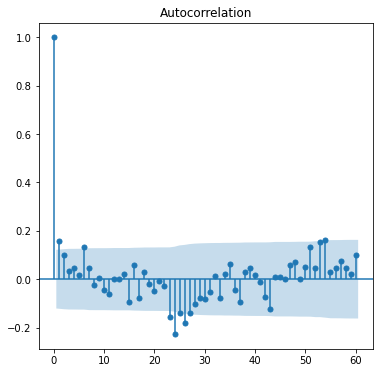

In [ ]:
#TBD

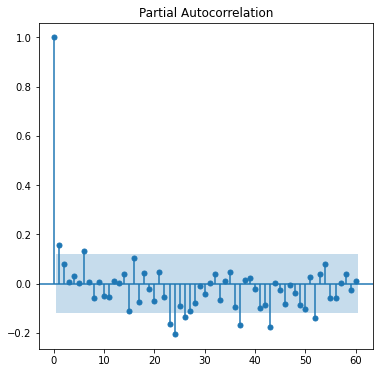

In [ ]:
#TBD

On estime en premier lieu un modèle SARIMA(5,1,1)(2,1,1)26  au vu des autocorrélogrammes empiriques simples et partiels. 


Estimation des paramètres :

p,d,q sont repris du modele ARIMA precedent

- m = 26  : Les observations sont observées par semaines et il y avait présence d'un motif saisonnier dans la décomposition de la série effectuée plus haut.
- P = 1 ou 2 : le 26e et 52e décalages sont significatif dans le tracé PACF.
- D = 1  : Une différenciation saisonnière effectuée.
- Q = 1 : le 26e  décalages est significatifs dans le tracé ACF. Q=1

In [ ]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(polution_ts["pollution"].resample('w').mean().dropna(),
                                order=(5, 1, 1),
                                seasonal_order=(2, 1, 1, 26),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[0])
print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70257D+00    |proj g|=  5.15607D-02


 This problem is unconstrained.



At iterate    5    f=  3.69188D+00    |proj g|=  8.00182D-03

At iterate   10    f=  3.68926D+00    |proj g|=  5.86745D-03

At iterate   15    f=  3.68462D+00    |proj g|=  1.58081D-02

At iterate   20    f=  3.67137D+00    |proj g|=  8.69194D-02

At iterate   25    f=  3.66520D+00    |proj g|=  4.48889D-02

At iterate   30    f=  3.65124D+00    |proj g|=  7.97419D-02

At iterate   35    f=  3.64214D+00    |proj g|=  6.79969D-02

At iterate   40    f=  3.63538D+00    |proj g|=  6.61603D-02

At iterate   45    f=  3.63253D+00    |proj g|=  1.83257D-01

At iterate   50    f=  3.63131D+00    |proj g|=  4.67678D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/david/anaconda3/envs/dev/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                          pollution   No. Observations:                  262
Model:             SARIMAX(5, 1, 1)x(2, 1, 1, 26)   Log Likelihood                -951.403
Date:                            Sat, 30 Apr 2022   AIC                           1922.806
Time:                                    11:15:33   BIC                           1954.623
Sample:                                01-03-2010   HQIC                          1935.709
                                     - 01-04-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6157      0.097    -16.730      0.000      -1.805      -1.426
ar.L2         -1.1678      0.150   

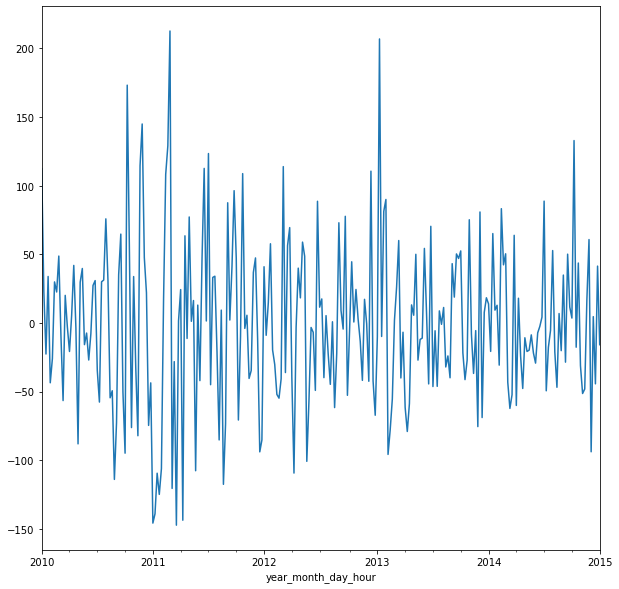

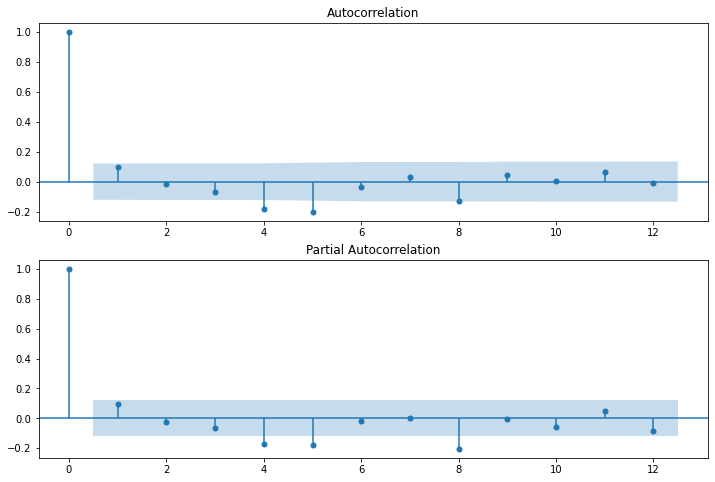

In [ ]:
results.resid.plot()
plt.show()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid, lags=12, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, lags=12, ax=ax2)
plt.show()

Test prediction model

In [ ]:
pred = results.get_prediction(start="2014-01",end="2014-12", dynamic=False)
pred_ci = pred.conf_int()

/home/david/anaconda3/envs/dev/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


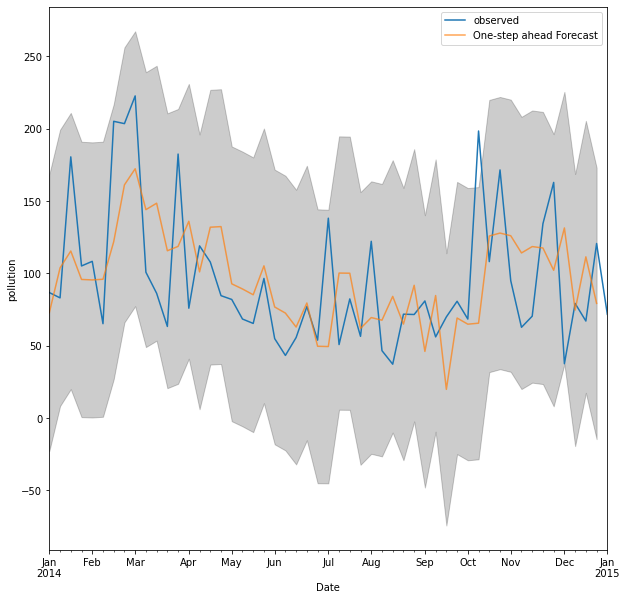

In [ ]:
ax = polution_ts["pollution"].resample('w').mean()['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('pollution')
plt.legend()

plt.show()

In [ ]:

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(polution_ts["pollution"].resample('W').mean()["2014":][:52], pred.predicted_mean, squared=False)
rms

44.42249761481864

#### Reprenez ce dernier essai de SARIMA en prenant cette fois ci un m=52 (comme le nombre de semaine de l'année)

### Refaire cette étude avec un echantillonage mensuel cette fois ci

### Comparer vos resultats avec un modelisation naive

Pour évaluer la qualité de ses prédictions on se souviendra de comparer avec un modèle naïf (ex:on utilise la valeur du dernier point pour prédire le point actuel).